In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

In [3]:
bdTrain = pd.read_csv('train.csv')
bdTest = pd.read_csv('test.csv')

In [4]:
bdTrain.head(2)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  

[2 rows x 81 columns]

In [5]:
bdTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
bdTrain.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [7]:
id = bdTest.Id

In [8]:
bd = pd.concat([bdTrain, bdTest], ignore_index=True)

In [9]:
bdIndex = len(bdTrain)
print(bdIndex)

1460


In [10]:
testeIndex = len(bd) - len(bdTest)
print(testeIndex)

1460


In [11]:
def dadosNulos(base):
    print(f" DADOS NULOS: ")
    print()
    for i in base.columns:
        if  base[i].isnull().sum() == 0:
            continue
        else :
            print(f'{i} = {base[i].isnull().sum()}')

In [12]:
traducao_colunas = {
    "Id": "Id",
    "MSSubClass": "ClasseMS",
    "MSZoning": "ZoneamentoMS",
    "LotFrontage": "FrenteLote",
    "LotArea": "AreaLote",
    "Street": "Rua",
    "Alley": "Beco",
    "LotShape": "FormaLote",
    "LandContour": "ContornoTerreno",
    "Utilities": "Utilidades",
    "LotConfig": "ConfigLote",
    "LandSlope": "InclinaçãoTerreno",
    "Neighborhood": "Bairro",
    "Condition1": "Condição1",
    "Condition2": "Condição2",
    "BldgType": "TipoEdifício",
    "HouseStyle": "EstiloCasa",
    "OverallQual": "QualidadeGeral",
    "OverallCond": "CondiçãoGeral",
    "YearBuilt": "AnoConstrução",
    "YearRemodAdd": "AnoReforma",
    "RoofStyle": "EstiloTelhado",
    "RoofMatl": "MaterialTelhado",
    "Exterior1st": "RevestimentoExterno1",
    "Exterior2nd": "RevestimentoExterno2",
    "MasVnrType": "TipoRevestimentoMaciço",
    "MasVnrArea": "AreaRevestimentoMaciço",
    "ExterQual": "QualidadeExterior",
    "ExterCond": "CondiçãoExterior",
    "Foundation": "Fundação",
    "BsmtQual": "QualidadePorão",
    "BsmtCond": "CondiçãoPorão",
    "BsmtExposure": "ExposiçãoPorão",
    "BsmtFinType1": "TipoAcabamentoPorão1",
    "BsmtFinSF1": "AreaAcabadaPorão1",
    "BsmtFinType2": "TipoAcabamentoPorão2",
    "BsmtFinSF2": "AreaAcabadaPorão2",
    "BsmtUnfSF": "AreaPorãoNaoAcabada",
    "TotalBsmtSF": "AreaTotalPorão",
    "Heating": "Aquecimento",
    "HeatingQC": "QualidadeAquecimento",
    "CentralAir": "ArCondicionadoCentral",
    "Electrical": "InstalaçãoElétrica",
    "1stFlrSF": "Area1Andar",
    "2ndFlrSF": "Area2Andar",
    "LowQualFinSF": "AreaAcabamentoBaixaQualidade",
    "GrLivArea": "AreaVivênciaAcimaSolo",
    "BsmtFullBath": "BanheiroCompletoPorão",
    "BsmtHalfBath": "MeioBanheiroPorão",
    "FullBath": "BanheiroCompleto",
    "HalfBath": "MeioBanheiro",
    "BedroomAbvGr": "QuartosAcimaSolo",
    "KitchenAbvGr": "CozinhasAcimaSolo",
    "KitchenQual": "QualidadeCozinha",
    "TotRmsAbvGrd": "TotalComodosAcimaSolo",
    "Functional": "Funcionalidade",
    "Fireplaces": "Lareiras",
    "FireplaceQu": "QualidadeLareira",
    "GarageType": "TipoGaragem",
    "GarageYrBlt": "AnoConstruçãoGaragem",
    "GarageFinish": "AcabamentoGaragem",
    "GarageCars": "VagasGaragem",
    "GarageArea": "AreaGaragem",
    "GarageQual": "QualidadeGaragem",
    "GarageCond": "CondiçãoGaragem",
    "PavedDrive": "EntradaPavimentada",
    "WoodDeckSF": "AreaDeckMadeira",
    "OpenPorchSF": "AreaVarandaAberta",
    "EnclosedPorch": "AreaVarandaFechada",
    "3SsnPorch": "Varanda3Estações",
    "ScreenPorch": "VarandaTelada",
    "PoolArea": "AreaPiscina",
    "PoolQC": "QualidadePiscina",
    "Fence": "Cerca",
    "MiscFeature": "RecursoDiverso",
    "MiscVal": "ValorDiverso",
    "MoSold": "MesVenda",
    "YrSold": "AnoVenda",
    "SaleType": "TipoVenda",
    "SaleCondition": "CondiçãoVenda",
    "SalePrice": "PreçoVenda"
}

In [13]:
bd.rename(columns=traducao_colunas, inplace=True)


In [14]:
bd

Id  ClasseMS ZoneamentoMS  FrenteLote  AreaLote   Rua Beco FormaLote  \
0        1        60           RL        65.0      8450  Pave  NaN       Reg   
1        2        20           RL        80.0      9600  Pave  NaN       Reg   
2        3        60           RL        68.0     11250  Pave  NaN       IR1   
3        4        70           RL        60.0      9550  Pave  NaN       IR1   
4        5        60           RL        84.0     14260  Pave  NaN       IR1   
...    ...       ...          ...         ...       ...   ...  ...       ...   
2914  2915       160           RM        21.0      1936  Pave  NaN       Reg   
2915  2916       160           RM        21.0      1894  Pave  NaN       Reg   
2916  2917        20           RL       160.0     20000  Pave  NaN       Reg   
2917  2918        85           RL        62.0     10441  Pave  NaN       Reg   
2918  2919        60           RL        74.0      9627  Pave  NaN       Reg   

     ContornoTerreno Utilidades  ... AreaPiscina QualidadePiscina  Cerca  \
0                Lvl     AllPub  ...           0              NaN    NaN   
1                Lvl     AllPub  ...           0              NaN    NaN   
2                Lvl     AllPub  ...           0              NaN    NaN   
3                Lvl     AllPub  ...           0              NaN    NaN   
4                Lvl     AllPub  ...           0              NaN    NaN   
...              ...        ...  ...         ...              ...    ...   
2914             Lvl     AllPub  ...           0              NaN    NaN   
2915             Lvl     AllPub  ...           0              NaN    NaN   
2916             Lvl     AllPub  ...           0              NaN    NaN   
2917             Lvl     AllPub  ...           0              NaN  MnPrv   
2918             Lvl     AllPub  ...           0              NaN    NaN   

     RecursoDiverso ValorDiverso MesVenda AnoVenda  TipoVenda  CondiçãoVenda  \
0               NaN            0        2     2008         WD         Normal   
1               NaN            0        5     2007         WD         Normal   
2               NaN            0        9     2008         WD         Normal   
3               NaN            0        2     2006         WD        Abnorml   
4               NaN            0       12     2008         WD         Normal   
...             ...          ...      ...      ...        ...            ...   
2914            NaN            0        6     2006         WD         Normal   
2915            NaN            0        4     2006         WD        Abnorml   
2916            NaN            0        9     2006         WD        Abnorml   
2917           Shed          700        7     2006         WD         Normal   
2918            NaN            0       11     2006         WD         Normal   

      PreçoVenda  
0       208500.0  
1       181500.0  
2       223500.0  
3       140000.0  
4       250000.0  
...          ...  
2914         NaN  
2915         NaN  
2916         NaN  
2917         NaN  
2918         NaN  

[2919 rows x 81 columns]

In [15]:
dadosNulos(bd)

 DADOS NULOS: 

ZoneamentoMS = 4
FrenteLote = 486
Beco = 2721
Utilidades = 2
RevestimentoExterno1 = 1
RevestimentoExterno2 = 1
TipoRevestimentoMaciço = 1766
AreaRevestimentoMaciço = 23
QualidadePorão = 81
CondiçãoPorão = 82
ExposiçãoPorão = 82
TipoAcabamentoPorão1 = 79
AreaAcabadaPorão1 = 1
TipoAcabamentoPorão2 = 80
AreaAcabadaPorão2 = 1
AreaPorãoNaoAcabada = 1
AreaTotalPorão = 1
InstalaçãoElétrica = 1
BanheiroCompletoPorão = 2
MeioBanheiroPorão = 2
QualidadeCozinha = 1
Funcionalidade = 2
QualidadeLareira = 1420
TipoGaragem = 157
AnoConstruçãoGaragem = 159
AcabamentoGaragem = 159
VagasGaragem = 1
AreaGaragem = 1
QualidadeGaragem = 159
CondiçãoGaragem = 159
QualidadePiscina = 2909
Cerca = 2348
RecursoDiverso = 2814
TipoVenda = 1
PreçoVenda = 1459


In [16]:
df = pd.DataFrame()

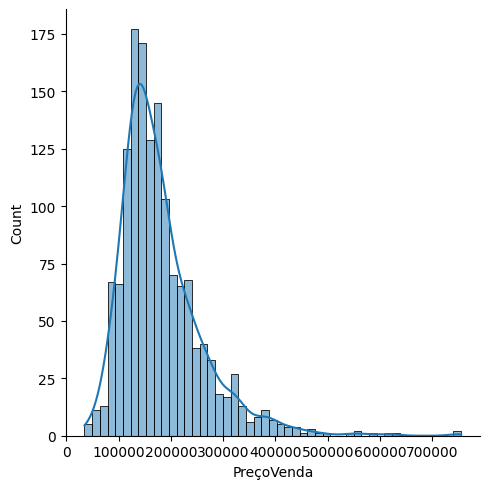

In [17]:
sns.displot(bd['PreçoVenda'], kde = True)

In [18]:
def AnaliseColuna(data, column, count = True):
    print(f'Quantidade de valores únicos: {data[column].nunique()}')
    print(f'\nQuais são os valores únicos: {data[column].unique()}')
    print(f'\nQuantidade de valores nulos: {data[column].isnull().sum()}')
    print (f'\nQuantidade por opção: \n{data[column].value_counts()}')
    plt.figure(figsize=(10, 6))
    if count:  
        sns.countplot(data=data, x=column, hue='PreçoVenda')
    else:  
        sns.displot(data[column], kde=True)
    
    plt.title(f'Análise da coluna: {column}', fontsize=14)  
    plt.xticks(rotation=45)  
    plt.show()

In [19]:
display(bd)

Id  ClasseMS ZoneamentoMS  FrenteLote  AreaLote   Rua Beco FormaLote  \
0        1        60           RL        65.0      8450  Pave  NaN       Reg   
1        2        20           RL        80.0      9600  Pave  NaN       Reg   
2        3        60           RL        68.0     11250  Pave  NaN       IR1   
3        4        70           RL        60.0      9550  Pave  NaN       IR1   
4        5        60           RL        84.0     14260  Pave  NaN       IR1   
...    ...       ...          ...         ...       ...   ...  ...       ...   
2914  2915       160           RM        21.0      1936  Pave  NaN       Reg   
2915  2916       160           RM        21.0      1894  Pave  NaN       Reg   
2916  2917        20           RL       160.0     20000  Pave  NaN       Reg   
2917  2918        85           RL        62.0     10441  Pave  NaN       Reg   
2918  2919        60           RL        74.0      9627  Pave  NaN       Reg   

     ContornoTerreno Utilidades  ... AreaPiscina QualidadePiscina  Cerca  \
0                Lvl     AllPub  ...           0              NaN    NaN   
1                Lvl     AllPub  ...           0              NaN    NaN   
2                Lvl     AllPub  ...           0              NaN    NaN   
3                Lvl     AllPub  ...           0              NaN    NaN   
4                Lvl     AllPub  ...           0              NaN    NaN   
...              ...        ...  ...         ...              ...    ...   
2914             Lvl     AllPub  ...           0              NaN    NaN   
2915             Lvl     AllPub  ...           0              NaN    NaN   
2916             Lvl     AllPub  ...           0              NaN    NaN   
2917             Lvl     AllPub  ...           0              NaN  MnPrv   
2918             Lvl     AllPub  ...           0              NaN    NaN   

     RecursoDiverso ValorDiverso MesVenda AnoVenda  TipoVenda  CondiçãoVenda  \
0               NaN            0        2     2008         WD         Normal   
1               NaN            0        5     2007         WD         Normal   
2               NaN            0        9     2008         WD         Normal   
3               NaN            0        2     2006         WD        Abnorml   
4               NaN            0       12     2008         WD         Normal   
...             ...          ...      ...      ...        ...            ...   
2914            NaN            0        6     2006         WD         Normal   
2915            NaN            0        4     2006         WD        Abnorml   
2916            NaN            0        9     2006         WD        Abnorml   
2917           Shed          700        7     2006         WD         Normal   
2918            NaN            0       11     2006         WD         Normal   

      PreçoVenda  
0       208500.0  
1       181500.0  
2       223500.0  
3       140000.0  
4       250000.0  
...          ...  
2914         NaN  
2915         NaN  
2916         NaN  
2917         NaN  
2918         NaN  

[2919 rows x 81 columns]

In [20]:
def CasaTipo(codigo):
    MSSubClass_descriptions = {
        20: "Casas térreas (1 andar) construídas a partir de 1946, de qualquer estilo.",
        30: "Casas térreas (1 andar) construídas até 1945 ou antes.",
        40: "Casas térreas (1 andar) com sótão acabado, independente da idade da casa.",
        45: "Casas de 1 andar e meio, com o andar superior inacabado, de qualquer idade.",
        50: "Casas de 1 andar e meio, com o andar superior acabado, de qualquer idade.",
        60: "Casas de 2 andares construídas a partir de 1946.",
        70: "Casas de 2 andares construídas até 1945 ou antes.",
        75: "Casas de 2 andares e meio, de qualquer idade.",
        80: "Casas com níveis divididos (split-level) ou com múltiplos níveis.",
        85: "Casas com entrada dividida (split foyer), onde a entrada principal está entre os dois níveis principais da casa.",
        90: "Duplices (casas com duas unidades residenciais), de qualquer estilo ou idade.",
        120: "Casas térreas (1 andar) dentro de um PUD (Desenvolvimento de Unidade Planejada), construídas a partir de 1946.",
        150: "Casas de 1 andar e meio dentro de um PUD, de qualquer idade.",
        160: "Casas de 2 andares dentro de um PUD, construídas a partir de 1946.",
        180: "Casas dentro de um PUD com múltiplos níveis, incluindo casas do tipo split-level ou split foyer.",
        190: "Conversão de uma casa unifamiliar em uma casa bifamiliar, de qualquer estilo ou idade."
    }

    descricao = MSSubClass_descriptions.get(codigo, "Descrição não disponível")
    print(descricao)

Quantidade de valores únicos: 16

Quais são os valores únicos: [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40 150]

Quantidade de valores nulos: 0

Quantidade por opção: 
ClasseMS
20     1079
60      575
50      287
120     182
30      139
70      128
160     128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

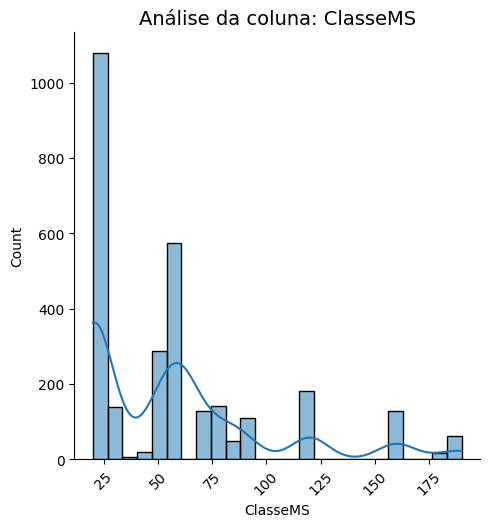

In [21]:
AnaliseColuna(bd , 'ClasseMS' , False)

In [22]:
CasaTipo(20)

Casas térreas (1 andar) construídas a partir de 1946, de qualquer estilo.


In [23]:
CasaTipo(60)

Casas de 2 andares construídas a partir de 1946.


In [24]:
CasaTipo(50)

Casas de 1 andar e meio, com o andar superior acabado, de qualquer idade.


In [25]:
df['ClasseMS'] = bd['ClasseMS']

In [26]:
bd

Id  ClasseMS ZoneamentoMS  FrenteLote  AreaLote   Rua Beco FormaLote  \
0        1        60           RL        65.0      8450  Pave  NaN       Reg   
1        2        20           RL        80.0      9600  Pave  NaN       Reg   
2        3        60           RL        68.0     11250  Pave  NaN       IR1   
3        4        70           RL        60.0      9550  Pave  NaN       IR1   
4        5        60           RL        84.0     14260  Pave  NaN       IR1   
...    ...       ...          ...         ...       ...   ...  ...       ...   
2914  2915       160           RM        21.0      1936  Pave  NaN       Reg   
2915  2916       160           RM        21.0      1894  Pave  NaN       Reg   
2916  2917        20           RL       160.0     20000  Pave  NaN       Reg   
2917  2918        85           RL        62.0     10441  Pave  NaN       Reg   
2918  2919        60           RL        74.0      9627  Pave  NaN       Reg   

     ContornoTerreno Utilidades  ... AreaPiscina QualidadePiscina  Cerca  \
0                Lvl     AllPub  ...           0              NaN    NaN   
1                Lvl     AllPub  ...           0              NaN    NaN   
2                Lvl     AllPub  ...           0              NaN    NaN   
3                Lvl     AllPub  ...           0              NaN    NaN   
4                Lvl     AllPub  ...           0              NaN    NaN   
...              ...        ...  ...         ...              ...    ...   
2914             Lvl     AllPub  ...           0              NaN    NaN   
2915             Lvl     AllPub  ...           0              NaN    NaN   
2916             Lvl     AllPub  ...           0              NaN    NaN   
2917             Lvl     AllPub  ...           0              NaN  MnPrv   
2918             Lvl     AllPub  ...           0              NaN    NaN   

     RecursoDiverso ValorDiverso MesVenda AnoVenda  TipoVenda  CondiçãoVenda  \
0               NaN            0        2     2008         WD         Normal   
1               NaN            0        5     2007         WD         Normal   
2               NaN            0        9     2008         WD         Normal   
3               NaN            0        2     2006         WD        Abnorml   
4               NaN            0       12     2008         WD         Normal   
...             ...          ...      ...      ...        ...            ...   
2914            NaN            0        6     2006         WD         Normal   
2915            NaN            0        4     2006         WD        Abnorml   
2916            NaN            0        9     2006         WD        Abnorml   
2917           Shed          700        7     2006         WD         Normal   
2918            NaN            0       11     2006         WD         Normal   

      PreçoVenda  
0       208500.0  
1       181500.0  
2       223500.0  
3       140000.0  
4       250000.0  
...          ...  
2914         NaN  
2915         NaN  
2916         NaN  
2917         NaN  
2918         NaN  

[2919 rows x 81 columns]

        A	Agricultura
        C	Comercial
        FV	Residencial Vila Flutuante
        I	Industrial
        RH	Residencial Alta Densidade
        RL	Residencial Baixa Densidade
        RP	Residencial Baixa Densidade Parque
        RM	Residencial Média Densidade

Quantidade de valores únicos: 5

Quais são os valores únicos: ['RL' 'RM' 'C (all)' 'FV' 'RH' nan]

Quantidade de valores nulos: 4

Quantidade por opção: 
ZoneamentoMS
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64


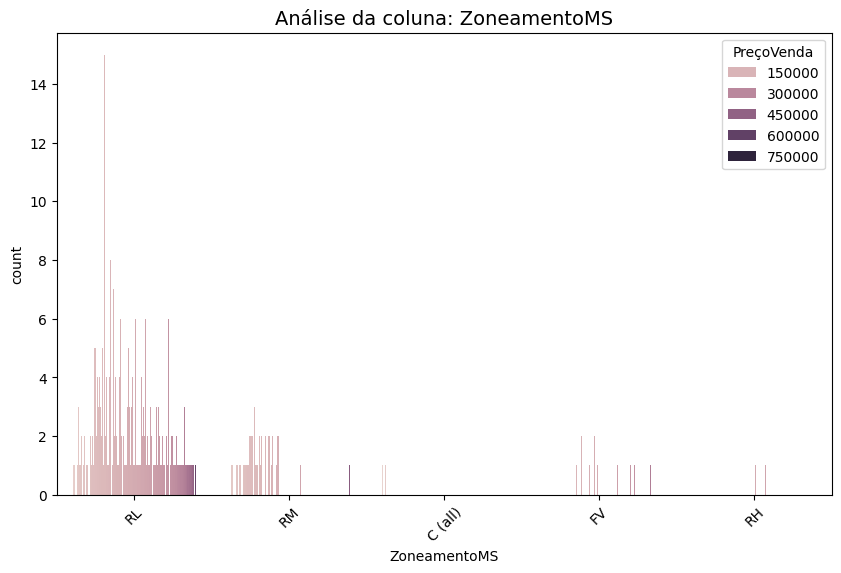

In [27]:
AnaliseColuna(bd, 'ZoneamentoMS' )

In [28]:
display(bd[bd.ZoneamentoMS.isnull()])

Id  ClasseMS ZoneamentoMS  FrenteLote  AreaLote   Rua Beco FormaLote  \
1915  1916        30          NaN       109.0     21780  Grvl  NaN       Reg   
2216  2217        20          NaN        80.0     14584  Pave  NaN       Reg   
2250  2251        70          NaN         NaN     56600  Pave  NaN       IR1   
2904  2905        20          NaN       125.0     31250  Pave  NaN       Reg   

     ContornoTerreno Utilidades  ... AreaPiscina QualidadePiscina Cerca  \
1915             Lvl        NaN  ...           0              NaN   NaN   
2216             Low     AllPub  ...           0              NaN   NaN   
2250             Low     AllPub  ...           0              NaN   NaN   
2904             Lvl     AllPub  ...           0              NaN   NaN   

     RecursoDiverso ValorDiverso MesVenda AnoVenda  TipoVenda  CondiçãoVenda  \
1915            NaN            0        3     2009      ConLD         Normal   
2216            NaN            0        2     2008         WD        Abnorml   
2250            NaN            0        1     2008         WD         Normal   
2904            NaN            0        5     2006         WD         Normal   

      PreçoVenda  
1915         NaN  
2216         NaN  
2250         NaN  
2904         NaN  

[4 rows x 81 columns]

In [29]:
coef = pd.DataFrame

In [30]:
coef = bd.drop(['Id' , 'FrenteLote' , 'Rua' , 
                'Beco' , 'FormaLote' , 'ContornoTerreno' , 'Utilidades' ,
                  'AreaPiscina' , 'QualidadePiscina' , 'Cerca' , 'RecursoDiverso' , 
                  'ValorDiverso' , 'TipoVenda' , 'CondiçãoVenda' , 'PreçoVenda' , 'ConfigLote' , 
                  'InclinaçãoTerreno' , 'Condição1' , 'Condição2' , 'QualidadeGaragem' , 
                  'CondiçãoGaragem' , 'EntradaPavimentada' , 'AreaDeckMadeira' ,
                  'AreaVarandaAberta' , 'AreaVarandaFechada' , 'Varanda3Estações'
                  , 'Lareiras' , 'QualidadeLareira' ,'TipoGaragem' ,'AnoConstruçãoGaragem'
                  ,'AcabamentoGaragem' , 'VarandaTelada' , 'MeioBanheiro' ,'QuartosAcimaSolo'
                  ,'CozinhasAcimaSolo','QualidadeCozinha','TotalComodosAcimaSolo','Funcionalidade',
                  'VagasGaragem','Area1Andar','Area2Andar','AreaAcabamentoBaixaQualidade',
                  'AreaVivênciaAcimaSolo','BanheiroCompletoPorão','MeioBanheiroPorão','BanheiroCompleto'
                  ,'AreaAcabadaPorão2','AreaPorãoNaoAcabada','AreaTotalPorão','QualidadeAquecimento',
                  'ArCondicionadoCentral','InstalaçãoElétrica','QualidadePorão','CondiçãoPorão',
                  'ExposiçãoPorão','TipoAcabamentoPorão1','AreaAcabadaPorão1','TipoAcabamentoPorão2',
                  'RevestimentoExterno2','TipoRevestimentoMaciço','AreaRevestimentoMaciço',
                  'QualidadeExterior','CondiçãoExterior','Fundação','EstiloTelhado','MaterialTelhado',
                  'RevestimentoExterno1'], axis=1)

In [31]:
display(coef[coef.ZoneamentoMS.isnull()])

ClasseMS ZoneamentoMS  AreaLote   Bairro TipoEdifício EstiloCasa  \
1915        30          NaN     21780   IDOTRR         1Fam     1Story   
2216        20          NaN     14584   IDOTRR         1Fam     1Story   
2250        70          NaN     56600   IDOTRR         1Fam     2.5Unf   
2904        20          NaN     31250  Mitchel         1Fam     1Story   

      QualidadeGeral  CondiçãoGeral  AnoConstrução  AnoReforma Aquecimento  \
1915               2              4           1910        1950        GasA   
2216               1              5           1952        1952        Wall   
2250               5              1           1900        1950        GasA   
2904               1              3           1951        1951        GasA   

      AreaGaragem  MesVenda  AnoVenda  
1915        280.0         3      2009  
2216        487.0         2      2008  
2250        288.0         1      2008  
2904        270.0         5      2006

In [32]:
coef.TipoEdifício.unique()

array(['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], dtype=object)

In [33]:
mapeamento = {
    '1Fam': 1,
    '2fmCon': 2,
    'Duplex': 3,
    'TwnhsE': 4,
    'Twnhs': 5
}
coef['TipoEdifício'] = coef['TipoEdifício'].map(mapeamento).fillna(0)

coef['TipoEdifício'] = coef['TipoEdifício'].astype(int)

In [34]:
mapeamento = {
    'RL': 1,
    'RM': 2,
    'C (all)': 3,
    'FV': 4,
    'RH': 5
}
coef['ZoneamentoMS'] = coef['ZoneamentoMS'].map(mapeamento).fillna(0)

coef['ZoneamentoMS'] = coef['ZoneamentoMS'].astype(int)


In [35]:
def media(banco , coluna , valorMedia):
    for i in sorted(banco[coluna].unique()):
        media = banco[banco[coluna] == i][valorMedia].mean()
        print(f" o nome {i} têm a média de valor de: {media:.2f}")

In [36]:
media(coef , 'ClasseMS' , 'ZoneamentoMS')

#

 o nome 20 têm a média de valor de: 1.13
 o nome 30 têm a média de valor de: 1.65
 o nome 40 têm a média de valor de: 1.33
 o nome 45 têm a média de valor de: 1.83
 o nome 50 têm a média de valor de: 1.49
 o nome 60 têm a média de valor de: 1.23
 o nome 70 têm a média de valor de: 1.64
 o nome 75 têm a média de valor de: 1.61
 o nome 80 têm a média de valor de: 1.03
 o nome 85 têm a média de valor de: 1.02
 o nome 90 têm a média de valor de: 1.27
 o nome 120 têm a média de valor de: 1.66
 o nome 150 têm a média de valor de: 1.00
 o nome 160 têm a média de valor de: 2.51
 o nome 180 têm a média de valor de: 2.00
 o nome 190 têm a média de valor de: 1.74


        o nome 20 têm a média de valor de: RL
        o nome 30 têm a média de valor de: RM
        o nome 70 têm a média de valor de: RM

In [37]:

mapeamento = {
    'CollgCr': 1,
    'Veenker': 2,
    'Crawfor': 3,
    'NoRidge': 4,
    'Mitchel': 5,
    'Somerst': 6,
    'NWAmes': 7,
    'OldTown': 8,
    'BrkSide': 9,
    'Sawyer': 10,
    'NridgHt': 11,
    'NAmes': 12,
    'SawyerW': 13,
    'IDOTRR': 14,
    'MeadowV': 15,
    'Edwards': 16,
    'Timber': 17,
    'Gilbert': 18,
    'StoneBr': 19,
    'ClearCr': 20,
    'NPkVill': 21,
    'Blmngtn': 22,
    'BrDale': 23,
    'SWISU': 24,
    'Blueste': 25
}


coef['Bairro'] = coef['Bairro'].map(mapeamento).fillna(0)

coef['Bairro'] = coef['Bairro'].astype(int)

In [38]:
media(coef , 'Bairro' , 'ZoneamentoMS')

 o nome 1 têm a média de valor de: 1.05
 o nome 2 têm a média de valor de: 1.00
 o nome 3 têm a média de valor de: 1.17
 o nome 4 têm a média de valor de: 1.00
 o nome 5 têm a média de valor de: 1.07
 o nome 6 têm a média de valor de: 3.29
 o nome 7 têm a média de valor de: 1.00
 o nome 8 têm a média de valor de: 1.85
 o nome 9 têm a média de valor de: 1.60
 o nome 10 têm a média de valor de: 1.02
 o nome 11 têm a média de valor de: 1.01
 o nome 12 têm a média de valor de: 1.06
 o nome 13 têm a média de valor de: 1.19
 o nome 14 têm a média de valor de: 2.17
 o nome 15 têm a média de valor de: 2.00
 o nome 16 têm a média de valor de: 1.10
 o nome 17 têm a média de valor de: 1.00
 o nome 18 têm a média de valor de: 1.00
 o nome 19 têm a média de valor de: 1.00
 o nome 20 têm a média de valor de: 1.00
 o nome 21 têm a média de valor de: 1.00
 o nome 22 têm a média de valor de: 1.11
 o nome 23 têm a média de valor de: 2.00
 o nome 24 têm a média de valor de: 1.79
 o nome 25 têm a média de

        IDOTRR = RM
        Mitchel = RL

In [39]:
media(coef , 'TipoEdifício' , 'ZoneamentoMS')

 o nome 1 têm a média de valor de: 1.26
 o nome 2 têm a média de valor de: 1.76
 o nome 3 têm a média de valor de: 1.27
 o nome 4 têm a média de valor de: 1.97
 o nome 5 têm a média de valor de: 2.15


        1Fam = RL

In [40]:
media(coef , 'CondiçãoGeral' , 'ZoneamentoMS')

 o nome 1 têm a média de valor de: 1.71
 o nome 2 têm a média de valor de: 1.50
 o nome 3 têm a média de valor de: 1.36
 o nome 4 têm a média de valor de: 1.45
 o nome 5 têm a média de valor de: 1.36
 o nome 6 têm a média de valor de: 1.31
 o nome 7 têm a média de valor de: 1.30
 o nome 8 têm a média de valor de: 1.38
 o nome 9 têm a média de valor de: 1.46


        4 = RL
        5 = RL
        1 = RM
        5 = RL

In [41]:
media(coef , 'QualidadeGeral' , 'ZoneamentoMS')

 o nome 1 têm a média de valor de: 0.50
 o nome 2 têm a média de valor de: 1.62
 o nome 3 têm a média de valor de: 1.68
 o nome 4 têm a média de valor de: 1.50
 o nome 5 têm a média de valor de: 1.25
 o nome 6 têm a média de valor de: 1.36
 o nome 7 têm a média de valor de: 1.41
 o nome 8 têm a média de valor de: 1.40
 o nome 9 têm a média de valor de: 1.22
 o nome 10 têm a média de valor de: 1.26


        2 = RM
        1 = RL
        5 = RL
        1 = RL

        1915 RM RM RL RL RM
        2216 RL RM RL RL RL
        2250 RM RM RL RM RL
        2904 RL RL RL RL Rl

In [42]:
bd.loc[1915, 'ZoneamentoMS'] = bd.loc[1915, 'ZoneamentoMS'] if pd.notna(bd.loc[1915, 'ZoneamentoMS']) else "RM"
bd.loc[2216, 'ZoneamentoMS'] = bd.loc[1915, 'ZoneamentoMS'] if pd.notna(bd.loc[1915, 'ZoneamentoMS']) else "RL"
bd.loc[2250, 'ZoneamentoMS'] = bd.loc[1915, 'ZoneamentoMS'] if pd.notna(bd.loc[1915, 'ZoneamentoMS']) else "RM"
bd.loc[2904, 'ZoneamentoMS'] = bd.loc[1915, 'ZoneamentoMS'] if pd.notna(bd.loc[1915, 'ZoneamentoMS']) else "RL"

Quantidade de valores únicos: 5

Quais são os valores únicos: ['RL' 'RM' 'C (all)' 'FV' 'RH']

Quantidade de valores nulos: 0

Quantidade por opção: 
ZoneamentoMS
RL         2265
RM          464
FV          139
RH           26
C (all)      25
Name: count, dtype: int64


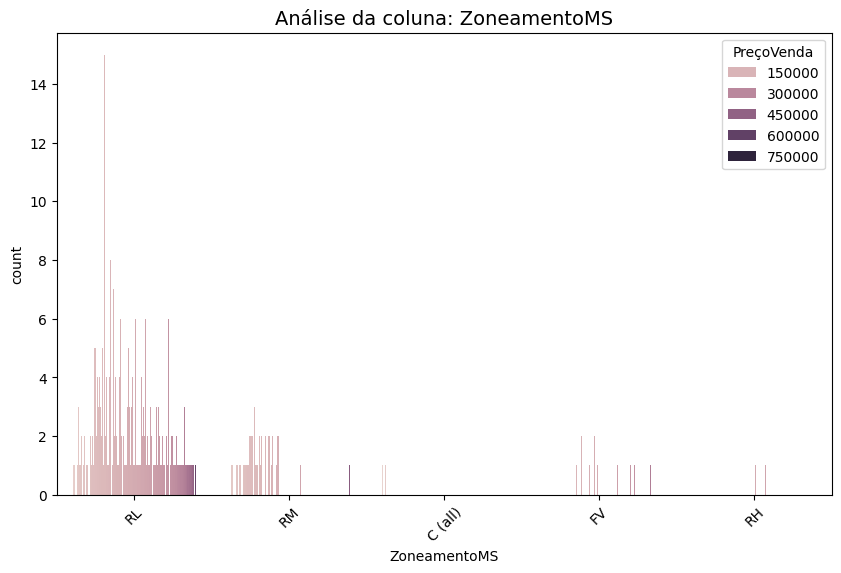

In [43]:
AnaliseColuna(bd , 'ZoneamentoMS')

In [44]:
df['ZoneamentoMS'] = bd['ZoneamentoMS']

Quantidade de valores únicos: 128

Quais são os valores únicos: [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.  26.
  25. 119.  31.  28. 117. 113. 125. 135. 136.  22. 123. 195. 155. 126.
 200. 131. 133.]

Quantidade de valores nulos: 486

Quantidade por opção: 
FrenteLote
60.0     276
80.0     137
70.0     133
50.0     117
75.0     105
        ... 
152.0      1
138.0      1
182.0      1
168.0      1
133.0      1
Name: count, Length: 128, dtype: int64


<Figure size 1000x600 with 0 Axes>

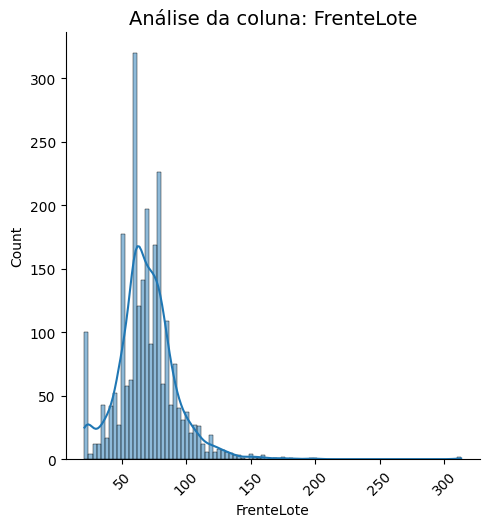

In [45]:
AnaliseColuna(bd ,'FrenteLote' , False)

In [46]:
coef.drop(['EstiloCasa' , 'Aquecimento'] , axis=1 , inplace= True)

In [47]:
coef['FrenteLote'] = bd['FrenteLote']

In [48]:
coef.corr()

ClasseMS  ZoneamentoMS  AreaLote    Bairro  TipoEdifício  \
ClasseMS        1.000000      0.295232 -0.201730  0.187894      0.766781   
ZoneamentoMS    0.295232      1.000000 -0.200574 -0.076891      0.289009   
AreaLote       -0.201730     -0.200574  1.000000 -0.005791     -0.267099   
Bairro          0.187894     -0.076891 -0.005791  1.000000      0.202194   
TipoEdifício    0.766781      0.289009 -0.267099  0.202194      1.000000   
QualidadeGeral  0.033638      0.001070  0.100541 -0.126371      0.046937   
CondiçãoGeral  -0.065625     -0.021854 -0.035617 -0.053401     -0.135582   
AnoConstrução   0.034409     -0.055817  0.024128 -0.093226      0.195146   
AnoReforma      0.043315      0.040845  0.021612 -0.149059      0.082397   
AreaGaragem    -0.103394     -0.065321  0.213251 -0.210494     -0.081313   
MesVenda       -0.001231      0.017688  0.004156 -0.004770      0.005265   
AnoVenda       -0.015028      0.026977 -0.024234  0.020380      0.009043   
FrenteLote     -0.417359     -0.266178  0.489896 -0.157985     -0.501906   

                QualidadeGeral  CondiçãoGeral  AnoConstrução  AnoReforma  \
ClasseMS              0.033638      -0.065625       0.034409    0.043315   
ZoneamentoMS          0.001070      -0.021854      -0.055817    0.040845   
AreaLote              0.100541      -0.035617       0.024128    0.021612   
Bairro               -0.126371      -0.053401      -0.093226   -0.149059   
TipoEdifício          0.046937      -0.135582       0.195146    0.082397   
QualidadeGeral        1.000000      -0.093847       0.597554    0.571532   
CondiçãoGeral        -0.093847       1.000000      -0.368477    0.047654   
AnoConstrução         0.597554      -0.368477       1.000000    0.612235   
AnoReforma            0.571532       0.047654       0.612235    1.000000   
AreaGaragem           0.565122      -0.154149       0.480735    0.376765   
MesVenda              0.030405      -0.006256       0.013938    0.017693   
AnoVenda             -0.019614       0.030102      -0.012344    0.033203   
FrenteLote            0.217645      -0.075508       0.122811    0.091557   

                AreaGaragem  MesVenda  AnoVenda  FrenteLote  
ClasseMS          -0.103394 -0.001231 -0.015028   -0.417359  
ZoneamentoMS      -0.065321  0.017688  0.026977   -0.266178  
AreaLote           0.213251  0.004156 -0.024234    0.489896  
Bairro            -0.210494 -0.004770  0.020380   -0.157985  
TipoEdifício      -0.081313  0.005265  0.009043   -0.501906  
QualidadeGeral     0.565122  0.030405 -0.019614    0.217645  
CondiçãoGeral     -0.154149 -0.006256  0.030102   -0.075508  
AnoConstrução      0.480735  0.013938 -0.012344    0.122811  
AnoReforma         0.376765  0.017693  0.033203    0.091557  
AreaGaragem        1.000000  0.040335 -0.013451    0.359786  
MesVenda           0.040335  1.000000 -0.153895    0.011254  
AnoVenda          -0.013451 -0.153895  1.000000   -0.007917  
FrenteLote         0.359786  0.011254 -0.007917    1.000000

In [49]:
coef.describe()

ClasseMS  ZoneamentoMS       AreaLote      Bairro  TipoEdifício  \
count  2919.000000   2919.000000    2919.000000  2919.00000   2919.000000   
mean     57.137718      1.351833   10168.114080    10.56629      1.460774   
std      42.517628      0.800460    7886.996359     5.74942      1.088487   
min      20.000000      0.000000    1300.000000     1.00000      1.000000   
25%      20.000000      1.000000    7478.000000     6.00000      1.000000   
50%      50.000000      1.000000    9453.000000    11.00000      1.000000   
75%      70.000000      1.000000   11570.000000    14.00000      1.000000   
max     190.000000      5.000000  215245.000000    25.00000      5.000000   

       QualidadeGeral  CondiçãoGeral  AnoConstrução   AnoReforma  AreaGaragem  \
count     2919.000000    2919.000000    2919.000000  2919.000000  2918.000000   
mean         6.089072       5.564577    1971.312778  1984.264474   472.874572   
std          1.409947       1.113131      30.291442    20.894344   215.394815   
min          1.000000       1.000000    1872.000000  1950.000000     0.000000   
25%          5.000000       5.000000    1953.500000  1965.000000   320.000000   
50%          6.000000       5.000000    1973.000000  1993.000000   480.000000   
75%          7.000000       6.000000    2001.000000  2004.000000   576.000000   
max         10.000000       9.000000    2010.000000  2010.000000  1488.000000   

          MesVenda     AnoVenda   FrenteLote  
count  2919.000000  2919.000000  2433.000000  
mean      6.213087  2007.792737    69.305795  
std       2.714762     1.314964    23.344905  
min       1.000000  2006.000000    21.000000  
25%       4.000000  2007.000000    59.000000  
50%       6.000000  2008.000000    68.000000  
75%       8.000000  2009.000000    80.000000  
max      12.000000  2010.000000   313.000000

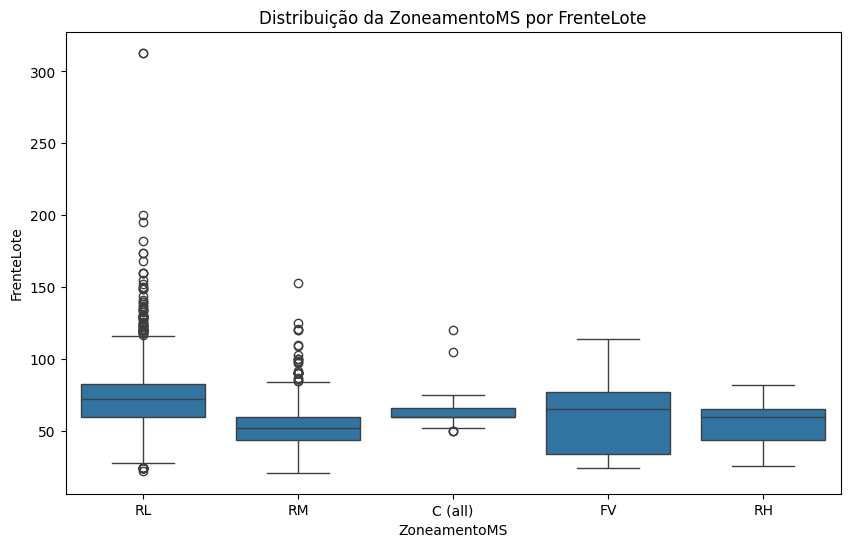

In [50]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='ZoneamentoMS', y='FrenteLote', data=bd)
plt.title('Distribuição da ZoneamentoMS por FrenteLote')
plt.xlabel('ZoneamentoMS')
plt.ylabel('FrenteLote')
plt.show()


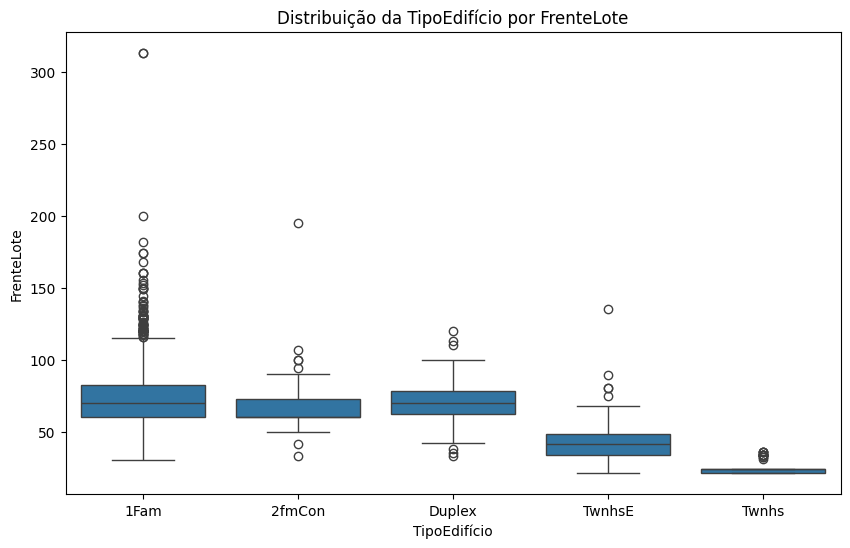

In [51]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='TipoEdifício', y='FrenteLote', data=bd)
plt.title('Distribuição da TipoEdifício por FrenteLote')
plt.xlabel('TipoEdifício')
plt.ylabel('FrenteLote')
plt.show()

In [52]:
bd['FrenteLote'].isnull().sum()

486

In [53]:
medianaTwnhs = bd[bd['TipoEdifício'] == 'Twnhs']['FrenteLote'].median()

bd.loc[(bd['FrenteLote'].isnull()) & (bd['TipoEdifício'] == 'Twnhs'), 'FrenteLote'] = medianaTwnhs

In [54]:
bd['FrenteLote'].isnull().sum()

481

In [55]:
for i in sorted(bd['ZoneamentoMS'].unique()):
    mediana = bd[bd['ZoneamentoMS'] == i]['FrenteLote'].median()
    print(f" o nome {i} têm a média de valor de: {mediana:.2f}")

 o nome C (all) têm a média de valor de: 60.00
 o nome FV têm a média de valor de: 65.00
 o nome RH têm a média de valor de: 60.00
 o nome RL têm a média de valor de: 72.00
 o nome RM têm a média de valor de: 52.00


In [56]:
mediana = bd[bd['ZoneamentoMS'] == 'C (all)']['FrenteLote'].median()

bd.loc[(bd['FrenteLote'].isnull()) & (bd['ZoneamentoMS'] == 'C (all)'), 'FrenteLote'] = mediana

In [57]:
mediana = bd[bd['ZoneamentoMS'] == 'FV']['FrenteLote'].median()

bd.loc[(bd['FrenteLote'].isnull()) & (bd['ZoneamentoMS'] == 'FV'), 'FrenteLote'] = mediana

In [58]:
mediana = bd[bd['ZoneamentoMS'] == 'RH']['FrenteLote'].median()

bd.loc[(bd['FrenteLote'].isnull()) & (bd['ZoneamentoMS'] == 'RH'), 'FrenteLote'] = mediana

In [59]:
mediana = bd[bd['ZoneamentoMS'] == 'RM']['FrenteLote'].median()

bd.loc[(bd['FrenteLote'].isnull()) & (bd['ZoneamentoMS'] == 'RM'), 'FrenteLote'] = mediana

In [60]:
bd['FrenteLote'].isnull().sum()

425

In [61]:
for i in sorted(bd['ClasseMS'].unique()):
    mediana = bd[bd['ClasseMS'] == i]['FrenteLote'].mean()
    print(f" o nome {i} têm a média de valor de: {mediana:.2f}")

 o nome 20 têm a média de valor de: 77.63
 o nome 30 têm a média de valor de: 60.74
 o nome 40 têm a média de valor de: 53.40
 o nome 45 têm a média de valor de: 55.56
 o nome 50 têm a média de valor de: 62.75
 o nome 60 têm a média de valor de: 78.85
 o nome 70 têm a média de valor de: 63.65
 o nome 75 têm a média de valor de: 74.52
 o nome 80 têm a média de valor de: 78.64
 o nome 85 têm a média de valor de: 73.44
 o nome 90 têm a média de valor de: 70.84
 o nome 120 têm a média de valor de: 45.75
 o nome 150 têm a média de valor de: 24.00
 o nome 160 têm a média de valor de: 29.02
 o nome 180 têm a média de valor de: 26.12
 o nome 190 têm a média de valor de: 68.09


In [62]:
mediana = round(bd[bd['ClasseMS'] == 20]['FrenteLote'].mean())
print(mediana)

bd.loc[(bd['FrenteLote'].isnull()) & (bd['ClasseMS'] == 20), 'FrenteLote'] = mediana

78


In [63]:
mediana = round(bd[bd['ClasseMS'] == 60]['FrenteLote'].mean())
print(mediana)

bd.loc[(bd['FrenteLote'].isnull()) & (bd['ClasseMS'] == 60), 'FrenteLote'] = mediana

79


In [64]:
mediana = round(bd[bd['ClasseMS'] == 80]['FrenteLote'].mean())
print(mediana)

bd.loc[(bd['FrenteLote'].isnull()) & (bd['ClasseMS'] == 80), 'FrenteLote'] = mediana

79


In [65]:
mediana = round(bd[bd['ClasseMS'] == 85]['FrenteLote'].mean())
print(mediana)

bd.loc[(bd['FrenteLote'].isnull()) & (bd['ClasseMS'] == 85), 'FrenteLote'] = mediana

73


In [66]:
mediana = round(bd[bd['ClasseMS'] == 120]['FrenteLote'].mean())
print(mediana)

bd.loc[(bd['FrenteLote'].isnull()) & (bd['ClasseMS'] == 120), 'FrenteLote'] = mediana

46


In [67]:
mediana = round(bd[bd['ClasseMS'] == 50]['FrenteLote'].mean())
print(mediana)

bd.loc[(bd['FrenteLote'].isnull()) & (bd['ClasseMS'] == 50), 'FrenteLote'] = mediana

63


In [68]:
mediana = round(bd[bd['ClasseMS'] == 90]['FrenteLote'].mean())
print(mediana)

bd.loc[(bd['FrenteLote'].isnull()) & (bd['ClasseMS'] == 90), 'FrenteLote'] = mediana

71


In [69]:
mediana = round(bd[bd['ClasseMS'] == 30]['FrenteLote'].mean())
print(mediana)

bd.loc[(bd['FrenteLote'].isnull()) & (bd['ClasseMS'] == 30), 'FrenteLote'] = mediana

61


In [70]:
mediana = round(bd[bd['ClasseMS'] == 75]['FrenteLote'].mean())
print(mediana)

bd.loc[(bd['FrenteLote'].isnull()) & (bd['ClasseMS'] == 75), 'FrenteLote'] = mediana

75


In [71]:
mediana = round(bd[bd['ClasseMS'] == 190]['FrenteLote'].mean())
print(mediana)

bd.loc[(bd['FrenteLote'].isnull()) & (bd['ClasseMS'] == 190), 'FrenteLote'] = mediana

68


In [72]:
mediana = round(bd[bd['ClasseMS'] == 160]['FrenteLote'].mean())
print(mediana)

bd.loc[(bd['FrenteLote'].isnull()) & (bd['ClasseMS'] == 160), 'FrenteLote'] = mediana

29


In [73]:
mediana = round(bd[bd['ClasseMS'] == 70]['FrenteLote'].mean())
print(mediana)

bd.loc[(bd['FrenteLote'].isnull()) & (bd['ClasseMS'] == 70), 'FrenteLote'] = mediana

64


In [74]:
mediana = round(bd[bd['ClasseMS'] == 40]['FrenteLote'].mean())
print(mediana)

bd.loc[(bd['FrenteLote'].isnull()) & (bd['ClasseMS'] == 40), 'FrenteLote'] = mediana

53


In [75]:
bd['FrenteLote'].isnull().sum()

0

Quantidade de valores únicos: 129

Quais são os valores únicos: [ 65.  80.  68.  60.  84.  85.  75.  79.  51.  50.  70.  78.  91.  72.
  66. 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  73.  61.  48.
  33.  52. 100.  24.  89.  63.  76.  81.  95.  69.  21.  32. 121. 122.
  40. 105.  77.  64.  94.  34.  90.  55.  46.  88.  82.  71. 120. 107.
  92. 134.  62.  86. 141.  97.  54.  41. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106.  29. 104.  42.
  39. 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  26.
  25. 119.  31.  28. 117. 113. 125. 135. 136.  22. 123. 195. 155. 126.
 200. 131. 133.]

Quantidade de valores nulos: 0

Quantidade por opção: 
FrenteLote
60.0     281
78.0     229
79.0     188
80.0     137
70.0     133
        ... 
182.0      1
168.0      1
111.0      1
137.0      1
133.0      1
Name: count, Length: 129, dtype: int64


<Figure size 1000x600 with 0 Axes>

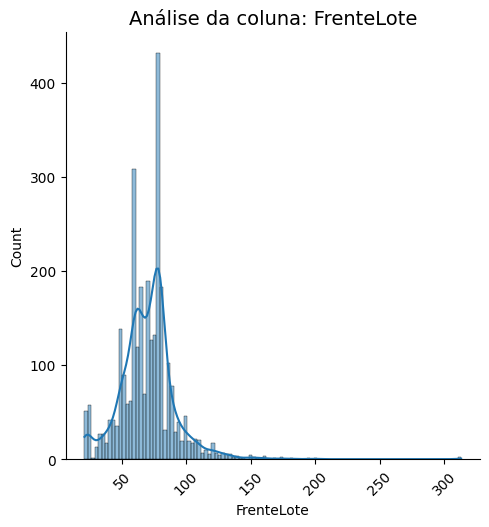

In [76]:
AnaliseColuna(bd ,'FrenteLote' , False)

In [77]:
df['FrenteLote'] = bd['FrenteLote']

Quantidade de valores únicos: 1951

Quais são os valores únicos: [ 8450  9600 11250 ...  1894 20000 10441]

Quantidade de valores nulos: 0

Quantidade por opção: 
AreaLote
9600     44
7200     43
6000     34
9000     29
10800    25
         ..
15498     1
9439      1
7406      1
3013      1
10441     1
Name: count, Length: 1951, dtype: int64


<Figure size 1000x600 with 0 Axes>

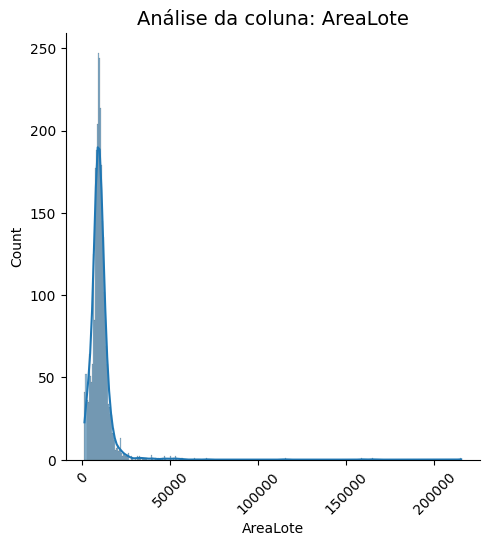

In [78]:
AnaliseColuna(bd, 'AreaLote' , False)

In [79]:
df['AreaLote'] = bd['AreaLote']

Quantidade de valores únicos: 2

Quais são os valores únicos: ['Pave' 'Grvl']

Quantidade de valores nulos: 0

Quantidade por opção: 
Rua
Pave    2907
Grvl      12
Name: count, dtype: int64


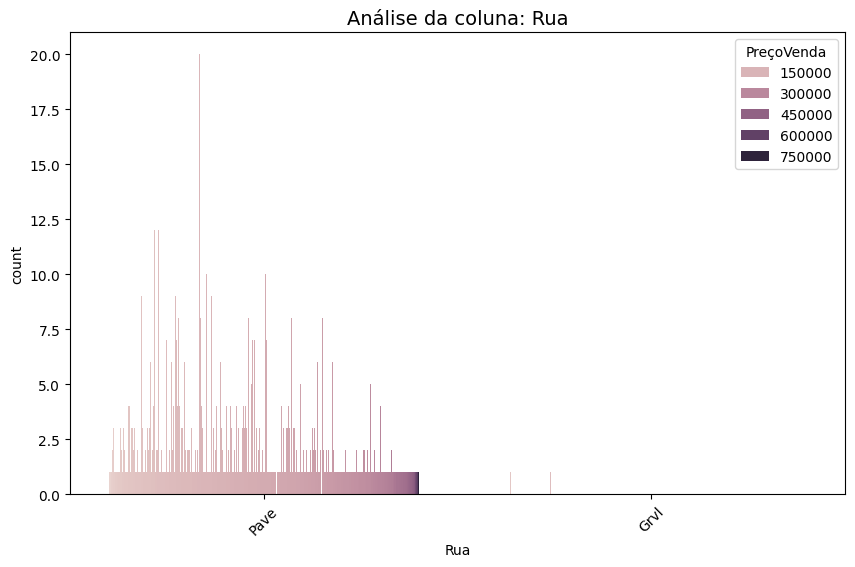

In [80]:
AnaliseColuna(bd , 'Rua' )

In [81]:
df['Rua'] = bd['Rua']

Quantidade de valores únicos: 2

Quais são os valores únicos: [nan 'Grvl' 'Pave']

Quantidade de valores nulos: 2721

Quantidade por opção: 
Beco
Grvl    120
Pave     78
Name: count, dtype: int64


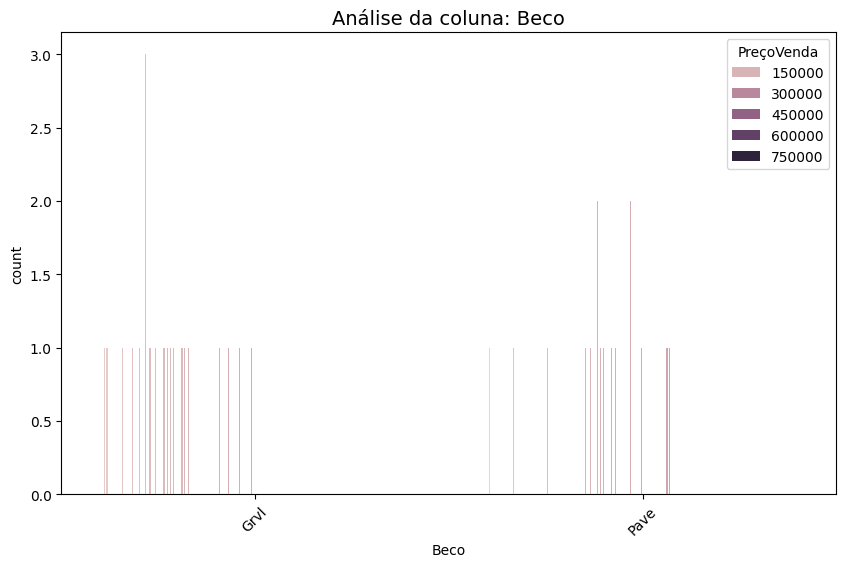

In [82]:
AnaliseColuna(bd, 'Beco')

In [83]:
bd.Beco.fillna("SemAcesso", inplace=True)

C:\Users\Vitor\AppData\Local\Temp\ipykernel_9720\832086120.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bd.Beco.fillna("SemAcesso", inplace=True)


Quantidade de valores únicos: 3

Quais são os valores únicos: ['SemAcesso' 'Grvl' 'Pave']

Quantidade de valores nulos: 0

Quantidade por opção: 
Beco
SemAcesso    2721
Grvl          120
Pave           78
Name: count, dtype: int64


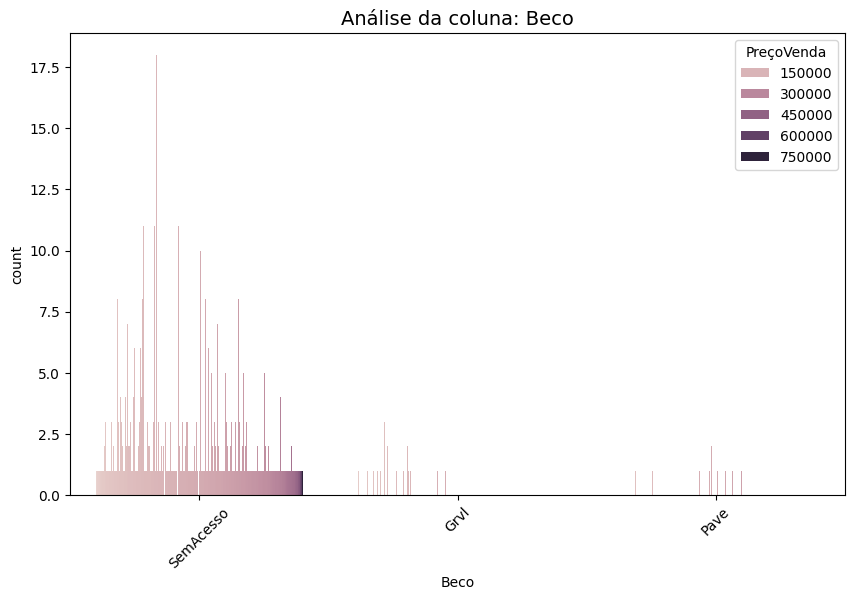

In [84]:
AnaliseColuna(bd, 'Beco')

In [85]:
df['Beco'] = bd['Beco']

Quantidade de valores únicos: 4

Quais são os valores únicos: ['Reg' 'IR1' 'IR2' 'IR3']

Quantidade de valores nulos: 0

Quantidade por opção: 
FormaLote
Reg    1859
IR1     968
IR2      76
IR3      16
Name: count, dtype: int64


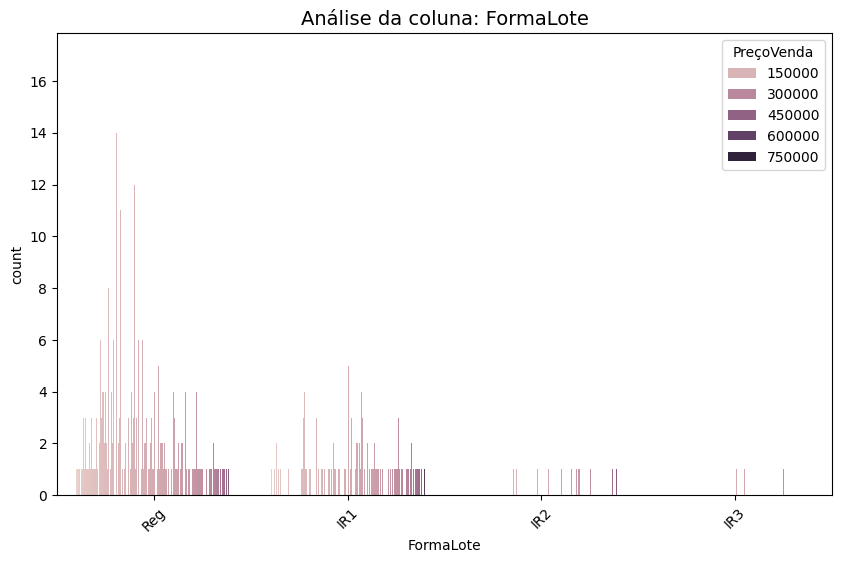

In [86]:
AnaliseColuna(bd, 'FormaLote')

In [87]:
df['FormaLote'] = bd['FormaLote']

Quantidade de valores únicos: 4

Quais são os valores únicos: ['Lvl' 'Bnk' 'Low' 'HLS']

Quantidade de valores nulos: 0

Quantidade por opção: 
ContornoTerreno
Lvl    2622
HLS     120
Bnk     117
Low      60
Name: count, dtype: int64


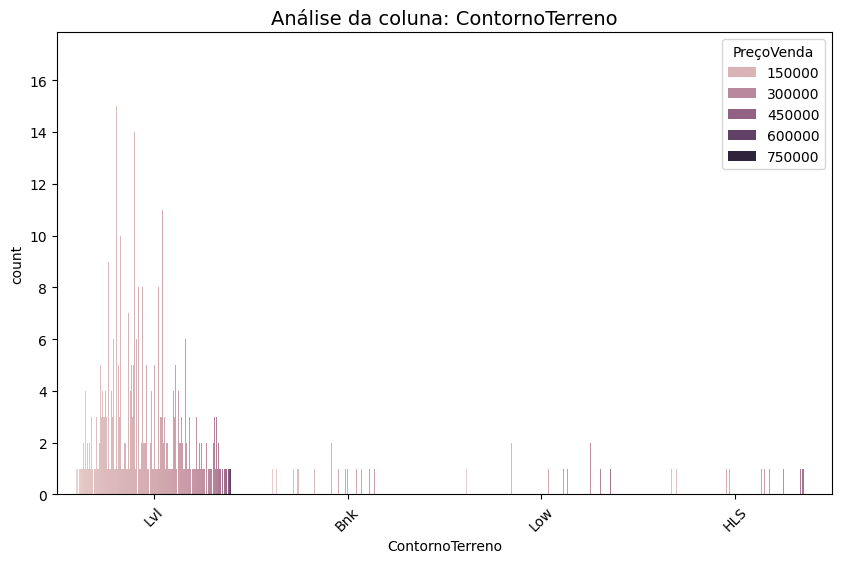

In [88]:
AnaliseColuna(bd , 'ContornoTerreno')

In [89]:
df['ContornoTerreno'] = bd['ContornoTerreno']

Quantidade de valores únicos: 2

Quais são os valores únicos: ['AllPub' 'NoSeWa' nan]

Quantidade de valores nulos: 2

Quantidade por opção: 
Utilidades
AllPub    2916
NoSeWa       1
Name: count, dtype: int64


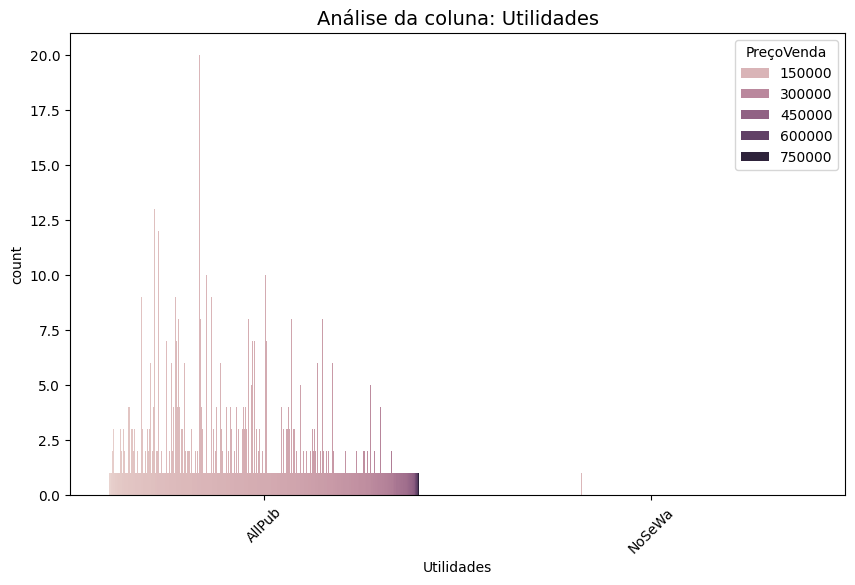

In [90]:
AnaliseColuna(bd , 'Utilidades')

In [91]:
bd[bd.Utilidades.isnull()]

Id  ClasseMS ZoneamentoMS  FrenteLote  AreaLote   Rua       Beco  \
1915  1916        30           RM       109.0     21780  Grvl  SemAcesso   
1945  1946        20           RL        78.0     31220  Pave  SemAcesso   

     FormaLote ContornoTerreno Utilidades  ... AreaPiscina QualidadePiscina  \
1915       Reg             Lvl        NaN  ...           0              NaN   
1945       IR1             Bnk        NaN  ...           0              NaN   

     Cerca RecursoDiverso ValorDiverso MesVenda AnoVenda  TipoVenda  \
1915   NaN            NaN            0        3     2009      ConLD   
1945   NaN           Shed          750        5     2008         WD   

      CondiçãoVenda  PreçoVenda  
1915         Normal         NaN  
1945         Normal         NaN  

[2 rows x 81 columns]

In [92]:
bd.Utilidades.fillna("AllPub", inplace=True)

C:\Users\Vitor\AppData\Local\Temp\ipykernel_9720\3433895029.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bd.Utilidades.fillna("AllPub", inplace=True)


In [93]:
bd.Utilidades.isnull().sum()

0

In [94]:
df['Utilidades'] = bd['Utilidades']

Quantidade de valores únicos: 5

Quais são os valores únicos: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']

Quantidade de valores nulos: 0

Quantidade por opção: 
ConfigLote
Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: count, dtype: int64


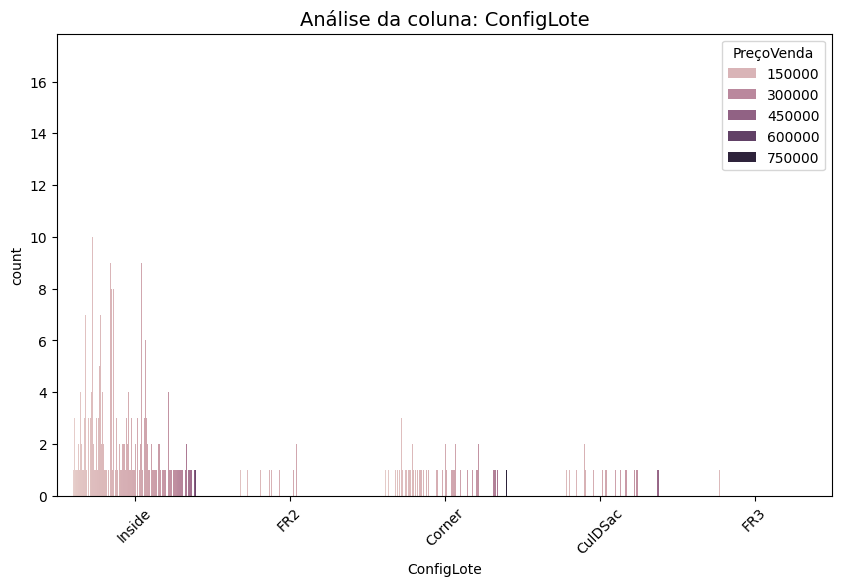

In [95]:
AnaliseColuna(bd , 'ConfigLote')

In [96]:
df['ConfigLote'] = bd['ConfigLote']

In [97]:
dadosNulos(bd)

 DADOS NULOS: 

RevestimentoExterno1 = 1
RevestimentoExterno2 = 1
TipoRevestimentoMaciço = 1766
AreaRevestimentoMaciço = 23
QualidadePorão = 81
CondiçãoPorão = 82
ExposiçãoPorão = 82
TipoAcabamentoPorão1 = 79
AreaAcabadaPorão1 = 1
TipoAcabamentoPorão2 = 80
AreaAcabadaPorão2 = 1
AreaPorãoNaoAcabada = 1
AreaTotalPorão = 1
InstalaçãoElétrica = 1
BanheiroCompletoPorão = 2
MeioBanheiroPorão = 2
QualidadeCozinha = 1
Funcionalidade = 2
QualidadeLareira = 1420
TipoGaragem = 157
AnoConstruçãoGaragem = 159
AcabamentoGaragem = 159
VagasGaragem = 1
AreaGaragem = 1
QualidadeGaragem = 159
CondiçãoGaragem = 159
QualidadePiscina = 2909
Cerca = 2348
RecursoDiverso = 2814
TipoVenda = 1
PreçoVenda = 1459


Quantidade de valores únicos: 15

Quais são os valores únicos: ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock' nan]

Quantidade de valores nulos: 1

Quantidade por opção: 
RevestimentoExterno1
VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

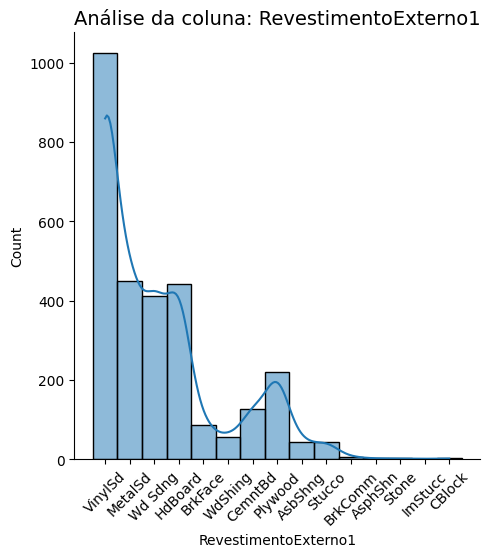

In [98]:
AnaliseColuna(bd , 'RevestimentoExterno1' , False)

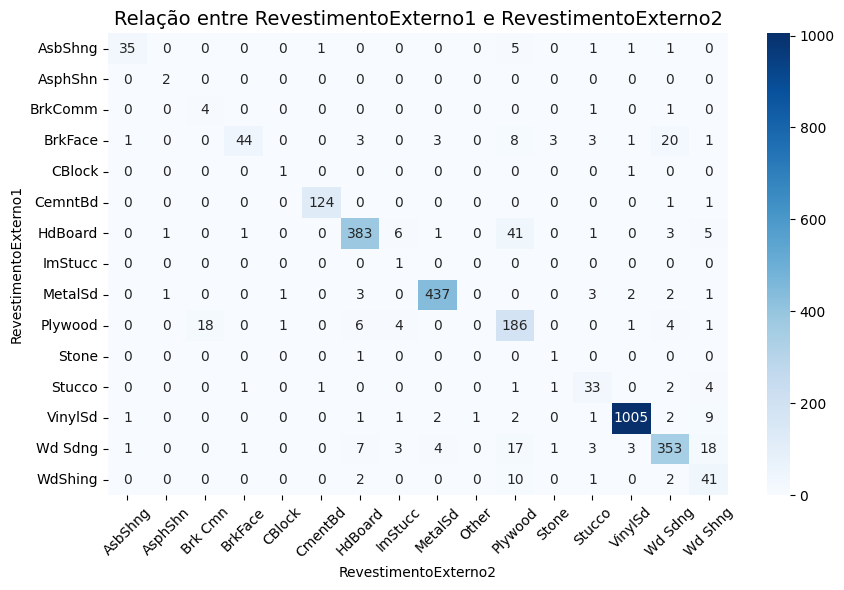

In [99]:
cross_tab = pd.crosstab(bd['RevestimentoExterno1'], bd['RevestimentoExterno2'])

plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d')

plt.title('Relação entre RevestimentoExterno1 e RevestimentoExterno2', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


In [100]:
bd.RevestimentoExterno1.fillna("VinylSd", inplace=True)

C:\Users\Vitor\AppData\Local\Temp\ipykernel_9720\1680659077.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bd.RevestimentoExterno1.fillna("VinylSd", inplace=True)


In [101]:
bd.RevestimentoExterno2.fillna("VinylSd", inplace=True)

C:\Users\Vitor\AppData\Local\Temp\ipykernel_9720\2815200606.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bd.RevestimentoExterno2.fillna("VinylSd", inplace=True)


Quantidade de valores únicos: 15

Quais são os valores únicos: ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']

Quantidade de valores nulos: 0

Quantidade por opção: 
RevestimentoExterno1
VinylSd    1026
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

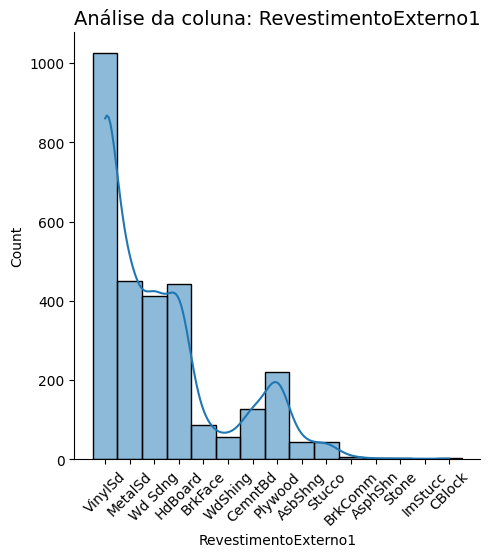

In [102]:
AnaliseColuna(bd, 'RevestimentoExterno1', False)

Quantidade de valores únicos: 16

Quais são os valores únicos: ['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock']

Quantidade de valores nulos: 0

Quantidade por opção: 
RevestimentoExterno2
VinylSd    1015
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

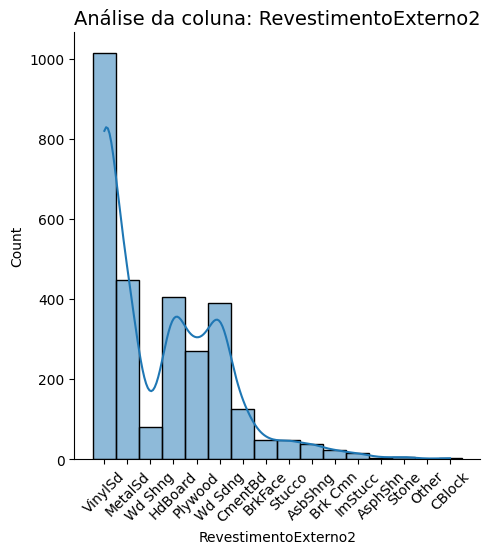

In [103]:
AnaliseColuna(bd, 'RevestimentoExterno2', False)

In [104]:
df['RevestimentoExterno1'] = bd['RevestimentoExterno1']

In [105]:
df['RevestimentoExterno2'] = bd['RevestimentoExterno2']

In [106]:
df

ClasseMS ZoneamentoMS  FrenteLote  AreaLote   Rua       Beco FormaLote  \
0           60           RL        65.0      8450  Pave  SemAcesso       Reg   
1           20           RL        80.0      9600  Pave  SemAcesso       Reg   
2           60           RL        68.0     11250  Pave  SemAcesso       IR1   
3           70           RL        60.0      9550  Pave  SemAcesso       IR1   
4           60           RL        84.0     14260  Pave  SemAcesso       IR1   
...        ...          ...         ...       ...   ...        ...       ...   
2914       160           RM        21.0      1936  Pave  SemAcesso       Reg   
2915       160           RM        21.0      1894  Pave  SemAcesso       Reg   
2916        20           RL       160.0     20000  Pave  SemAcesso       Reg   
2917        85           RL        62.0     10441  Pave  SemAcesso       Reg   
2918        60           RL        74.0      9627  Pave  SemAcesso       Reg   

     ContornoTerreno Utilidades ConfigLote RevestimentoExterno1  \
0                Lvl     AllPub     Inside              VinylSd   
1                Lvl     AllPub        FR2              MetalSd   
2                Lvl     AllPub     Inside              VinylSd   
3                Lvl     AllPub     Corner              Wd Sdng   
4                Lvl     AllPub        FR2              VinylSd   
...              ...        ...        ...                  ...   
2914             Lvl     AllPub     Inside              CemntBd   
2915             Lvl     AllPub     Inside              CemntBd   
2916             Lvl     AllPub     Inside              VinylSd   
2917             Lvl     AllPub     Inside              HdBoard   
2918             Lvl     AllPub     Inside              HdBoard   

     RevestimentoExterno2  
0                 VinylSd  
1                 MetalSd  
2                 VinylSd  
3                 Wd Shng  
4                 VinylSd  
...                   ...  
2914              CmentBd  
2915              CmentBd  
2916              VinylSd  
2917              Wd Shng  
2918              HdBoard  

[2919 rows x 12 columns]

Quantidade de valores únicos: 3

Quais são os valores únicos: ['BrkFace' nan 'Stone' 'BrkCmn']

Quantidade de valores nulos: 1766

Quantidade por opção: 
TipoRevestimentoMaciço
BrkFace    879
Stone      249
BrkCmn      25
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

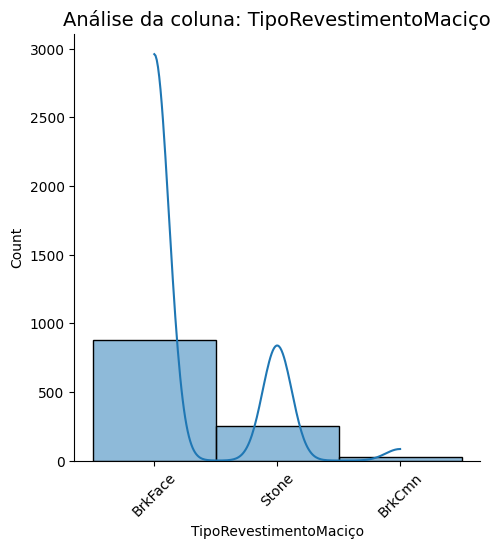

In [107]:
AnaliseColuna(bd, 'TipoRevestimentoMaciço', False)

In [108]:
bd.TipoRevestimentoMaciço.fillna("Nenhum", inplace=True)

C:\Users\Vitor\AppData\Local\Temp\ipykernel_9720\2610000511.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bd.TipoRevestimentoMaciço.fillna("Nenhum", inplace=True)


In [109]:
df['TipoRevestimentoMaciço'] = bd['TipoRevestimentoMaciço']

Quantidade de valores únicos: 444

Quais são os valores únicos: [1.960e+02 0.000e+00 1.620e+02 3.500e+02 1.860e+02 2.400e+02 2.860e+02
 3.060e+02 2.120e+02 1.800e+02 3.800e+02 2.810e+02 6.400e+02 2.000e+02
 2.460e+02 1.320e+02 6.500e+02 1.010e+02 4.120e+02 2.720e+02 4.560e+02
 1.031e+03 1.780e+02 5.730e+02 3.440e+02 2.870e+02 1.670e+02 1.115e+03
 4.000e+01 1.040e+02 5.760e+02 4.430e+02 4.680e+02 6.600e+01 2.200e+01
 2.840e+02 7.600e+01 2.030e+02 6.800e+01 1.830e+02 4.800e+01 2.800e+01
 3.360e+02 6.000e+02 7.680e+02 4.800e+02 2.200e+02 1.840e+02 1.129e+03
 1.160e+02 1.350e+02 2.660e+02 8.500e+01 3.090e+02 1.360e+02 2.880e+02
 7.000e+01 3.200e+02 5.000e+01 1.200e+02 4.360e+02 2.520e+02 8.400e+01
 6.640e+02 2.260e+02 3.000e+02 6.530e+02 1.120e+02 4.910e+02 2.680e+02
 7.480e+02 9.800e+01 2.750e+02 1.380e+02 2.050e+02 2.620e+02 1.280e+02
 2.600e+02 1.530e+02 6.400e+01 3.120e+02 1.600e+01 9.220e+02 1.420e+02
 2.900e+02 1.270e+02 5.060e+02 2.970e+02       nan 6.040e+02 2.540e+02
 3.600e+01 1.

<Figure size 1000x600 with 0 Axes>

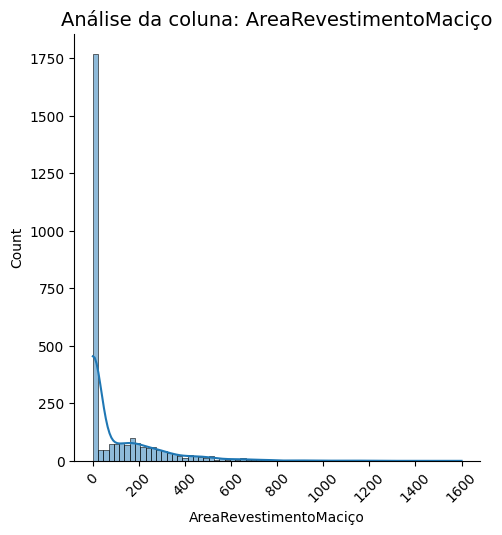

In [110]:
AnaliseColuna(bd , 'AreaRevestimentoMaciço' , False)

In [111]:
bd.AreaRevestimentoMaciço.isnull().sum()

23

In [112]:
cont = 0

for index, row in bd[bd['AreaRevestimentoMaciço'].isnull()].iterrows():
    if row['TipoRevestimentoMaciço'] == 'Nenhum':
        cont += 1

print(cont)


23


In [113]:
cont = 0

for index, row in bd[bd['AreaRevestimentoMaciço'].isnull()].iterrows():
    if row['TipoRevestimentoMaciço'] != 'Nenhum':
        cont += 1

print(cont)

0


In [114]:
bd.AreaRevestimentoMaciço.isnull().sum()

23

In [115]:
bd.AreaRevestimentoMaciço.fillna(0.0, inplace=True)

C:\Users\Vitor\AppData\Local\Temp\ipykernel_9720\4279071651.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bd.AreaRevestimentoMaciço.fillna(0.0, inplace=True)


In [116]:
df['AreaRevestimentoMaciço'] = bd['AreaRevestimentoMaciço']

In [117]:
dadosNulos(bd)

 DADOS NULOS: 

QualidadePorão = 81
CondiçãoPorão = 82
ExposiçãoPorão = 82
TipoAcabamentoPorão1 = 79
AreaAcabadaPorão1 = 1
TipoAcabamentoPorão2 = 80
AreaAcabadaPorão2 = 1
AreaPorãoNaoAcabada = 1
AreaTotalPorão = 1
InstalaçãoElétrica = 1
BanheiroCompletoPorão = 2
MeioBanheiroPorão = 2
QualidadeCozinha = 1
Funcionalidade = 2
QualidadeLareira = 1420
TipoGaragem = 157
AnoConstruçãoGaragem = 159
AcabamentoGaragem = 159
VagasGaragem = 1
AreaGaragem = 1
QualidadeGaragem = 159
CondiçãoGaragem = 159
QualidadePiscina = 2909
Cerca = 2348
RecursoDiverso = 2814
TipoVenda = 1
PreçoVenda = 1459


### tenho 79 casas sem porao

        QualidadePorão = 81
        CondiçãoPorão = 82
        ExposiçãoPorão = 82
        TipoAcabamentoPorão1 = 79
        AreaAcabadaPorão1 = 1
        TipoAcabamentoPorão2 = 80
        AreaAcabadaPorão2 = 1
        AreaPorãoNaoAcabada = 1
        AreaTotalPorão = 1

Quantidade de valores únicos: 6

Quais são os valores únicos: ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']

Quantidade de valores nulos: 79

Quantidade por opção: 
TipoAcabamentoPorão1
Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

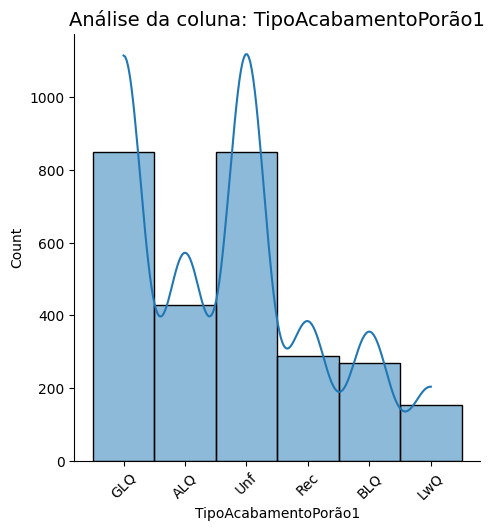

In [118]:
AnaliseColuna(bd , 'TipoAcabamentoPorão1' , False)

In [119]:
bd.TipoAcabamentoPorão1.fillna("SemPorao", inplace=True)

C:\Users\Vitor\AppData\Local\Temp\ipykernel_9720\1649567735.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bd.TipoAcabamentoPorão1.fillna("SemPorao", inplace=True)


Quantidade de valores únicos: 6

Quais são os valores únicos: ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']

Quantidade de valores nulos: 80

Quantidade por opção: 
TipoAcabamentoPorão2
Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

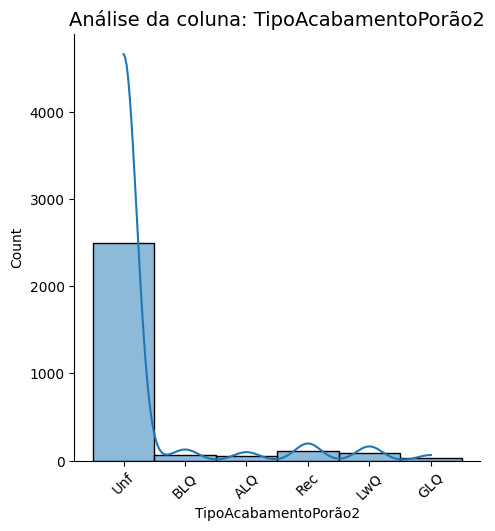

In [120]:
AnaliseColuna(bd , 'TipoAcabamentoPorão2' , False)

In [121]:
bd.loc[(bd['TipoAcabamentoPorão2'].isnull()) & (bd['TipoAcabamentoPorão1'] != 'SemPorao'), 'TipoAcabamentoPorão1'] 

332    GLQ
Name: TipoAcabamentoPorão1, dtype: object

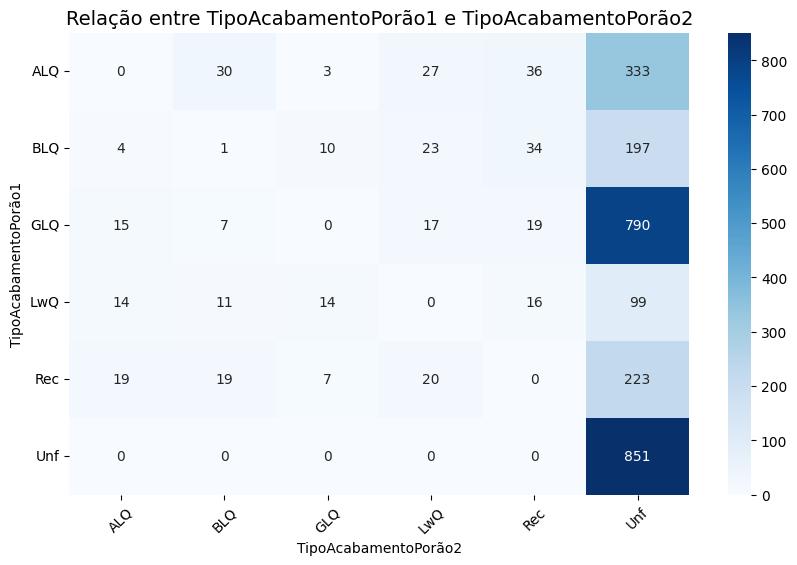

In [122]:
cross_tab = pd.crosstab(bd['TipoAcabamentoPorão1'], bd['TipoAcabamentoPorão2'])

plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d')

plt.title('Relação entre TipoAcabamentoPorão1 e TipoAcabamentoPorão2', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [123]:
bd.loc[(bd['TipoAcabamentoPorão2'].isnull()) & (bd['TipoAcabamentoPorão1'] == 'GLQ'), 'TipoAcabamentoPorão2'] = 'Unf'

In [124]:
bd.TipoAcabamentoPorão2.fillna("SemPorao", inplace=True)

C:\Users\Vitor\AppData\Local\Temp\ipykernel_9720\250094337.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bd.TipoAcabamentoPorão2.fillna("SemPorao", inplace=True)


In [125]:
bd.TipoAcabamentoPorão2.isnull().sum()

0

In [126]:
df['TipoAcabamentoPorão2'] = bd['TipoAcabamentoPorão2']

Quantidade de valores únicos: 4

Quais são os valores únicos: ['Gd' 'TA' 'Ex' nan 'Fa']

Quantidade de valores nulos: 81

Quantidade por opção: 
QualidadePorão
TA    1283
Gd    1209
Ex     258
Fa      88
Name: count, dtype: int64


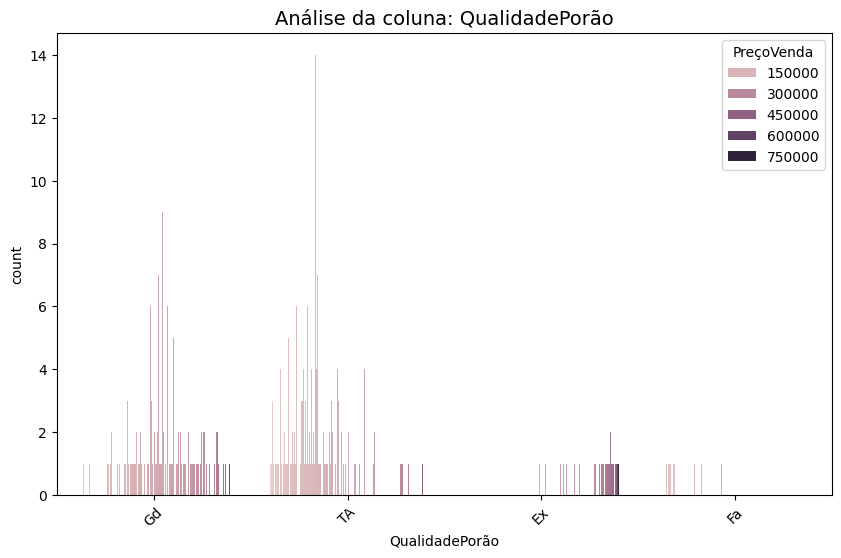

In [127]:
AnaliseColuna(bd, 'QualidadePorão' )

In [128]:
bd.loc[(bd['QualidadePorão'].isnull()) & (bd['TipoAcabamentoPorão1'] == 'SemPorao'), 'QualidadePorão']  = 'SemPorao'

In [129]:
bd.loc[bd['QualidadePorão'].isnull(), 'CondiçãoPorão']

2217    Fa
2218    TA
Name: CondiçãoPorão, dtype: object

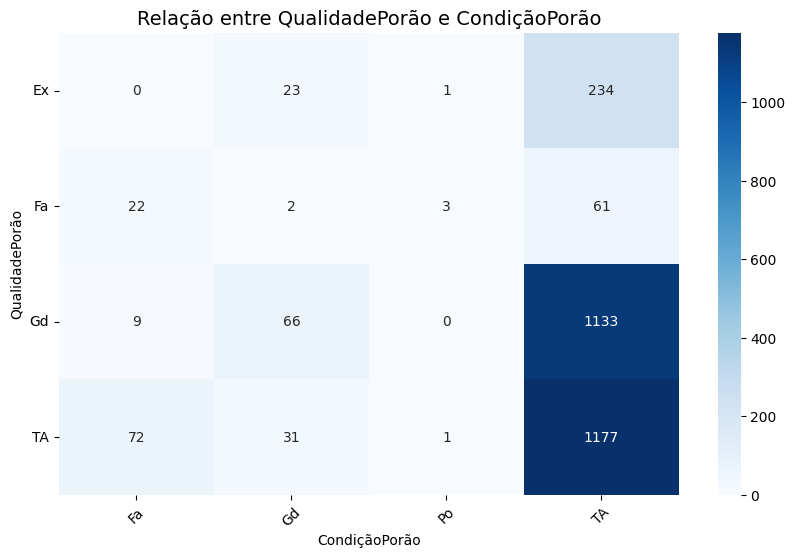

In [130]:
cross_tab = pd.crosstab(bd['QualidadePorão'], bd['CondiçãoPorão'])

plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d')

plt.title('Relação entre QualidadePorão e CondiçãoPorão', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [131]:
bd.loc[bd['QualidadePorão'].isnull(), 'TipoRevestimentoMaciço']

2217    Nenhum
2218    Nenhum
Name: TipoRevestimentoMaciço, dtype: object

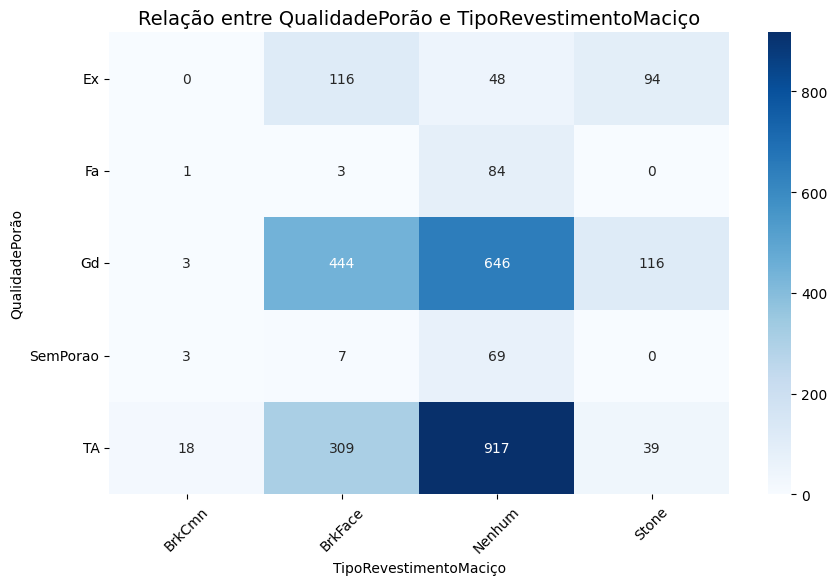

In [132]:
cross_tab = pd.crosstab(bd['QualidadePorão'], bd['TipoRevestimentoMaciço'])

plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d')

plt.title('Relação entre QualidadePorão e TipoRevestimentoMaciço', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [133]:
bd.loc[bd['QualidadePorão'].isnull(), 'AreaTotalPorão']

2217    173.0
2218    356.0
Name: AreaTotalPorão, dtype: float64

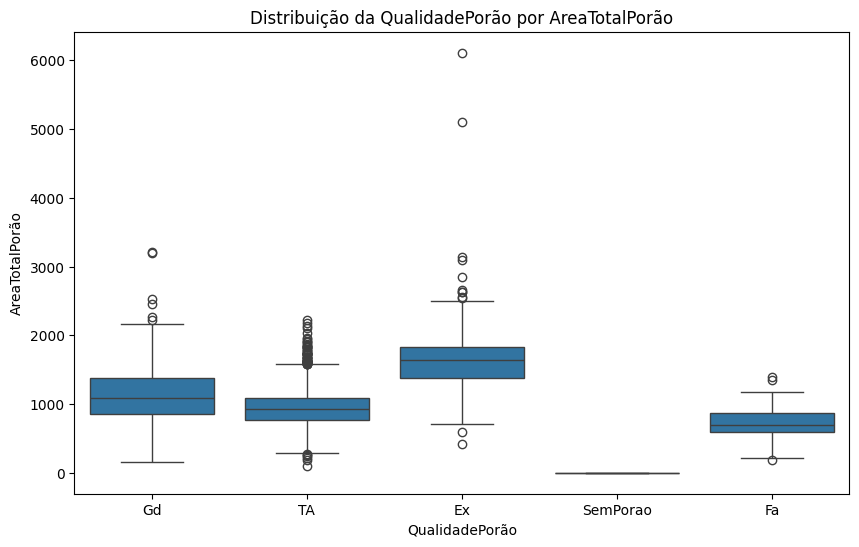

In [134]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='QualidadePorão', y='AreaTotalPorão', data=bd)
plt.title('Distribuição da QualidadePorão por AreaTotalPorão')
plt.xlabel('QualidadePorão')
plt.ylabel('AreaTotalPorão')
plt.show()

In [135]:
bd.loc[bd['QualidadePorão'].isnull(), 'Fundação']

2217    Stone
2218    PConc
Name: Fundação, dtype: object

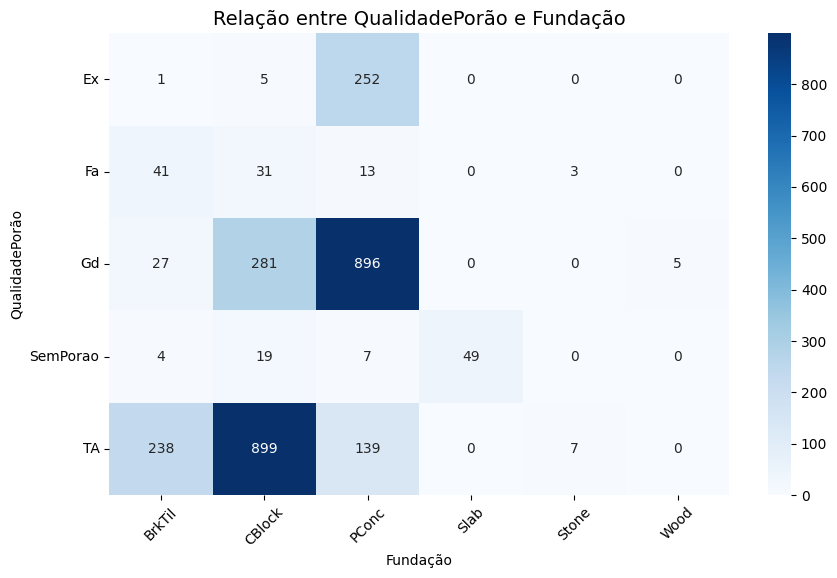

In [136]:
cross_tab = pd.crosstab(bd['QualidadePorão'], bd['Fundação'])

plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d')

plt.title('Relação entre QualidadePorão e Fundação', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [137]:
bd.loc[bd['QualidadePorão'].isnull(), 'QualidadeAquecimento']

2217    Ex
2218    TA
Name: QualidadeAquecimento, dtype: object

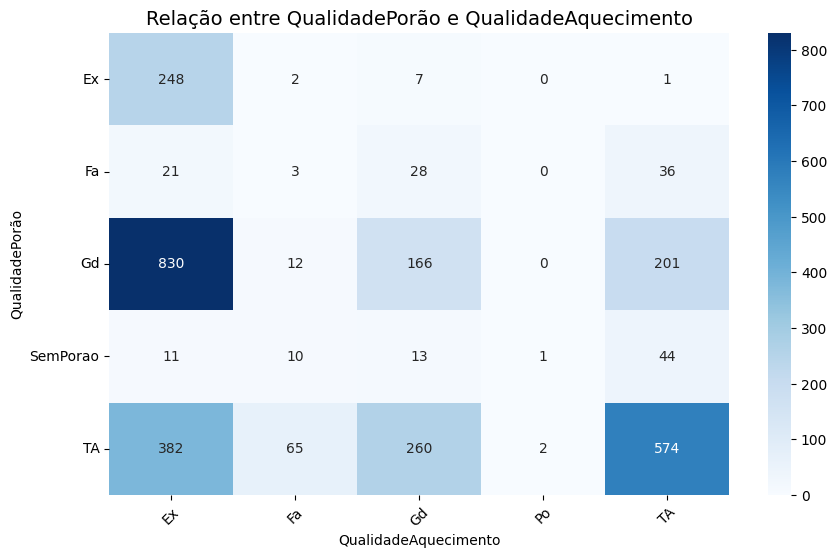

In [138]:
cross_tab = pd.crosstab(bd['QualidadePorão'], bd['QualidadeAquecimento'])

plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d')

plt.title('Relação entre QualidadePorão e QualidadeAquecimento', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

        2217 TA TA Gd TA EX TA Gd
        2218 TA TA Gd EX Gd TA

In [139]:
bd.QualidadePorão.fillna("TA", inplace=True)

C:\Users\Vitor\AppData\Local\Temp\ipykernel_9720\3015279888.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bd.QualidadePorão.fillna("TA", inplace=True)


In [140]:
df['QualidadePorão'] = bd['QualidadePorão']

Quantidade de valores únicos: 4

Quais são os valores únicos: ['TA' 'Gd' nan 'Fa' 'Po']

Quantidade de valores nulos: 82

Quantidade por opção: 
CondiçãoPorão
TA    2606
Gd     122
Fa     104
Po       5
Name: count, dtype: int64


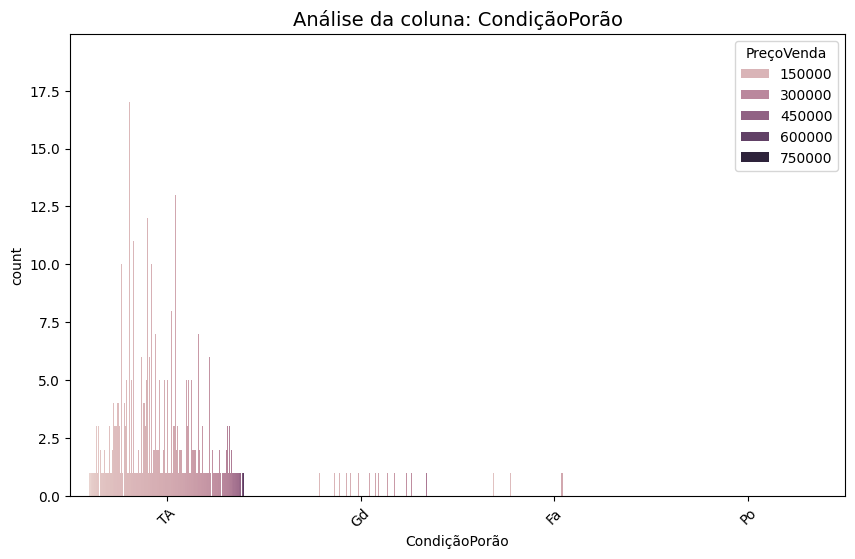

In [141]:
AnaliseColuna(bd , 'CondiçãoPorão' )

In [142]:
bd.loc[(bd['CondiçãoPorão'].isnull()) & (bd['TipoAcabamentoPorão1'] == 'SemPorao')] 

Id  ClasseMS ZoneamentoMS  FrenteLote  AreaLote   Rua       Beco  \
17      18        90           RL        72.0     10791  Pave  SemAcesso   
39      40        90           RL        65.0      6040  Pave  SemAcesso   
90      91        20           RL        60.0      7200  Pave  SemAcesso   
102    103        90           RL        64.0      7018  Pave  SemAcesso   
156    157        20           RL        60.0      7200  Pave  SemAcesso   
...    ...       ...          ...         ...       ...   ...        ...   
2803  2804        20           RL       100.0     21370  Pave  SemAcesso   
2804  2805        30           RL        55.0      8250  Pave  SemAcesso   
2824  2825        20           RL        80.0     12048  Pave  SemAcesso   
2891  2892        30      C (all)        69.0     12366  Pave  SemAcesso   
2904  2905        20           RM       125.0     31250  Pave  SemAcesso   

     FormaLote ContornoTerreno Utilidades  ... AreaPiscina QualidadePiscina  \
17         Reg             Lvl     AllPub  ...           0              NaN   
39         Reg             Lvl     AllPub  ...           0              NaN   
90         Reg             Lvl     AllPub  ...           0              NaN   
102        Reg             Bnk     AllPub  ...           0              NaN   
156        Reg             Lvl     AllPub  ...           0              NaN   
...        ...             ...        ...  ...         ...              ...   
2803       Reg             Lvl     AllPub  ...           0              NaN   
2804       Reg             Lvl     AllPub  ...           0              NaN   
2824       Reg             Lvl     AllPub  ...           0              NaN   
2891       Reg             Lvl     AllPub  ...           0              NaN   
2904       Reg             Lvl     AllPub  ...           0              NaN   

     Cerca RecursoDiverso ValorDiverso MesVenda AnoVenda  TipoVenda  \
17     NaN           Shed          500       10     2006         WD   
39     NaN            NaN            0        6     2008         WD   
90     NaN            NaN            0        7     2006         WD   
102    NaN            NaN            0        6     2009         WD   
156    NaN            NaN            0        6     2006         WD   
...    ...            ...          ...      ...      ...        ...   
2803   NaN           Shed          600        6     2006         WD   
2804   NaN            NaN            0        6     2006         WD   
2824   NaN            NaN            0        4     2006         WD   
2891   NaN            NaN            0       10     2006         WD   
2904   NaN            NaN            0        5     2006         WD   

      CondiçãoVenda  PreçoVenda  
17           Normal     90000.0  
39          AdjLand     82000.0  
90           Normal    109900.0  
102          Alloca    118964.0  
156          Normal    109500.0  
...             ...         ...  
2803         Normal         NaN  
2804         Normal         NaN  
2824         Normal         NaN  
2891        Abnorml         NaN  
2904         Normal         NaN  

[79 rows x 81 columns]

In [143]:
bd.loc[(bd['CondiçãoPorão'].isnull()) & (bd['TipoAcabamentoPorão1'] == 'SemPorao'), 'CondiçãoPorão']  = 'SemPorao'

In [144]:
bd.loc[(bd['CondiçãoPorão'].isnull())]

Id  ClasseMS ZoneamentoMS  FrenteLote  AreaLote   Rua       Beco  \
2040  2041        20           RL       103.0     16280  Pave  SemAcesso   
2185  2186        20           RL        65.0      6500  Pave  SemAcesso   
2524  2525        80           RL        72.0      9720  Pave  SemAcesso   

     FormaLote ContornoTerreno Utilidades  ... AreaPiscina QualidadePiscina  \
2040       Reg             Lvl     AllPub  ...           0              NaN   
2185       Reg             Lvl     AllPub  ...           0              NaN   
2524       Reg             Lvl     AllPub  ...           0              NaN   

      Cerca RecursoDiverso ValorDiverso MesVenda AnoVenda  TipoVenda  \
2040   GdWo            NaN            0        5     2008         WD   
2185    NaN            NaN            0        5     2008         WD   
2524  MnPrv            NaN            0        6     2007         WD   

      CondiçãoVenda  PreçoVenda  
2040         Normal         NaN  
2185         Normal         NaN  
2524         Normal         NaN  

[3 rows x 81 columns]

In [145]:
bd.loc[bd['CondiçãoPorão'].isnull(), 'QualidadePorão']

2040    Gd
2185    TA
2524    TA
Name: QualidadePorão, dtype: object

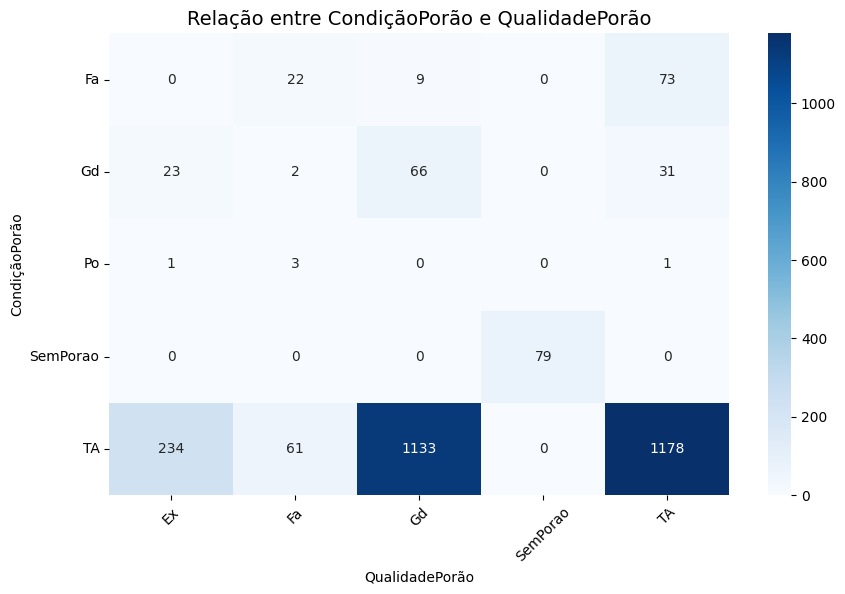

In [146]:
cross_tab = pd.crosstab(bd['CondiçãoPorão'], bd['QualidadePorão'])

plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d')

plt.title('Relação entre CondiçãoPorão e QualidadePorão', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [147]:
bd.loc[bd['CondiçãoPorão'].isnull(), 'TipoRevestimentoMaciço']

2040     Nenhum
2185    BrkFace
2524    BrkFace
Name: TipoRevestimentoMaciço, dtype: object

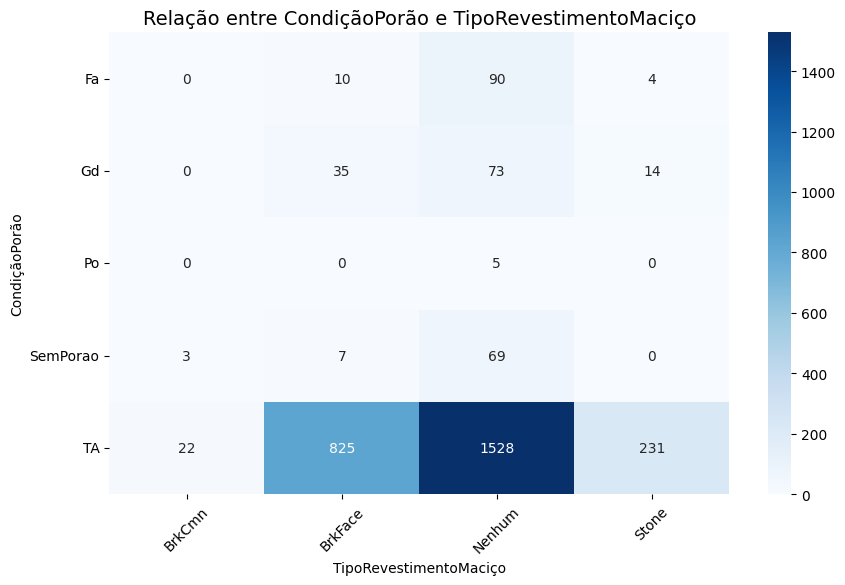

In [148]:
cross_tab = pd.crosstab(bd['CondiçãoPorão'], bd['TipoRevestimentoMaciço'])

plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d')

plt.title('Relação entre CondiçãoPorão e TipoRevestimentoMaciço', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [149]:
bd.loc[bd['CondiçãoPorão'].isnull(), 'AreaTotalPorão']

2040    1426.0
2185    1127.0
2524     995.0
Name: AreaTotalPorão, dtype: float64

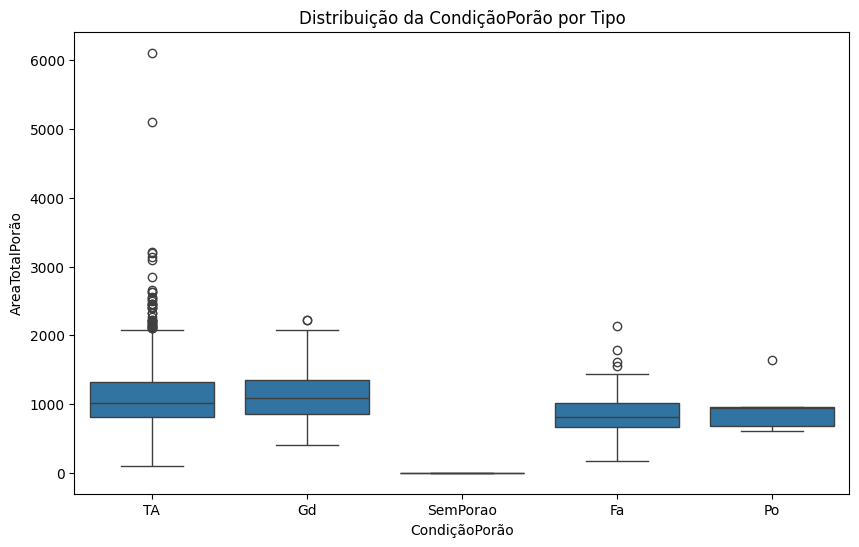

In [150]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='CondiçãoPorão', y='AreaTotalPorão', data=bd)
plt.title('Distribuição da CondiçãoPorão por Tipo')
plt.xlabel('CondiçãoPorão')
plt.ylabel('AreaTotalPorão')
plt.show()

In [151]:
bd.loc[bd['CondiçãoPorão'].isnull(), 'Fundação']

2040    CBlock
2185    CBlock
2524    CBlock
Name: Fundação, dtype: object

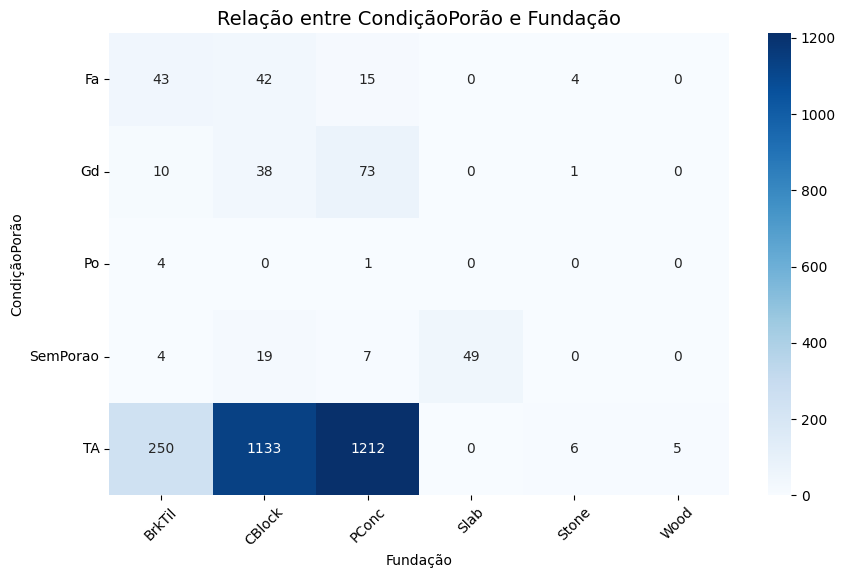

In [152]:
cross_tab = pd.crosstab(bd['CondiçãoPorão'], bd['Fundação'])

plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d')

plt.title('Relação entre CondiçãoPorão e Fundação', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [153]:
bd.loc[bd['CondiçãoPorão'].isnull(), 'QualidadeAquecimento']

2040    Ex
2185    TA
2524    TA
Name: QualidadeAquecimento, dtype: object

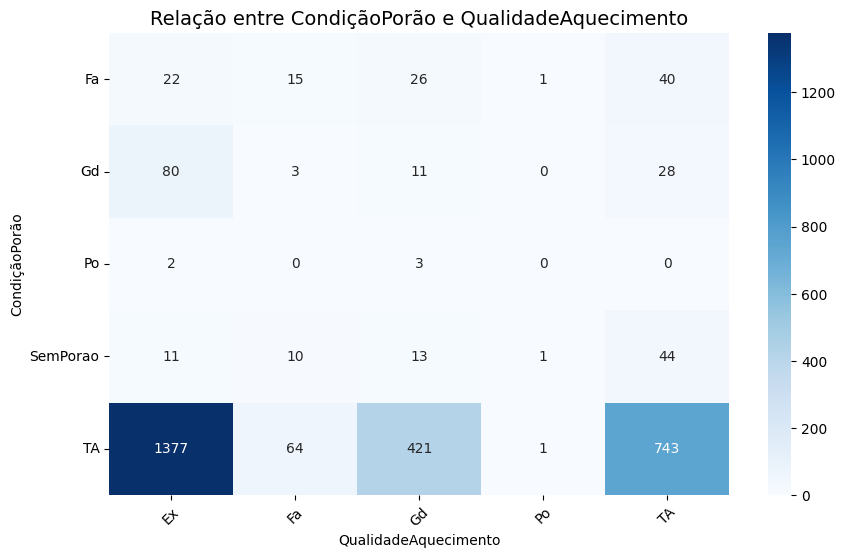

In [154]:
cross_tab = pd.crosstab(bd['CondiçãoPorão'], bd['QualidadeAquecimento'])

plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d')

plt.title('Relação entre CondiçãoPorão e QualidadeAquecimento', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

        2040 TA TA TA Ex
        2158 TA TA TA TA
        2524 TA TA TA TA

In [155]:
bd.CondiçãoPorão.fillna("TA", inplace=True)

C:\Users\Vitor\AppData\Local\Temp\ipykernel_9720\528951775.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bd.CondiçãoPorão.fillna("TA", inplace=True)


In [156]:
bd.CondiçãoPorão.isnull().sum()

0

In [157]:
df['CondiçãoPorão'] = bd['CondiçãoPorão']

Quantidade de valores únicos: 4

Quais são os valores únicos: ['No' 'Gd' 'Mn' 'Av' nan]

Quantidade de valores nulos: 82

Quantidade por opção: 
ExposiçãoPorão
No    1904
Av     418
Gd     276
Mn     239
Name: count, dtype: int64


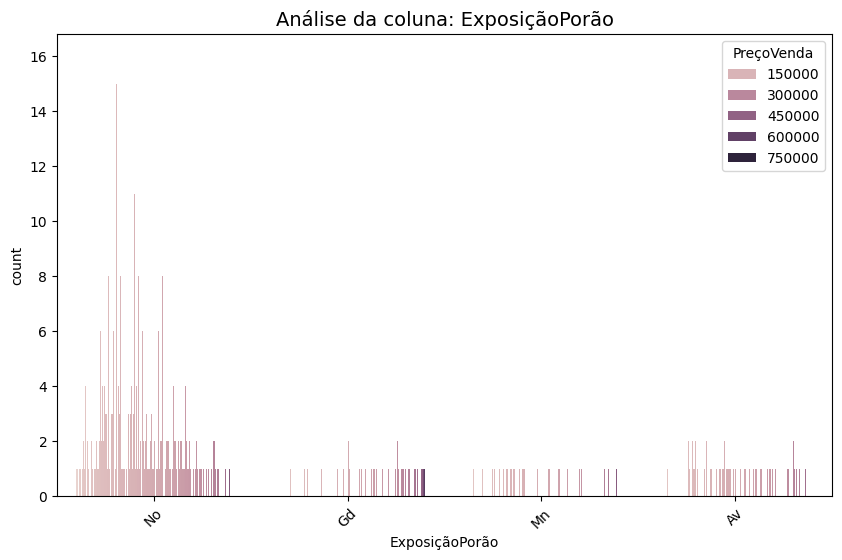

In [158]:
AnaliseColuna(bd , 'ExposiçãoPorão')

In [159]:
bd.loc[(bd['ExposiçãoPorão'].isnull()) & (bd['TipoAcabamentoPorão1'] == 'SemPorao')]  

Id  ClasseMS ZoneamentoMS  FrenteLote  AreaLote   Rua       Beco  \
17      18        90           RL        72.0     10791  Pave  SemAcesso   
39      40        90           RL        65.0      6040  Pave  SemAcesso   
90      91        20           RL        60.0      7200  Pave  SemAcesso   
102    103        90           RL        64.0      7018  Pave  SemAcesso   
156    157        20           RL        60.0      7200  Pave  SemAcesso   
...    ...       ...          ...         ...       ...   ...        ...   
2803  2804        20           RL       100.0     21370  Pave  SemAcesso   
2804  2805        30           RL        55.0      8250  Pave  SemAcesso   
2824  2825        20           RL        80.0     12048  Pave  SemAcesso   
2891  2892        30      C (all)        69.0     12366  Pave  SemAcesso   
2904  2905        20           RM       125.0     31250  Pave  SemAcesso   

     FormaLote ContornoTerreno Utilidades  ... AreaPiscina QualidadePiscina  \
17         Reg             Lvl     AllPub  ...           0              NaN   
39         Reg             Lvl     AllPub  ...           0              NaN   
90         Reg             Lvl     AllPub  ...           0              NaN   
102        Reg             Bnk     AllPub  ...           0              NaN   
156        Reg             Lvl     AllPub  ...           0              NaN   
...        ...             ...        ...  ...         ...              ...   
2803       Reg             Lvl     AllPub  ...           0              NaN   
2804       Reg             Lvl     AllPub  ...           0              NaN   
2824       Reg             Lvl     AllPub  ...           0              NaN   
2891       Reg             Lvl     AllPub  ...           0              NaN   
2904       Reg             Lvl     AllPub  ...           0              NaN   

     Cerca RecursoDiverso ValorDiverso MesVenda AnoVenda  TipoVenda  \
17     NaN           Shed          500       10     2006         WD   
39     NaN            NaN            0        6     2008         WD   
90     NaN            NaN            0        7     2006         WD   
102    NaN            NaN            0        6     2009         WD   
156    NaN            NaN            0        6     2006         WD   
...    ...            ...          ...      ...      ...        ...   
2803   NaN           Shed          600        6     2006         WD   
2804   NaN            NaN            0        6     2006         WD   
2824   NaN            NaN            0        4     2006         WD   
2891   NaN            NaN            0       10     2006         WD   
2904   NaN            NaN            0        5     2006         WD   

      CondiçãoVenda  PreçoVenda  
17           Normal     90000.0  
39          AdjLand     82000.0  
90           Normal    109900.0  
102          Alloca    118964.0  
156          Normal    109500.0  
...             ...         ...  
2803         Normal         NaN  
2804         Normal         NaN  
2824         Normal         NaN  
2891        Abnorml         NaN  
2904         Normal         NaN  

[79 rows x 81 columns]

In [160]:
bd.loc[(bd['ExposiçãoPorão'].isnull()) & (bd['TipoAcabamentoPorão1'] == 'SemPorao'), 'ExposiçãoPorão']  = 'SemPorao'

In [161]:
bd['ExposiçãoPorão'].isnull().sum()

3

In [162]:
bd.loc[bd['ExposiçãoPorão'].isnull(), 'QualidadePorão']

948     Gd
1487    Gd
2348    Gd
Name: QualidadePorão, dtype: object

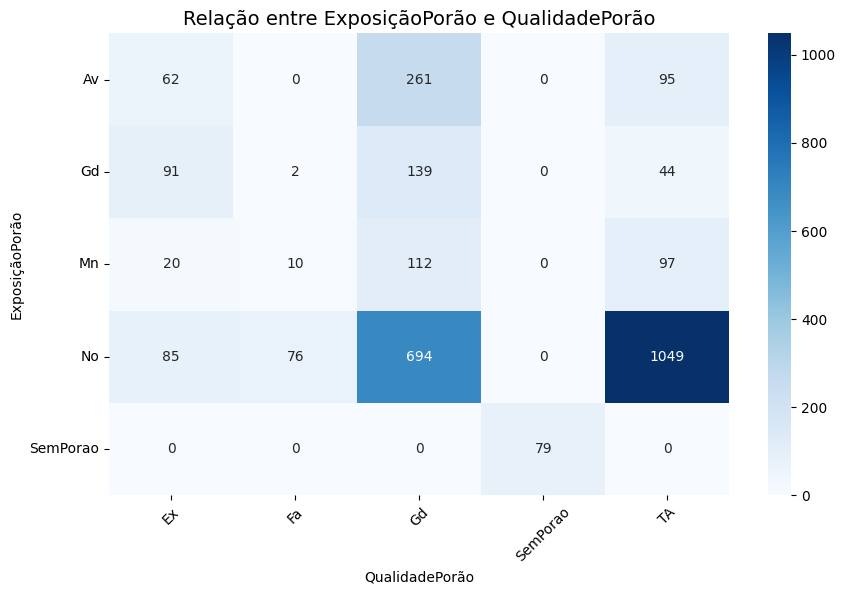

In [163]:
cross_tab = pd.crosstab(bd['ExposiçãoPorão'], bd['QualidadePorão'])

plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d')

plt.title('Relação entre ExposiçãoPorão e QualidadePorão', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [164]:
bd.loc[bd['ExposiçãoPorão'].isnull(), 'CondiçãoPorão']

948     TA
1487    TA
2348    TA
Name: CondiçãoPorão, dtype: object

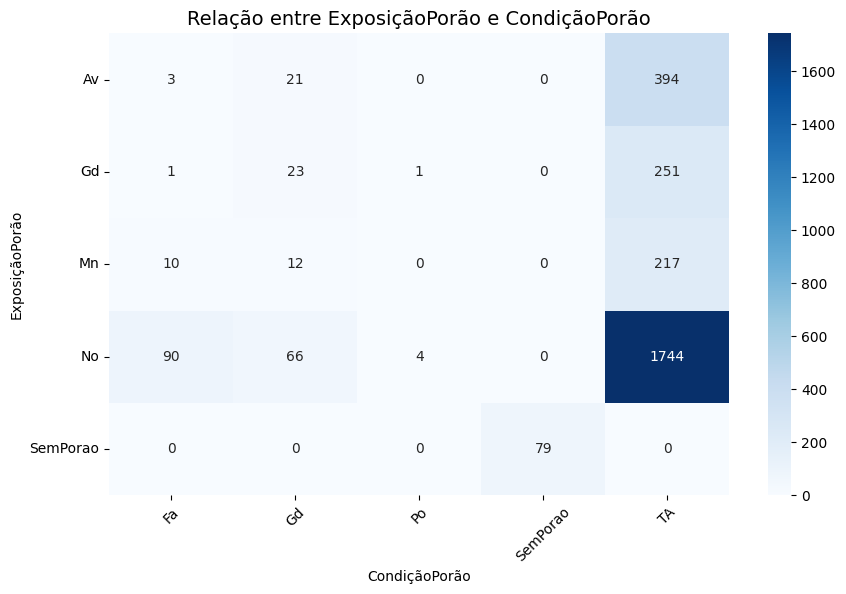

In [165]:
cross_tab = pd.crosstab(bd['ExposiçãoPorão'], bd['CondiçãoPorão'])

plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d')

plt.title('Relação entre ExposiçãoPorão e CondiçãoPorão', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [166]:
bd.loc[bd['ExposiçãoPorão'].isnull(), 'TipoRevestimentoMaciço']

948     BrkFace
1487    BrkFace
2348     Nenhum
Name: TipoRevestimentoMaciço, dtype: object

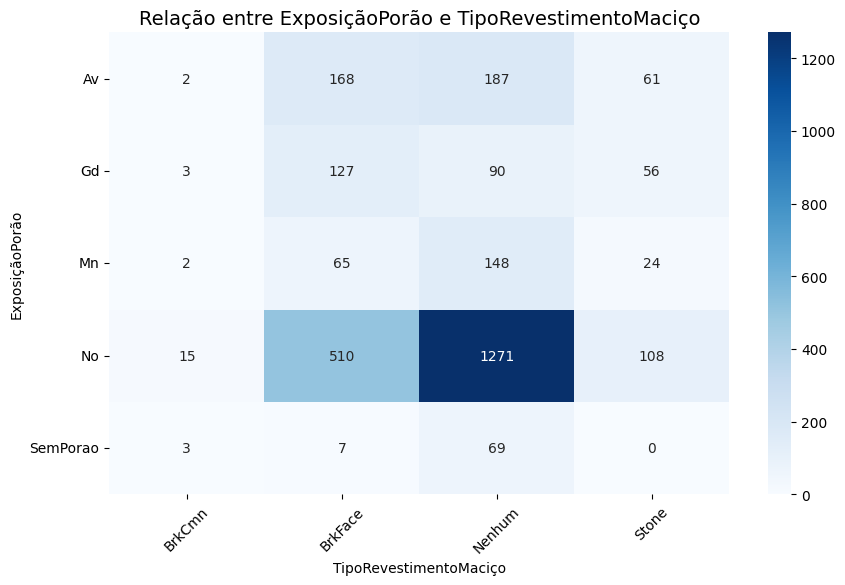

In [167]:
cross_tab = pd.crosstab(bd['ExposiçãoPorão'], bd['TipoRevestimentoMaciço'])

plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d')

plt.title('Relação entre ExposiçãoPorão e TipoRevestimentoMaciço', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [168]:
bd.loc[bd['ExposiçãoPorão'].isnull(), 'AreaTotalPorão']

948      936.0
1487    1595.0
2348     725.0
Name: AreaTotalPorão, dtype: float64

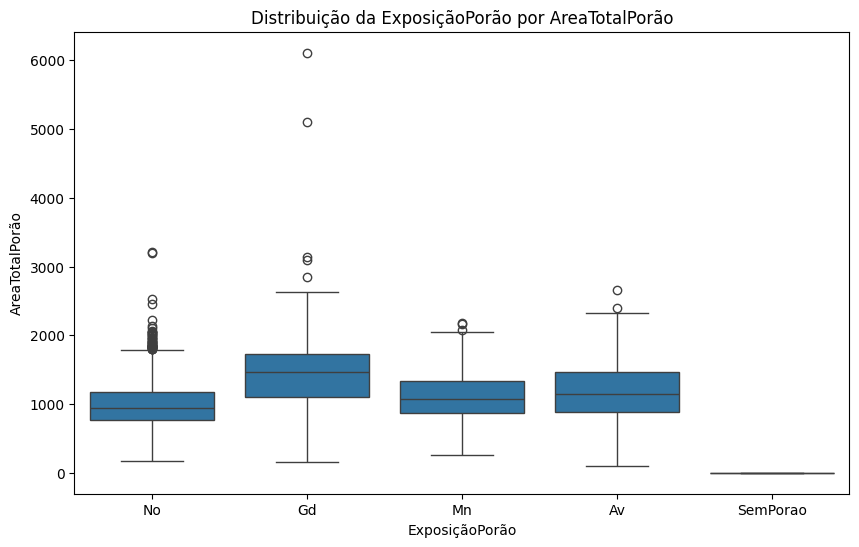

In [169]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='ExposiçãoPorão', y='AreaTotalPorão', data=bd)
plt.title('Distribuição da ExposiçãoPorão por AreaTotalPorão')
plt.xlabel('ExposiçãoPorão')
plt.ylabel('AreaTotalPorão')
plt.show()

In [170]:
bd.loc[bd['ExposiçãoPorão'].isnull(), 'Fundação']

948      PConc
1487     PConc
2348    CBlock
Name: Fundação, dtype: object

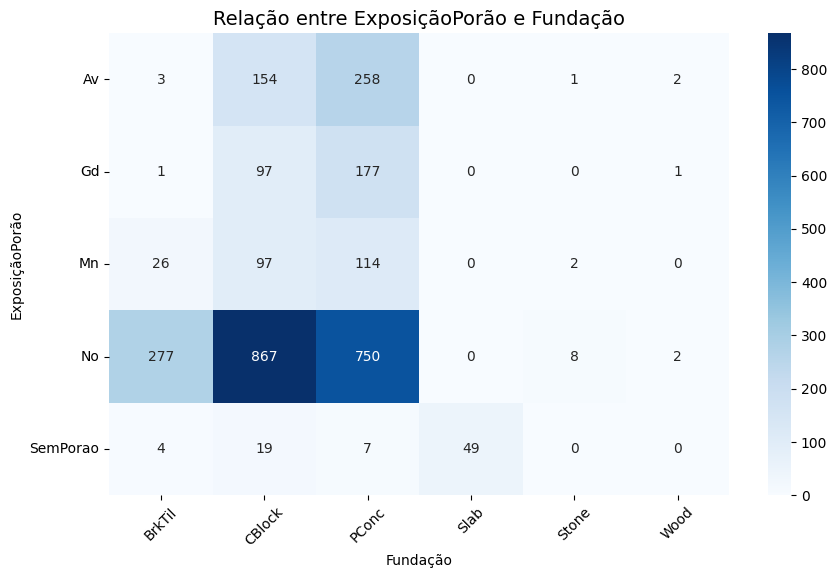

In [171]:
cross_tab = pd.crosstab(bd['ExposiçãoPorão'], bd['Fundação'])

plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d')

plt.title('Relação entre ExposiçãoPorão e Fundação', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [172]:
bd.loc[bd['ExposiçãoPorão'].isnull(), 'QualidadeAquecimento']

948     Ex
1487    Ex
2348    Ex
Name: QualidadeAquecimento, dtype: object

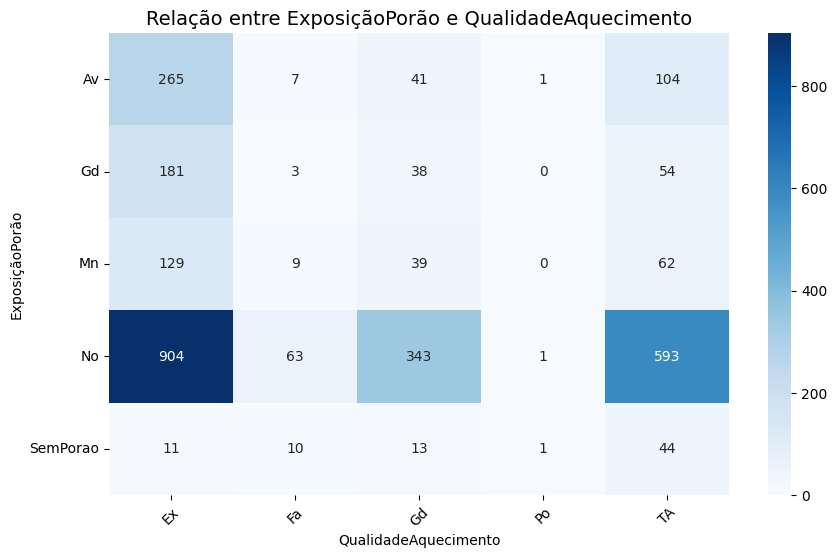

In [173]:
cross_tab = pd.crosstab(bd['ExposiçãoPorão'], bd['QualidadeAquecimento'])

plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d')

plt.title('Relação entre ExposiçãoPorão e QualidadeAquecimento', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

        948 No No No No No
        1487 No No No No No
        2348 No No No No No

In [174]:
bd.ExposiçãoPorão.fillna("No", inplace=True)

C:\Users\Vitor\AppData\Local\Temp\ipykernel_9720\4260250832.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bd.ExposiçãoPorão.fillna("No", inplace=True)


In [175]:
bd.CondiçãoPorão.isnull().sum()

0

In [176]:
df['ExposiçãoPorão'] = bd['ExposiçãoPorão']

Quantidade de valores únicos: 991

Quais são os valores únicos: [7.060e+02 9.780e+02 4.860e+02 2.160e+02 6.550e+02 7.320e+02 1.369e+03
 8.590e+02 0.000e+00 8.510e+02 9.060e+02 9.980e+02 7.370e+02 7.330e+02
 5.780e+02 6.460e+02 5.040e+02 8.400e+02 1.880e+02 2.340e+02 1.218e+03
 1.277e+03 1.018e+03 1.153e+03 1.213e+03 7.310e+02 6.430e+02 9.670e+02
 7.470e+02 2.800e+02 1.790e+02 4.560e+02 1.351e+03 2.400e+01 7.630e+02
 1.820e+02 1.040e+02 1.810e+03 3.840e+02 4.900e+02 6.490e+02 6.320e+02
 9.410e+02 7.390e+02 9.120e+02 1.013e+03 6.030e+02 1.880e+03 5.650e+02
 3.200e+02 4.620e+02 2.280e+02 3.360e+02 4.480e+02 1.201e+03 3.300e+01
 5.880e+02 6.000e+02 7.130e+02 1.046e+03 6.480e+02 3.100e+02 1.162e+03
 5.200e+02 1.080e+02 5.690e+02 1.200e+03 2.240e+02 7.050e+02 4.440e+02
 2.500e+02 9.840e+02 3.500e+01 7.740e+02 4.190e+02 1.700e+02 1.470e+03
 9.380e+02 5.700e+02 3.000e+02 1.200e+02 1.160e+02 5.120e+02 5.670e+02
 4.450e+02 6.950e+02 4.050e+02 1.005e+03 6.680e+02 8.210e+02 4.320e+02
 1.300e+03 5.

<Figure size 1000x600 with 0 Axes>

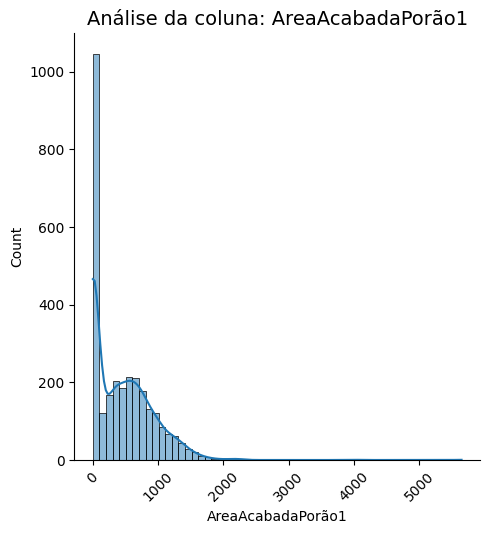

In [177]:
AnaliseColuna(bd , 'AreaAcabadaPorão1' , False)

In [178]:
bd.loc[(bd['AreaAcabadaPorão1'].isnull()) & (bd['TipoAcabamentoPorão1'] == 'SemPorao')]

Id  ClasseMS ZoneamentoMS  FrenteLote  AreaLote   Rua       Beco  \
2120  2121        20           RM        99.0      5940  Pave  SemAcesso   

     FormaLote ContornoTerreno Utilidades  ... AreaPiscina QualidadePiscina  \
2120       IR1             Lvl     AllPub  ...           0              NaN   

      Cerca RecursoDiverso ValorDiverso MesVenda AnoVenda  TipoVenda  \
2120  MnPrv            NaN            0        4     2008      ConLD   

      CondiçãoVenda  PreçoVenda  
2120        Abnorml         NaN  

[1 rows x 81 columns]

In [179]:
bd.AreaAcabadaPorão1.fillna(0.0, inplace=True)

C:\Users\Vitor\AppData\Local\Temp\ipykernel_9720\1922721212.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bd.AreaAcabadaPorão1.fillna(0.0, inplace=True)


In [180]:
df['AreaAcabadaPorão1'] = bd['AreaAcabadaPorão1']

Quantidade de valores únicos: 272

Quais são os valores únicos: [   0.   32.  668.  486.   93.  491.  506.  712.  362.   41.  169.  869.
  150.  670.   28. 1080.  181.  768.  215.  374.  208.  441.  184.  279.
  306.  180.  580.  690.  692.  228.  125. 1063.  620.  175.  820. 1474.
  264.  479.  147.  232.  380.  544.  294.  258.  121.  391.  531.  344.
  539.  713.  210.  311. 1120.  165.  532.   96.  495.  174. 1127.  139.
  202.  645.  123.  551.  219.  606.  612.  480.  182.  132.  336.  468.
  287.   35.  499.  723.  119.   40.  117.  239.   80.  472.   64. 1057.
  127.  630.  128.  377.  764.  345. 1085.  435.  823.  500.  290.  324.
  634.  411.  841. 1061.  466.  396.  354.  149.  193.  273.  465.  400.
  682.  557.  230.  106.  791.  240.  547.  469.  177.  108.  600.  492.
  211.  168. 1031.  438.  375.  144.   81.  906.  608.  276.  661.   68.
  173.  972.  105.  420.  546.  334.  352.  872.  110.  627.  163. 1029.
   78.  859.  981.   42.   46.  162.  350.  263. 1073.   12.

<Figure size 1000x600 with 0 Axes>

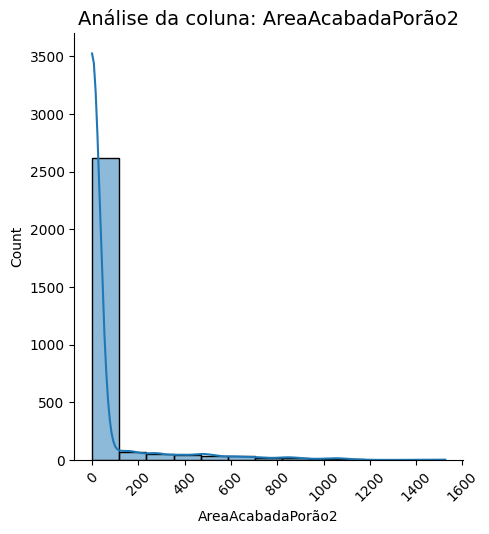

In [181]:
AnaliseColuna(bd , 'AreaAcabadaPorão2' , False)

In [182]:
bd.loc[(bd['AreaAcabadaPorão2'].isnull()) & (bd['TipoAcabamentoPorão1'] == 'SemPorao')]

Id  ClasseMS ZoneamentoMS  FrenteLote  AreaLote   Rua       Beco  \
2120  2121        20           RM        99.0      5940  Pave  SemAcesso   

     FormaLote ContornoTerreno Utilidades  ... AreaPiscina QualidadePiscina  \
2120       IR1             Lvl     AllPub  ...           0              NaN   

      Cerca RecursoDiverso ValorDiverso MesVenda AnoVenda  TipoVenda  \
2120  MnPrv            NaN            0        4     2008      ConLD   

      CondiçãoVenda  PreçoVenda  
2120        Abnorml         NaN  

[1 rows x 81 columns]

In [183]:
bd.AreaAcabadaPorão2.fillna(0.0, inplace=True)

C:\Users\Vitor\AppData\Local\Temp\ipykernel_9720\2788570708.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bd.AreaAcabadaPorão2.fillna(0.0, inplace=True)


In [184]:
df['AreaAcabadaPorão2'] = bd['AreaAcabadaPorão2']

Quantidade de valores únicos: 1135

Quais são os valores únicos: [ 150.  284.  434. ...  129.   45. 1503.]

Quantidade de valores nulos: 1

Quantidade por opção: 
AreaPorãoNaoAcabada
0.0       241
384.0      19
728.0      14
672.0      13
600.0      12
         ... 
257.0       1
1217.0      1
539.0       1
39.0        1
1503.0      1
Name: count, Length: 1135, dtype: int64


<Figure size 1000x600 with 0 Axes>

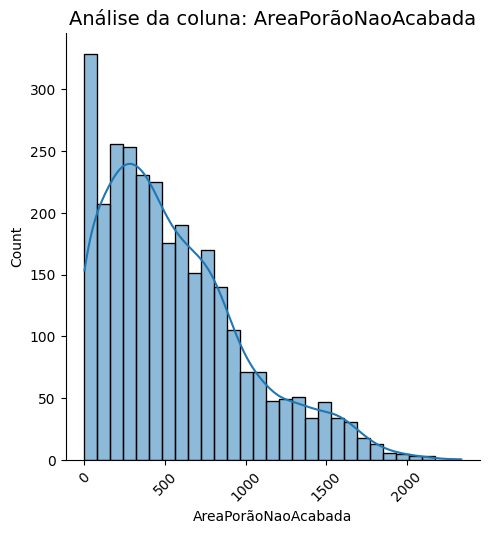

In [185]:
AnaliseColuna(bd , 'AreaPorãoNaoAcabada' , False)

In [186]:
bd.loc[(bd['AreaPorãoNaoAcabada'].isnull()) & (bd['TipoAcabamentoPorão1'] == 'SemPorao')]

Id  ClasseMS ZoneamentoMS  FrenteLote  AreaLote   Rua       Beco  \
2120  2121        20           RM        99.0      5940  Pave  SemAcesso   

     FormaLote ContornoTerreno Utilidades  ... AreaPiscina QualidadePiscina  \
2120       IR1             Lvl     AllPub  ...           0              NaN   

      Cerca RecursoDiverso ValorDiverso MesVenda AnoVenda  TipoVenda  \
2120  MnPrv            NaN            0        4     2008      ConLD   

      CondiçãoVenda  PreçoVenda  
2120        Abnorml         NaN  

[1 rows x 81 columns]

In [187]:
bd.AreaPorãoNaoAcabada.fillna(0.0, inplace=True)

C:\Users\Vitor\AppData\Local\Temp\ipykernel_9720\503433279.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bd.AreaPorãoNaoAcabada.fillna(0.0, inplace=True)


In [188]:
df['AreaPorãoNaoAcabada'] = bd['AreaPorãoNaoAcabada']

Quantidade de valores únicos: 1058

Quais são os valores únicos: [ 856. 1262.  920. ...  498.  432. 1381.]

Quantidade de valores nulos: 1

Quantidade por opção: 
AreaTotalPorão
0.0       78
864.0     74
672.0     29
912.0     26
1040.0    25
          ..
1571.0     1
2633.0     1
757.0      1
873.0      1
1381.0     1
Name: count, Length: 1058, dtype: int64


<Figure size 1000x600 with 0 Axes>

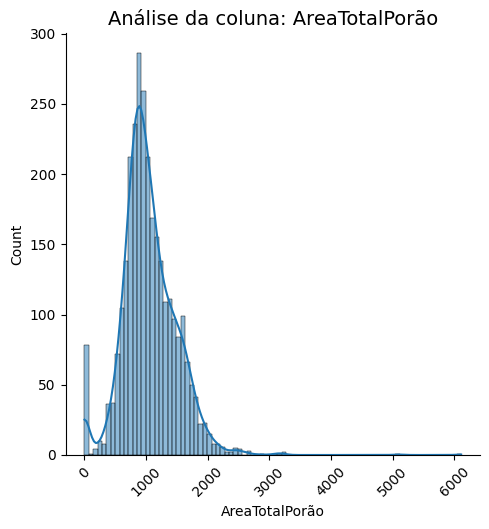

In [189]:
AnaliseColuna(bd , 'AreaTotalPorão' , False)

In [190]:
bd.loc[(bd['AreaTotalPorão'].isnull()) & (bd['TipoAcabamentoPorão1'] == 'SemPorao')]

Id  ClasseMS ZoneamentoMS  FrenteLote  AreaLote   Rua       Beco  \
2120  2121        20           RM        99.0      5940  Pave  SemAcesso   

     FormaLote ContornoTerreno Utilidades  ... AreaPiscina QualidadePiscina  \
2120       IR1             Lvl     AllPub  ...           0              NaN   

      Cerca RecursoDiverso ValorDiverso MesVenda AnoVenda  TipoVenda  \
2120  MnPrv            NaN            0        4     2008      ConLD   

      CondiçãoVenda  PreçoVenda  
2120        Abnorml         NaN  

[1 rows x 81 columns]

In [191]:
bd.AreaTotalPorão.fillna(0.0, inplace=True)

C:\Users\Vitor\AppData\Local\Temp\ipykernel_9720\478914684.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bd.AreaTotalPorão.fillna(0.0, inplace=True)


In [192]:
df['AreaTotalPorão'] = bd['AreaTotalPorão']

Quantidade de valores únicos: 4

Quais são os valores únicos: [ 1.  0.  2.  3. nan]

Quantidade de valores nulos: 2

Quantidade por opção: 
BanheiroCompletoPorão
0.0    1705
1.0    1172
2.0      38
3.0       2
Name: count, dtype: int64


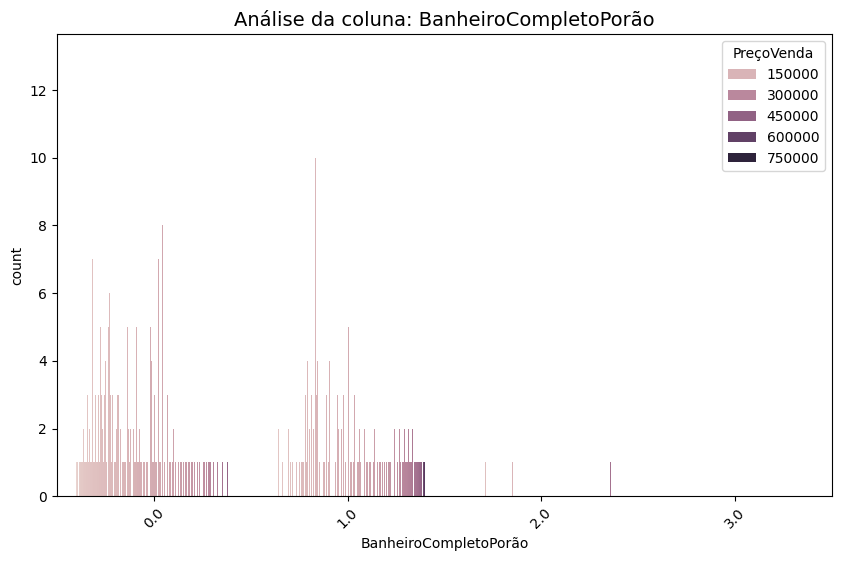

In [193]:
AnaliseColuna(bd , 'BanheiroCompletoPorão')

In [194]:
bd.loc[(bd['BanheiroCompletoPorão'].isnull()) & (bd['TipoAcabamentoPorão1'] == 'SemPorao')]

Id  ClasseMS ZoneamentoMS  FrenteLote  AreaLote   Rua       Beco  \
2120  2121        20           RM        99.0      5940  Pave  SemAcesso   
2188  2189        20           RL       123.0     47007  Pave  SemAcesso   

     FormaLote ContornoTerreno Utilidades  ... AreaPiscina QualidadePiscina  \
2120       IR1             Lvl     AllPub  ...           0              NaN   
2188       IR1             Lvl     AllPub  ...           0              NaN   

      Cerca RecursoDiverso ValorDiverso MesVenda AnoVenda  TipoVenda  \
2120  MnPrv            NaN            0        4     2008      ConLD   
2188    NaN            NaN            0        7     2008         WD   

      CondiçãoVenda  PreçoVenda  
2120        Abnorml         NaN  
2188         Normal         NaN  

[2 rows x 81 columns]

In [195]:
bd.BanheiroCompletoPorão.fillna(0.0, inplace=True)

C:\Users\Vitor\AppData\Local\Temp\ipykernel_9720\3549202518.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bd.BanheiroCompletoPorão.fillna(0.0, inplace=True)


In [196]:
df['BanheiroCompletoPorão'] = bd['BanheiroCompletoPorão']

Quantidade de valores únicos: 3

Quais são os valores únicos: [ 0.  1.  2. nan]

Quantidade de valores nulos: 2

Quantidade por opção: 
MeioBanheiroPorão
0.0    2742
1.0     171
2.0       4
Name: count, dtype: int64


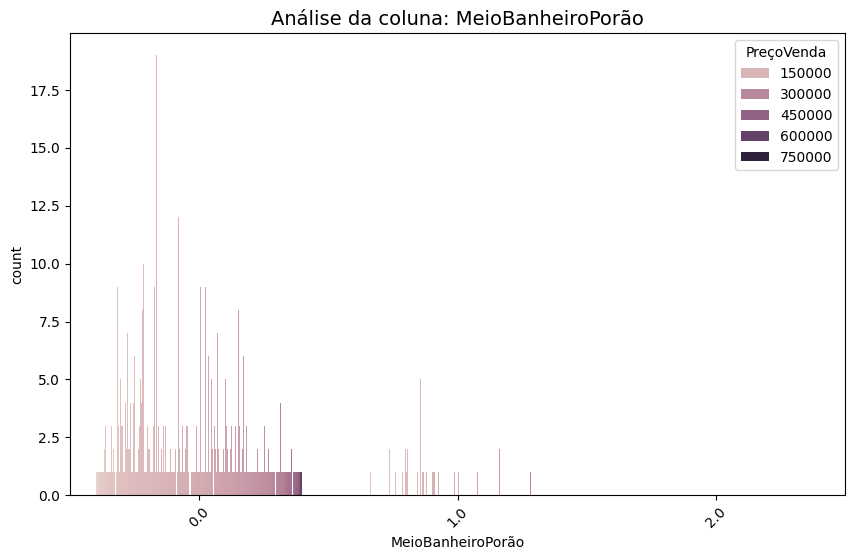

In [197]:
AnaliseColuna(bd , 'MeioBanheiroPorão')

In [198]:
bd.loc[(bd['MeioBanheiroPorão'].isnull()) & (bd['TipoAcabamentoPorão1'] == 'SemPorao')]

Id  ClasseMS ZoneamentoMS  FrenteLote  AreaLote   Rua       Beco  \
2120  2121        20           RM        99.0      5940  Pave  SemAcesso   
2188  2189        20           RL       123.0     47007  Pave  SemAcesso   

     FormaLote ContornoTerreno Utilidades  ... AreaPiscina QualidadePiscina  \
2120       IR1             Lvl     AllPub  ...           0              NaN   
2188       IR1             Lvl     AllPub  ...           0              NaN   

      Cerca RecursoDiverso ValorDiverso MesVenda AnoVenda  TipoVenda  \
2120  MnPrv            NaN            0        4     2008      ConLD   
2188    NaN            NaN            0        7     2008         WD   

      CondiçãoVenda  PreçoVenda  
2120        Abnorml         NaN  
2188         Normal         NaN  

[2 rows x 81 columns]

In [199]:
bd.MeioBanheiroPorão.fillna(0.0, inplace=True)

C:\Users\Vitor\AppData\Local\Temp\ipykernel_9720\2663350366.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bd.MeioBanheiroPorão.fillna(0.0, inplace=True)


In [200]:
df['MeioBanheiroPorão'] = bd['MeioBanheiroPorão']

Quantidade de valores únicos: 5

Quais são os valores únicos: ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]

Quantidade de valores nulos: 1

Quantidade por opção: 
InstalaçãoElétrica
SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: count, dtype: int64


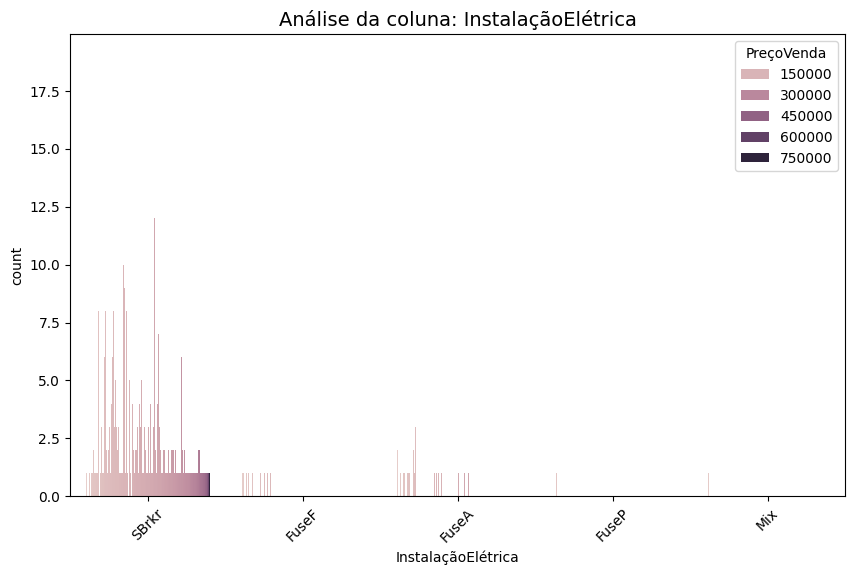

In [201]:
AnaliseColuna(bd , 'InstalaçãoElétrica')

In [202]:
bd[bd.InstalaçãoElétrica.isnull()]

Id  ClasseMS ZoneamentoMS  FrenteLote  AreaLote   Rua       Beco  \
1379  1380        80           RL        73.0      9735  Pave  SemAcesso   

     FormaLote ContornoTerreno Utilidades  ... AreaPiscina QualidadePiscina  \
1379       Reg             Lvl     AllPub  ...           0              NaN   

     Cerca RecursoDiverso ValorDiverso MesVenda AnoVenda  TipoVenda  \
1379   NaN            NaN            0        5     2008         WD   

      CondiçãoVenda  PreçoVenda  
1379         Normal    167500.0  

[1 rows x 81 columns]

In [203]:
bd.loc[bd['InstalaçãoElétrica'].isnull(), 'AnoConstrução']

1379    2006
Name: AnoConstrução, dtype: int64

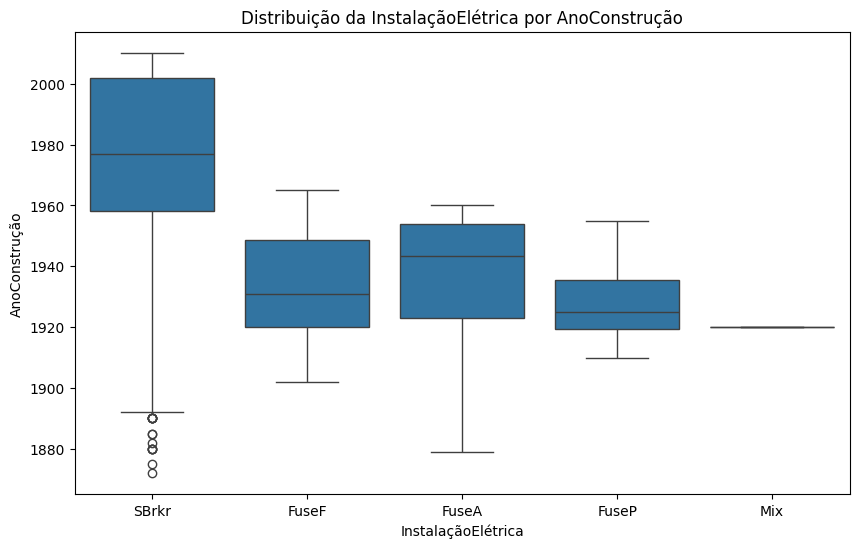

In [204]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='InstalaçãoElétrica', y='AnoConstrução', data=bd)
plt.title('Distribuição da InstalaçãoElétrica por AnoConstrução')
plt.xlabel('InstalaçãoElétrica')
plt.ylabel('AnoConstrução')
plt.show()

In [205]:
bd.InstalaçãoElétrica.fillna("SBrkr", inplace=True)

C:\Users\Vitor\AppData\Local\Temp\ipykernel_9720\2842413825.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bd.InstalaçãoElétrica.fillna("SBrkr", inplace=True)


In [206]:
df['InstalaçãoElétrica'] = bd['InstalaçãoElétrica']

Quantidade de valores únicos: 4

Quais são os valores únicos: ['Gd' 'TA' 'Ex' 'Fa' nan]

Quantidade de valores nulos: 1

Quantidade por opção: 
QualidadeCozinha
TA    1492
Gd    1151
Ex     205
Fa      70
Name: count, dtype: int64


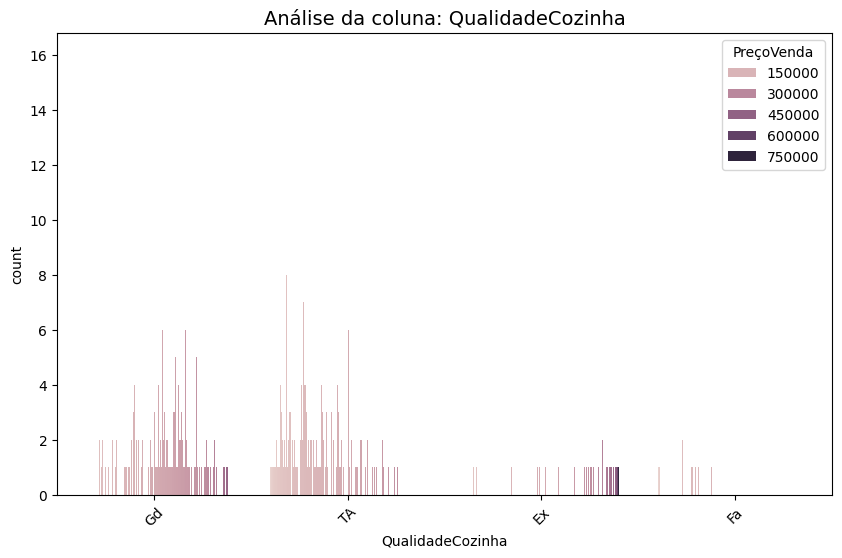

In [207]:
AnaliseColuna(bd , 'QualidadeCozinha')

In [208]:
bd[bd.QualidadeCozinha.isnull()]

Id  ClasseMS ZoneamentoMS  FrenteLote  AreaLote   Rua       Beco  \
1555  1556        50           RL        72.0     10632  Pave  SemAcesso   

     FormaLote ContornoTerreno Utilidades  ... AreaPiscina QualidadePiscina  \
1555       IR1             Lvl     AllPub  ...           0              NaN   

     Cerca RecursoDiverso ValorDiverso MesVenda AnoVenda  TipoVenda  \
1555   NaN            NaN            0        1     2010        COD   

      CondiçãoVenda  PreçoVenda  
1555         Normal         NaN  

[1 rows x 81 columns]

In [209]:
bd.loc[bd['QualidadeCozinha'].isnull(), 'QualidadeGeral']

1555    5
Name: QualidadeGeral, dtype: int64

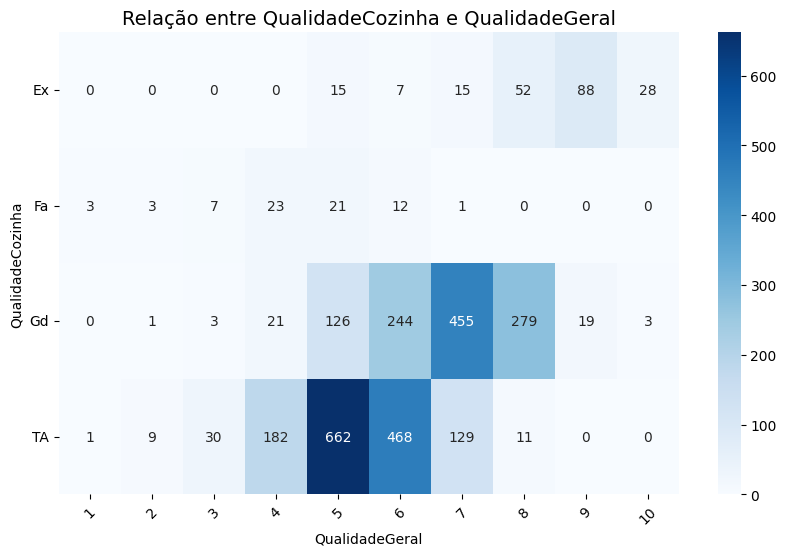

In [210]:
cross_tab = pd.crosstab(bd['QualidadeCozinha'], bd['QualidadeGeral'])

plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d')

plt.title('Relação entre QualidadeCozinha e QualidadeGeral', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [211]:
bd.loc[bd['QualidadeCozinha'].isnull(), 'Funcionalidade']

1555    Mod
Name: Funcionalidade, dtype: object

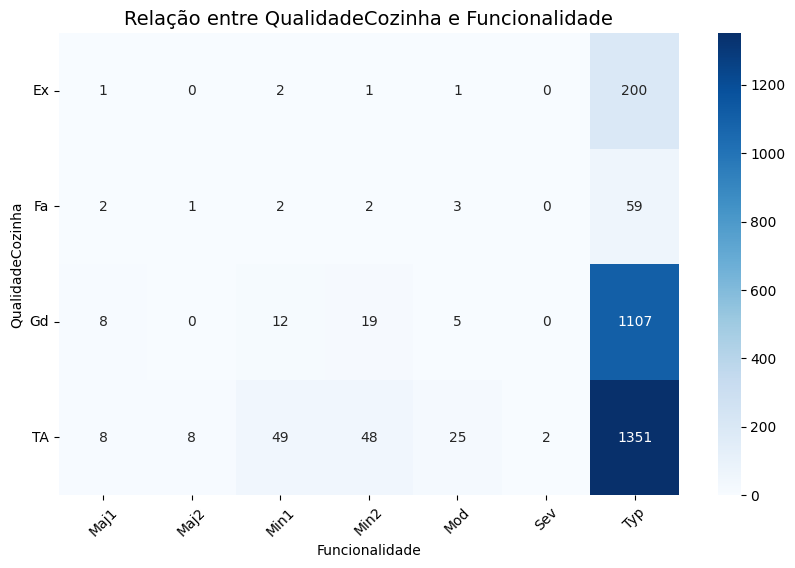

In [212]:
cross_tab = pd.crosstab(bd['QualidadeCozinha'], bd['Funcionalidade'])

plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d')

plt.title('Relação entre QualidadeCozinha e Funcionalidade', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [213]:
bd.QualidadeCozinha.fillna("TA", inplace=True)

C:\Users\Vitor\AppData\Local\Temp\ipykernel_9720\2136867501.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bd.QualidadeCozinha.fillna("TA", inplace=True)


In [214]:
df['QualidadeCozinha'] = bd['QualidadeCozinha']

Quantidade de valores únicos: 7

Quais são os valores únicos: ['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev' nan]

Quantidade de valores nulos: 2

Quantidade por opção: 
Funcionalidade
Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: count, dtype: int64


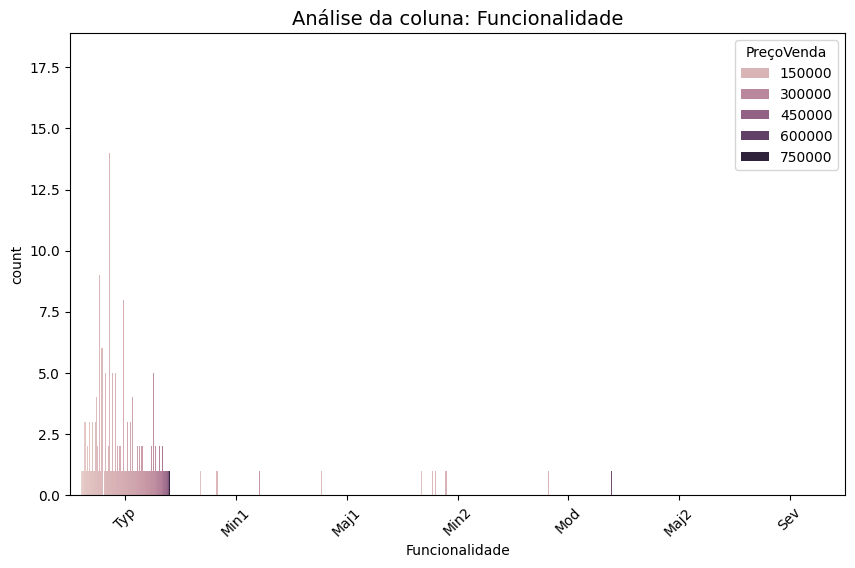

In [215]:
AnaliseColuna(bd , 'Funcionalidade')

In [216]:
bd[bd.Funcionalidade.isnull()]

Id  ClasseMS ZoneamentoMS  FrenteLote  AreaLote   Rua       Beco  \
2216  2217        20           RM        80.0     14584  Pave  SemAcesso   
2473  2474        50           RM        60.0     10320  Pave       Grvl   

     FormaLote ContornoTerreno Utilidades  ... AreaPiscina QualidadePiscina  \
2216       Reg             Low     AllPub  ...           0              NaN   
2473       Reg             Lvl     AllPub  ...           0              NaN   

     Cerca RecursoDiverso ValorDiverso MesVenda AnoVenda  TipoVenda  \
2216   NaN            NaN            0        2     2008         WD   
2473   NaN            NaN            0        9     2007        COD   

      CondiçãoVenda  PreçoVenda  
2216        Abnorml         NaN  
2473        Abnorml         NaN  

[2 rows x 81 columns]

In [217]:
bd.loc[bd['Funcionalidade'].isnull(), 'TotalComodosAcimaSolo']

2216    4
2473    6
Name: TotalComodosAcimaSolo, dtype: int64

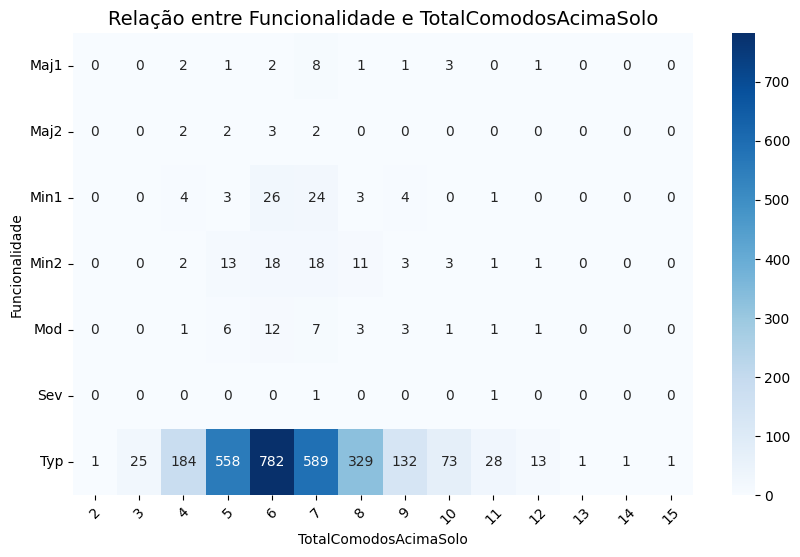

In [218]:
cross_tab = pd.crosstab(bd['Funcionalidade'], bd['TotalComodosAcimaSolo'])

plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d')

plt.title('Relação entre Funcionalidade e TotalComodosAcimaSolo', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [219]:
bd.loc[bd['Funcionalidade'].isnull(), 'CondiçãoGeral']

2216    5
2473    1
Name: CondiçãoGeral, dtype: int64

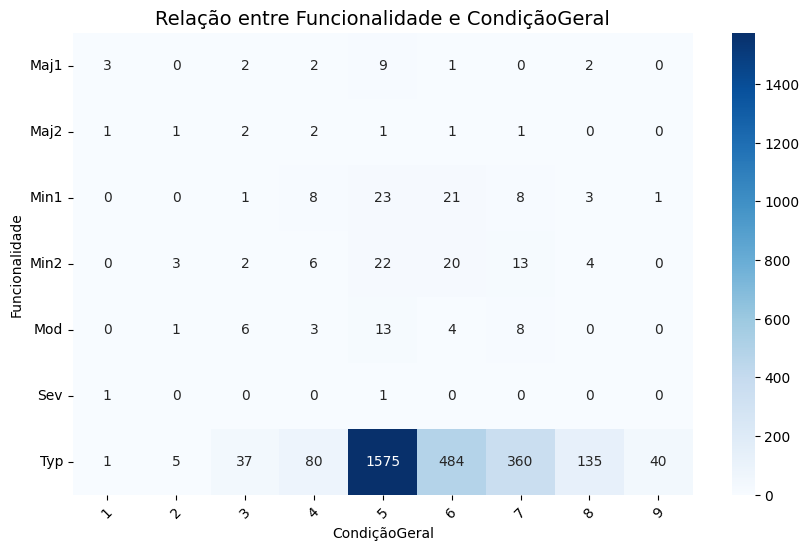

In [220]:
cross_tab = pd.crosstab(bd['Funcionalidade'], bd['CondiçãoGeral'])

plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d')

plt.title('Relação entre Funcionalidade e CondiçãoGeral', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [221]:
bd.loc[bd['Funcionalidade'].isnull(), 'QualidadeCozinha']

2216    Fa
2473    TA
Name: QualidadeCozinha, dtype: object

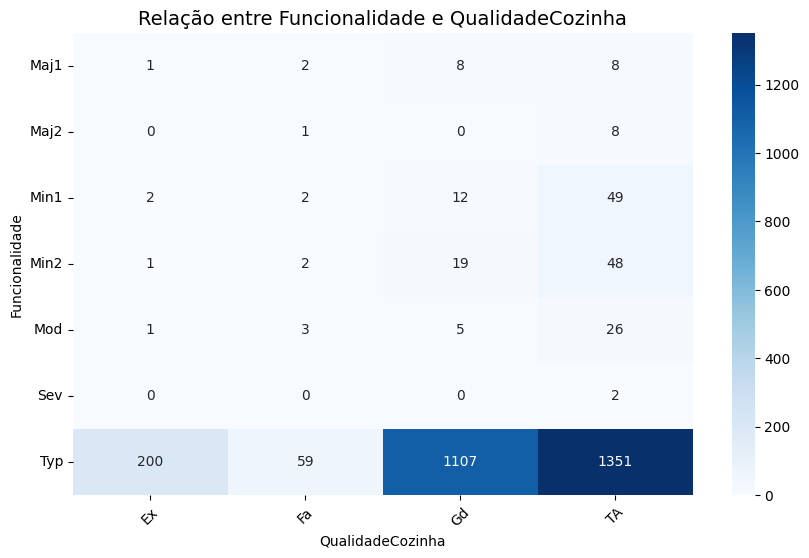

In [222]:
cross_tab = pd.crosstab(bd['Funcionalidade'], bd['QualidadeCozinha'])

plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d')

plt.title('Relação entre Funcionalidade e QualidadeCozinha', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [223]:
bd.loc[bd['Funcionalidade'].isnull(), 'QuartosAcimaSolo']

2216    2
2473    3
Name: QuartosAcimaSolo, dtype: int64

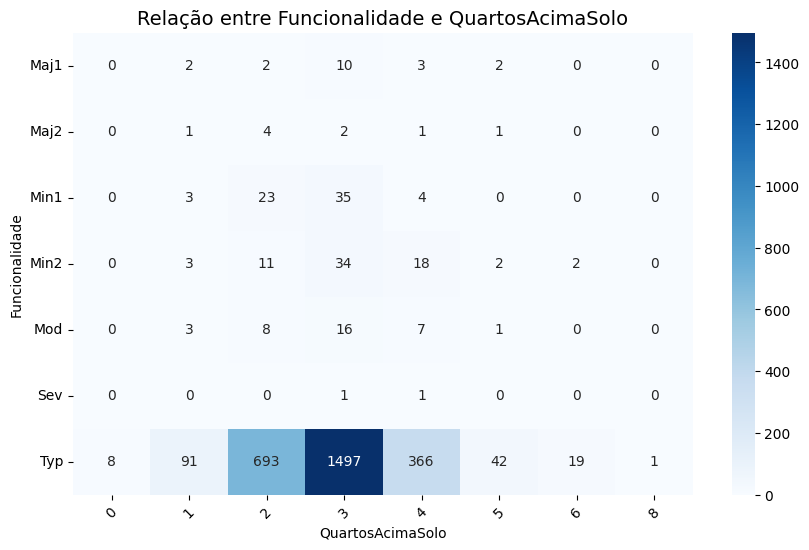

In [224]:
cross_tab = pd.crosstab(bd['Funcionalidade'], bd['QuartosAcimaSolo'])

plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d')

plt.title('Relação entre Funcionalidade e QuartosAcimaSolo', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [225]:
bd.loc[bd['Funcionalidade'].isnull(), 'BanheiroCompleto']

2216    1
2473    2
Name: BanheiroCompleto, dtype: int64

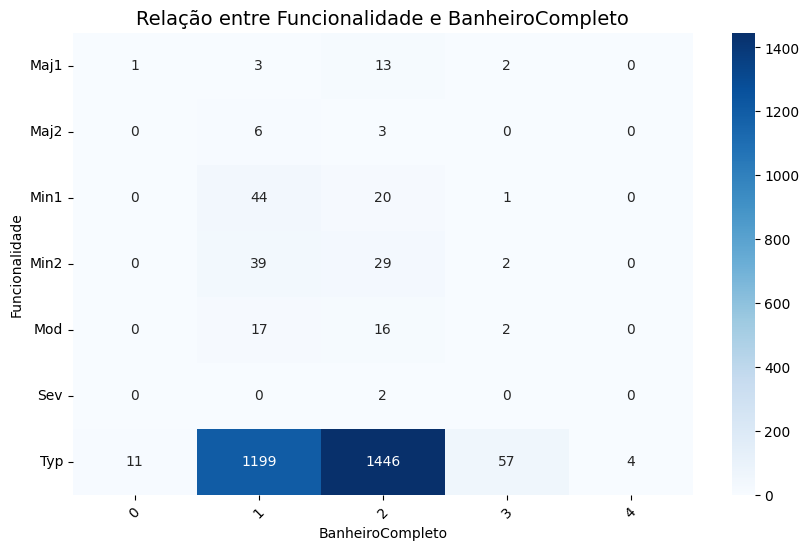

In [226]:
cross_tab = pd.crosstab(bd['Funcionalidade'], bd['BanheiroCompleto'])

plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d')

plt.title('Relação entre Funcionalidade e BanheiroCompleto', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [227]:
bd.Funcionalidade.fillna("Typ", inplace=True)

C:\Users\Vitor\AppData\Local\Temp\ipykernel_9720\4256551553.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bd.Funcionalidade.fillna("Typ", inplace=True)


In [228]:
df['Funcionalidade'] = bd['Funcionalidade']

Quantidade de valores únicos: 5

Quais são os valores únicos: [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']

Quantidade de valores nulos: 1420

Quantidade por opção: 
QualidadeLareira
Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: count, dtype: int64


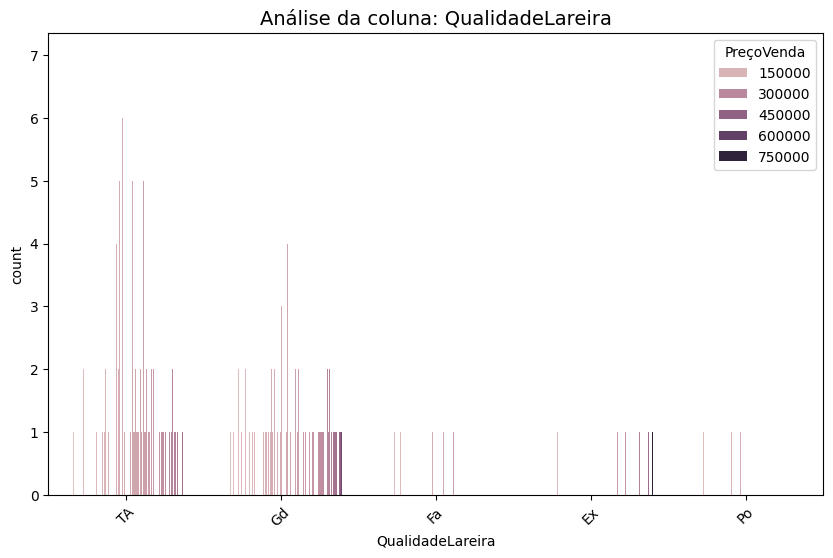

In [229]:
AnaliseColuna(bd , 'QualidadeLareira')

In [230]:
bd.QualidadeLareira.fillna("SemLareira", inplace=True)

C:\Users\Vitor\AppData\Local\Temp\ipykernel_9720\82943552.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bd.QualidadeLareira.fillna("SemLareira", inplace=True)


In [231]:
df['QualidadeLareira'] = bd['QualidadeLareira']

Quantidade de valores únicos: 6

Quais são os valores únicos: ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']

Quantidade de valores nulos: 157

Quantidade por opção: 
TipoGaragem
Attchd     1723
Detchd      779
BuiltIn     186
Basment      36
2Types       23
CarPort      15
Name: count, dtype: int64


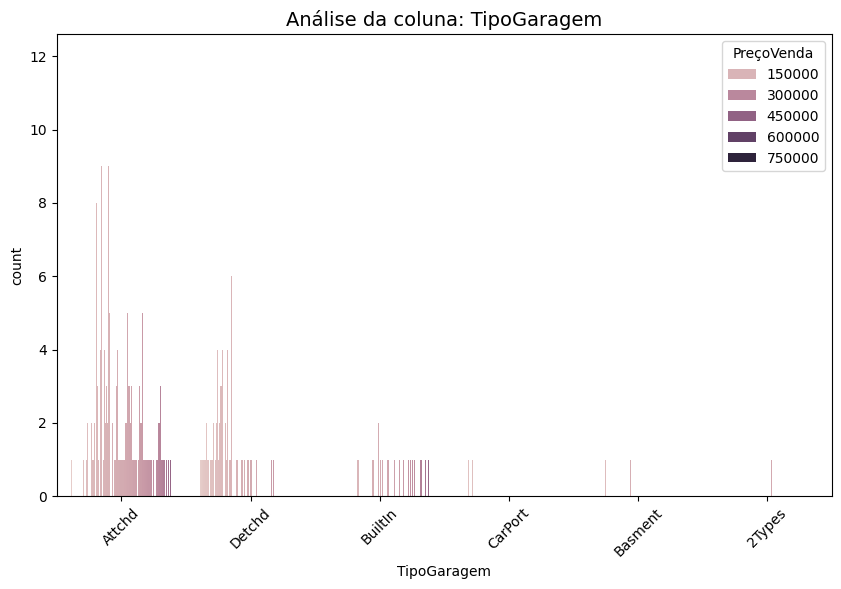

In [232]:
AnaliseColuna(bd , 'TipoGaragem')

In [233]:
bd.TipoGaragem.fillna("SemGaragem", inplace=True)

C:\Users\Vitor\AppData\Local\Temp\ipykernel_9720\3464579320.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bd.TipoGaragem.fillna("SemGaragem", inplace=True)


In [234]:
df['TipoGaragem'] = bd['TipoGaragem']

Quantidade de valores únicos: 103

Quais são os valores únicos: [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006. 1960. 1991. 1970. 1967. 1958. 1930. 2002. 1968. 2007. 2008.
 1957. 1920. 1966. 1959. 1995. 1954. 1953.   nan 1983. 1977. 1997. 1985.
 1963. 1981. 1964. 1999. 1935. 1990. 1945. 1987. 1989. 1915. 1956. 1948.
 1974. 2009. 1950. 1961. 1921. 1900. 1979. 1951. 1969. 1936. 1975. 1971.
 1923. 1984. 1926. 1955. 1986. 1988. 1916. 1932. 1972. 1918. 1980. 1924.
 1996. 1940. 1949. 1994. 1910. 1978. 1982. 1992. 1925. 1941. 2010. 1927.
 1947. 1937. 1942. 1938. 1952. 1928. 1922. 1934. 1906. 1914. 1946. 1908.
 1929. 1933. 1917. 1896. 1895. 2207. 1943. 1919.]

Quantidade de valores nulos: 159

Quantidade por opção: 
AnoConstruçãoGaragem
2005.0    142
2006.0    115
2007.0    115
2004.0     99
2003.0     92
         ... 
1908.0      1
1896.0      1
1933.0      1
1906.0      1
1919.0      1
Name: count, Length: 103, dtype: int64


<Figure size 1000x600 with 0 Axes>

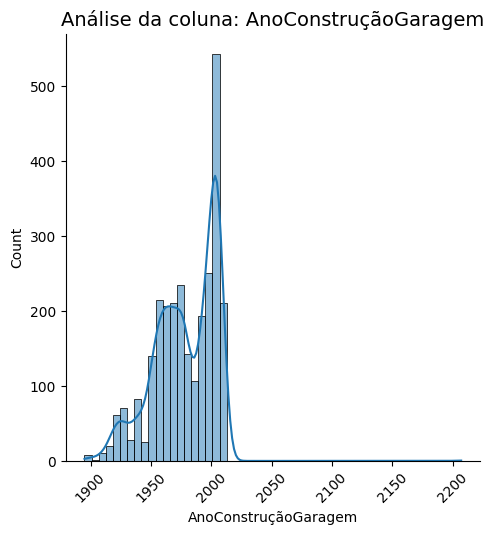

In [235]:
AnaliseColuna(bd , 'AnoConstruçãoGaragem' , False)

In [236]:
bd.loc[(bd['AnoConstruçãoGaragem'].isnull()) & (bd['TipoGaragem'] == 'SemGaragem')]

Id  ClasseMS ZoneamentoMS  FrenteLote  AreaLote   Rua       Beco  \
39      40        90           RL        65.0      6040  Pave  SemAcesso   
48      49       190           RM        33.0      4456  Pave  SemAcesso   
78      79        90           RL        72.0     10778  Pave  SemAcesso   
88      89        50      C (all)       105.0      8470  Pave  SemAcesso   
89      90        20           RL        60.0      8070  Pave  SemAcesso   
...    ...       ...          ...         ...       ...   ...        ...   
2893  2894        50      C (all)        60.0      8520  Grvl  SemAcesso   
2909  2910       180           RM        21.0      1470  Pave  SemAcesso   
2913  2914       160           RM        21.0      1526  Pave  SemAcesso   
2914  2915       160           RM        21.0      1936  Pave  SemAcesso   
2917  2918        85           RL        62.0     10441  Pave  SemAcesso   

     FormaLote ContornoTerreno Utilidades  ... AreaPiscina QualidadePiscina  \
39         Reg             Lvl     AllPub  ...           0              NaN   
48         Reg             Lvl     AllPub  ...           0              NaN   
78         Reg             Lvl     AllPub  ...           0              NaN   
88         IR1             Lvl     AllPub  ...           0              NaN   
89         Reg             Lvl     AllPub  ...           0              NaN   
...        ...             ...        ...  ...         ...              ...   
2893       Reg             Bnk     AllPub  ...           0              NaN   
2909       Reg             Lvl     AllPub  ...           0              NaN   
2913       Reg             Lvl     AllPub  ...           0              NaN   
2914       Reg             Lvl     AllPub  ...           0              NaN   
2917       Reg             Lvl     AllPub  ...           0              NaN   

      Cerca RecursoDiverso ValorDiverso MesVenda AnoVenda  TipoVenda  \
39      NaN            NaN            0        6     2008         WD   
48      NaN            NaN            0        6     2009        New   
78      NaN            NaN            0        4     2010         WD   
88    MnPrv            NaN            0       10     2009      ConLD   
89      NaN            NaN            0        8     2007         WD   
...     ...            ...          ...      ...      ...        ...   
2893    NaN            NaN            0        4     2006         WD   
2909    NaN            NaN            0        4     2006         WD   
2913  GdPrv            NaN            0        6     2006         WD   
2914    NaN            NaN            0        6     2006         WD   
2917  MnPrv           Shed          700        7     2006         WD   

      CondiçãoVenda  PreçoVenda  
39          AdjLand     82000.0  
48          Partial    113000.0  
78           Normal    136500.0  
88          Abnorml     85000.0  
89           Normal    123600.0  
...             ...         ...  
2893         Normal         NaN  
2909         Normal         NaN  
2913         Normal         NaN  
2914         Normal         NaN  
2917         Normal         NaN  

[157 rows x 81 columns]

In [237]:
bd.loc[(bd['AnoConstruçãoGaragem'].isnull())]

Id  ClasseMS ZoneamentoMS  FrenteLote  AreaLote   Rua       Beco  \
39      40        90           RL        65.0      6040  Pave  SemAcesso   
48      49       190           RM        33.0      4456  Pave  SemAcesso   
78      79        90           RL        72.0     10778  Pave  SemAcesso   
88      89        50      C (all)       105.0      8470  Pave  SemAcesso   
89      90        20           RL        60.0      8070  Pave  SemAcesso   
...    ...       ...          ...         ...       ...   ...        ...   
2893  2894        50      C (all)        60.0      8520  Grvl  SemAcesso   
2909  2910       180           RM        21.0      1470  Pave  SemAcesso   
2913  2914       160           RM        21.0      1526  Pave  SemAcesso   
2914  2915       160           RM        21.0      1936  Pave  SemAcesso   
2917  2918        85           RL        62.0     10441  Pave  SemAcesso   

     FormaLote ContornoTerreno Utilidades  ... AreaPiscina QualidadePiscina  \
39         Reg             Lvl     AllPub  ...           0              NaN   
48         Reg             Lvl     AllPub  ...           0              NaN   
78         Reg             Lvl     AllPub  ...           0              NaN   
88         IR1             Lvl     AllPub  ...           0              NaN   
89         Reg             Lvl     AllPub  ...           0              NaN   
...        ...             ...        ...  ...         ...              ...   
2893       Reg             Bnk     AllPub  ...           0              NaN   
2909       Reg             Lvl     AllPub  ...           0              NaN   
2913       Reg             Lvl     AllPub  ...           0              NaN   
2914       Reg             Lvl     AllPub  ...           0              NaN   
2917       Reg             Lvl     AllPub  ...           0              NaN   

      Cerca RecursoDiverso ValorDiverso MesVenda AnoVenda  TipoVenda  \
39      NaN            NaN            0        6     2008         WD   
48      NaN            NaN            0        6     2009        New   
78      NaN            NaN            0        4     2010         WD   
88    MnPrv            NaN            0       10     2009      ConLD   
89      NaN            NaN            0        8     2007         WD   
...     ...            ...          ...      ...      ...        ...   
2893    NaN            NaN            0        4     2006         WD   
2909    NaN            NaN            0        4     2006         WD   
2913  GdPrv            NaN            0        6     2006         WD   
2914    NaN            NaN            0        6     2006         WD   
2917  MnPrv           Shed          700        7     2006         WD   

      CondiçãoVenda  PreçoVenda  
39          AdjLand     82000.0  
48          Partial    113000.0  
78           Normal    136500.0  
88          Abnorml     85000.0  
89           Normal    123600.0  
...             ...         ...  
2893         Normal         NaN  
2909         Normal         NaN  
2913         Normal         NaN  
2914         Normal         NaN  
2917         Normal         NaN  

[159 rows x 81 columns]

In [238]:
bd.loc[bd['AnoConstruçãoGaragem'].isnull(), 'AnoConstrução']

39      1955
48      1920
78      1968
88      1915
89      1994
        ... 
2893    1916
2909    1970
2913    1970
2914    1970
2917    1992
Name: AnoConstrução, Length: 159, dtype: int64

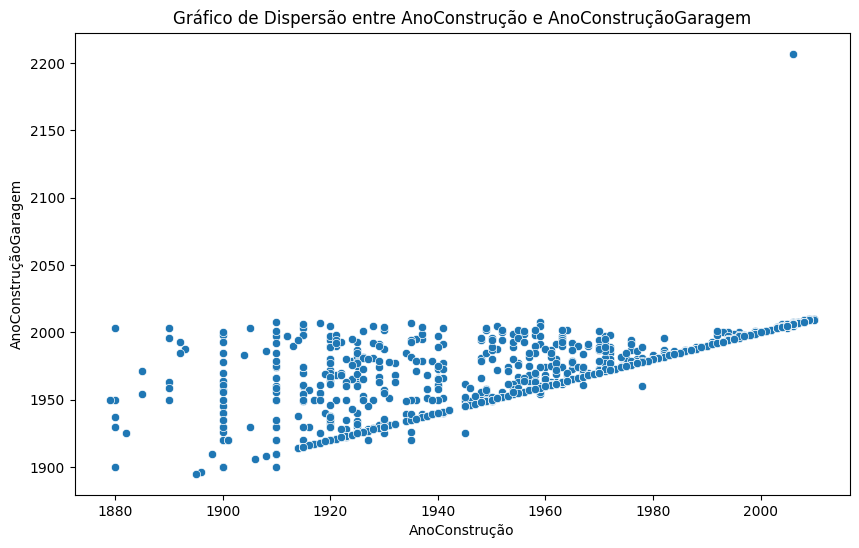

In [239]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AnoConstrução', y='AnoConstruçãoGaragem', data=bd)
plt.title('Gráfico de Dispersão entre AnoConstrução e AnoConstruçãoGaragem')
plt.xlabel('AnoConstrução')
plt.ylabel('AnoConstruçãoGaragem')
plt.show()

In [240]:
bd.loc[bd['AnoConstruçãoGaragem'].isnull(), 'AnoReforma']

39      1955
48      2008
78      1968
88      1982
89      1995
        ... 
2893    1950
2909    1970
2913    1970
2914    1970
2917    1992
Name: AnoReforma, Length: 159, dtype: int64

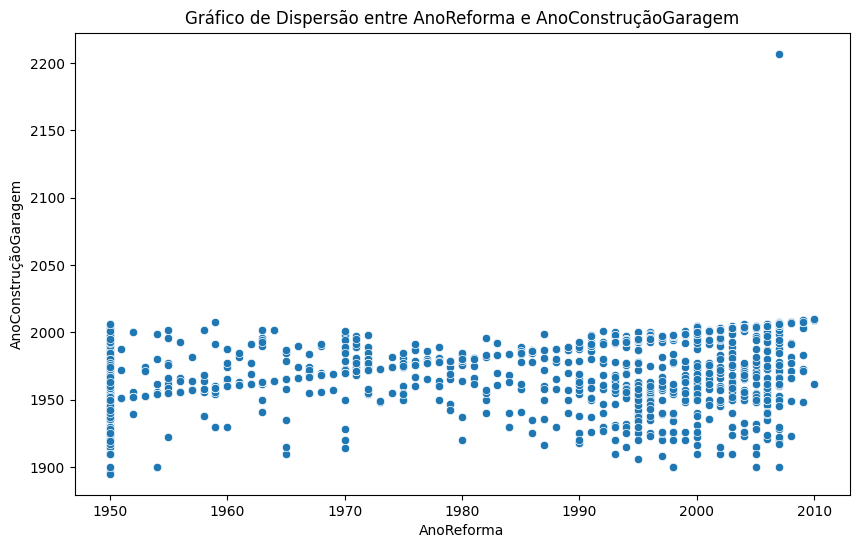

In [241]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AnoReforma', y='AnoConstruçãoGaragem', data=bd)
plt.title('Gráfico de Dispersão entre AnoReforma e AnoConstruçãoGaragem')
plt.xlabel('AnoReforma')
plt.ylabel('AnoConstruçãoGaragem')
plt.show()

In [242]:
bd.loc[(bd['AnoConstruçãoGaragem'].isnull()) & (bd['TipoGaragem'] == 'SemGaragem'), 'AnoConstruçãoGaragem']  = 'SemGaragem'

C:\Users\Vitor\AppData\Local\Temp\ipykernel_9720\2202329928.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'SemGaragem' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  bd.loc[(bd['AnoConstruçãoGaragem'].isnull()) & (bd['TipoGaragem'] == 'SemGaragem'), 'AnoConstruçãoGaragem']  = 'SemGaragem'


In [243]:
bd['AnoConstruçãoGaragem'].isnull().sum()

2

In [244]:
for nome in sorted(bd['AnoConstrução'].unique()):
    for i in bd.index:
        if pd.isnull(bd['AnoConstruçãoGaragem'][i]):
            if bd['AnoConstrução'][1] == nome:
                bd['AnoConstruçãoGaragem'][i] = round(bd[bd['AnoConstrução'] == nome ]['AnoConstruçãoGaragem'].mean())
        else:
            continue    

C:\Users\Vitor\AppData\Local\Temp\ipykernel_9720\1895143846.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  bd['AnoConstruçãoGaragem'][i] = round(bd[bd['AnoConstrução'] == nome ]['AnoConstruçãoGaragem'].mean())
C:\Users\Vitor\AppData\Loc

In [245]:
bd['AnoConstruçãoGaragem'].isnull().sum()

0

Quantidade de valores únicos: 3

Quais são os valores únicos: ['RFn' 'Unf' 'Fin' nan]

Quantidade de valores nulos: 159

Quantidade por opção: 
AcabamentoGaragem
Unf    1230
RFn     811
Fin     719
Name: count, dtype: int64


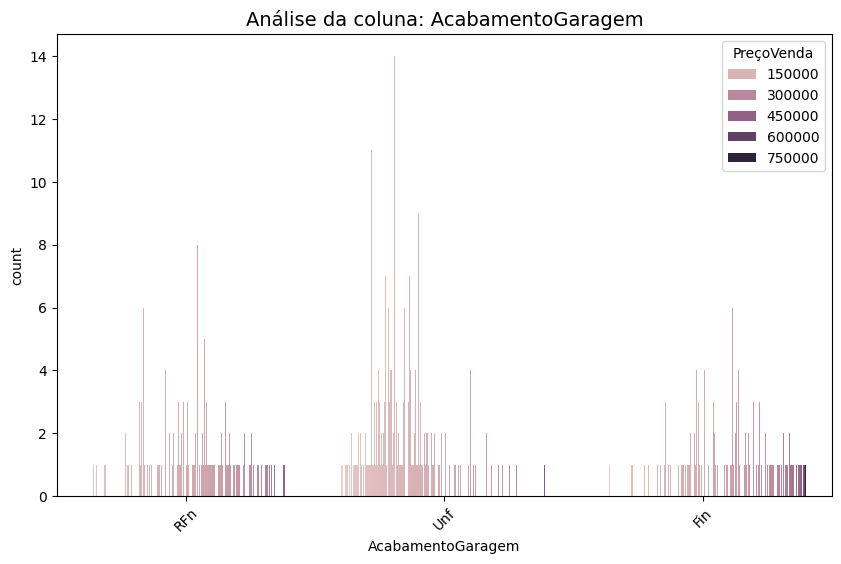

In [246]:
AnaliseColuna(bd , 'AcabamentoGaragem')

In [247]:
bd.loc[(bd['AcabamentoGaragem'].isnull()) & (bd['TipoGaragem'] == 'SemGaragem')]

Id  ClasseMS ZoneamentoMS  FrenteLote  AreaLote   Rua       Beco  \
39      40        90           RL        65.0      6040  Pave  SemAcesso   
48      49       190           RM        33.0      4456  Pave  SemAcesso   
78      79        90           RL        72.0     10778  Pave  SemAcesso   
88      89        50      C (all)       105.0      8470  Pave  SemAcesso   
89      90        20           RL        60.0      8070  Pave  SemAcesso   
...    ...       ...          ...         ...       ...   ...        ...   
2893  2894        50      C (all)        60.0      8520  Grvl  SemAcesso   
2909  2910       180           RM        21.0      1470  Pave  SemAcesso   
2913  2914       160           RM        21.0      1526  Pave  SemAcesso   
2914  2915       160           RM        21.0      1936  Pave  SemAcesso   
2917  2918        85           RL        62.0     10441  Pave  SemAcesso   

     FormaLote ContornoTerreno Utilidades  ... AreaPiscina QualidadePiscina  \
39         Reg             Lvl     AllPub  ...           0              NaN   
48         Reg             Lvl     AllPub  ...           0              NaN   
78         Reg             Lvl     AllPub  ...           0              NaN   
88         IR1             Lvl     AllPub  ...           0              NaN   
89         Reg             Lvl     AllPub  ...           0              NaN   
...        ...             ...        ...  ...         ...              ...   
2893       Reg             Bnk     AllPub  ...           0              NaN   
2909       Reg             Lvl     AllPub  ...           0              NaN   
2913       Reg             Lvl     AllPub  ...           0              NaN   
2914       Reg             Lvl     AllPub  ...           0              NaN   
2917       Reg             Lvl     AllPub  ...           0              NaN   

      Cerca RecursoDiverso ValorDiverso MesVenda AnoVenda  TipoVenda  \
39      NaN            NaN            0        6     2008         WD   
48      NaN            NaN            0        6     2009        New   
78      NaN            NaN            0        4     2010         WD   
88    MnPrv            NaN            0       10     2009      ConLD   
89      NaN            NaN            0        8     2007         WD   
...     ...            ...          ...      ...      ...        ...   
2893    NaN            NaN            0        4     2006         WD   
2909    NaN            NaN            0        4     2006         WD   
2913  GdPrv            NaN            0        6     2006         WD   
2914    NaN            NaN            0        6     2006         WD   
2917  MnPrv           Shed          700        7     2006         WD   

      CondiçãoVenda  PreçoVenda  
39          AdjLand     82000.0  
48          Partial    113000.0  
78           Normal    136500.0  
88          Abnorml     85000.0  
89           Normal    123600.0  
...             ...         ...  
2893         Normal         NaN  
2909         Normal         NaN  
2913         Normal         NaN  
2914         Normal         NaN  
2917         Normal         NaN  

[157 rows x 81 columns]

In [248]:
bd.loc[(bd['AcabamentoGaragem'].isnull()) & (bd['TipoGaragem'] == 'SemGaragem'), 'AcabamentoGaragem']  = 'SemGaragem'

In [249]:
bd['AcabamentoGaragem'].isnull().sum()

2

In [250]:
bd.loc[(bd['AcabamentoGaragem'].isnull())]

Id  ClasseMS ZoneamentoMS  FrenteLote  AreaLote   Rua       Beco  \
2126  2127        60           RM        57.0      8094  Pave       Grvl   
2576  2577        70           RM        50.0      9060  Pave  SemAcesso   

     FormaLote ContornoTerreno Utilidades  ... AreaPiscina QualidadePiscina  \
2126       Reg             Lvl     AllPub  ...           0              NaN   
2576       Reg             Lvl     AllPub  ...           0              NaN   

      Cerca RecursoDiverso ValorDiverso MesVenda AnoVenda  TipoVenda  \
2126  MnPrv           Shed         1000        9     2008         WD   
2576  MnPrv            NaN            0        3     2007         WD   

      CondiçãoVenda  PreçoVenda  
2126         Normal         NaN  
2576         Alloca         NaN  

[2 rows x 81 columns]

In [251]:
bd.loc[bd['AcabamentoGaragem'].isnull(), 'TipoGaragem']

2126    Detchd
2576    Detchd
Name: TipoGaragem, dtype: object

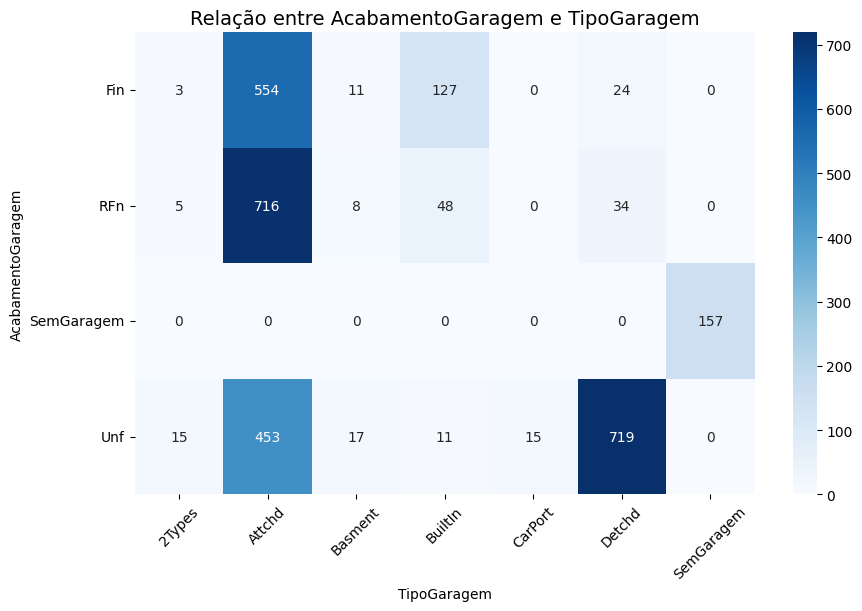

In [252]:
cross_tab = pd.crosstab(bd['AcabamentoGaragem'], bd['TipoGaragem'])

plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d')

plt.title('Relação entre AcabamentoGaragem e TipoGaragem', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [253]:
bd.AcabamentoGaragem.fillna("Unf", inplace=True)

C:\Users\Vitor\AppData\Local\Temp\ipykernel_9720\2401232081.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bd.AcabamentoGaragem.fillna("Unf", inplace=True)


In [254]:
bd['AcabamentoGaragem'].isnull().sum()

0

In [255]:
df['AcabamentoGaragem'] = bd['AcabamentoGaragem']

Quantidade de valores únicos: 6

Quais são os valores únicos: [ 2.  3.  1.  0.  4.  5. nan]

Quantidade de valores nulos: 1

Quantidade por opção: 
VagasGaragem
2.0    1594
1.0     776
3.0     374
0.0     157
4.0      16
5.0       1
Name: count, dtype: int64


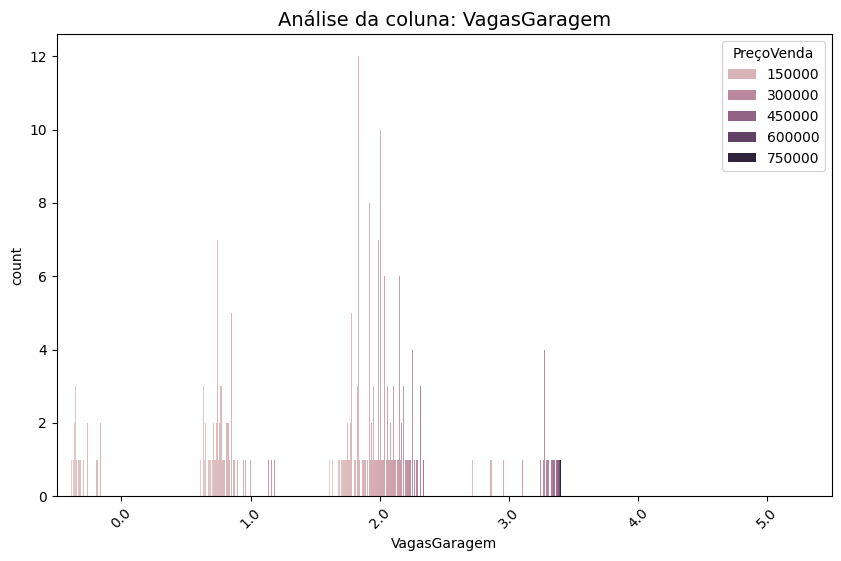

In [256]:
AnaliseColuna(bd , 'VagasGaragem')

In [257]:
bd[bd.VagasGaragem.isnull()]

Id  ClasseMS ZoneamentoMS  FrenteLote  AreaLote   Rua       Beco  \
2576  2577        70           RM        50.0      9060  Pave  SemAcesso   

     FormaLote ContornoTerreno Utilidades  ... AreaPiscina QualidadePiscina  \
2576       Reg             Lvl     AllPub  ...           0              NaN   

      Cerca RecursoDiverso ValorDiverso MesVenda AnoVenda  TipoVenda  \
2576  MnPrv            NaN            0        3     2007         WD   

      CondiçãoVenda  PreçoVenda  
2576         Alloca         NaN  

[1 rows x 81 columns]

In [258]:
bd.loc[bd['VagasGaragem'].isnull(), 'TipoGaragem']

2576    Detchd
Name: TipoGaragem, dtype: object

In [259]:
bd.loc[bd['VagasGaragem'].isnull(), 'AreaGaragem']

2576   NaN
Name: AreaGaragem, dtype: float64

In [260]:
bd.loc[bd['VagasGaragem'].isnull(), 'QualidadeGaragem']

2576    NaN
Name: QualidadeGaragem, dtype: object

In [261]:
bd.loc[bd['VagasGaragem'].isnull(), 'AcabamentoGaragem']  

2576    Unf
Name: AcabamentoGaragem, dtype: object

In [262]:
bd.loc[bd['VagasGaragem'].isnull(), 'CondiçãoGaragem'] 

2576    NaN
Name: CondiçãoGaragem, dtype: object

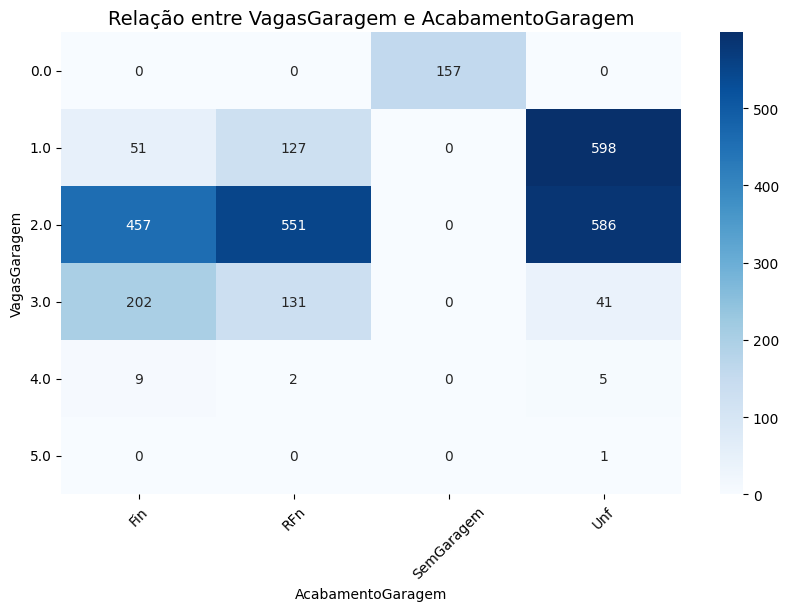

In [263]:
cross_tab = pd.crosstab(bd['VagasGaragem'], bd['AcabamentoGaragem'])

plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d')

plt.title('Relação entre VagasGaragem e AcabamentoGaragem', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

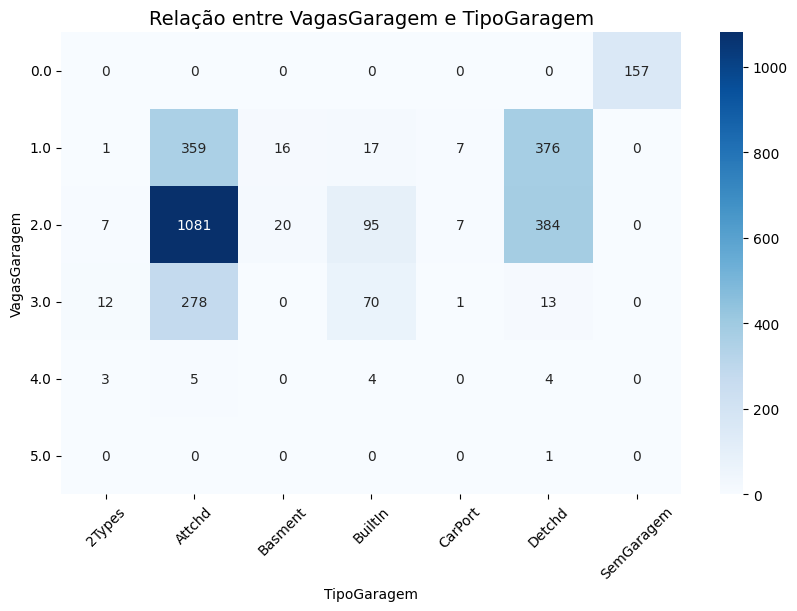

In [264]:
cross_tab = pd.crosstab(bd['VagasGaragem'], bd['TipoGaragem'])

plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d')

plt.title('Relação entre VagasGaragem e TipoGaragem', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

Quantidade de valores únicos: 603

Quais são os valores únicos: [ 548.  460.  608.  642.  836.  480.  636.  484.  468.  205.  384.  736.
  352.  840.  576.  516.  294.  853.  280.  534.  572.  270.  890.  772.
  319.  240.  250.  271.  447.  556.  691.  672.  498.  246.    0.  440.
  308.  504.  300.  670.  826.  386.  388.  528.  894.  565.  641.  288.
  645.  852.  558.  220.  667.  360.  427.  490.  379.  297.  283.  509.
  405.  758.  461.  400.  462.  420.  432.  506.  684.  472.  366.  476.
  410.  740.  648.  273.  546.  325.  792.  450.  180.  430.  594.  390.
  540.  264.  530.  435.  453.  750.  487.  624.  471.  318.  766.  660.
  470.  720.  577.  380.  434.  866.  495.  564.  312.  625.  680.  678.
  726.  532.  216.  303.  789.  511.  616.  521.  451. 1166.  252.  497.
  682.  666.  786.  795.  856.  473.  398.  500.  349.  454.  644.  299.
  210.  431.  438.  675.  968.  721.  336.  810.  494.  457.  818.  463.
  604.  389.  538.  520.  309.  429.  673.  884.  868.  492.

<Figure size 1000x600 with 0 Axes>

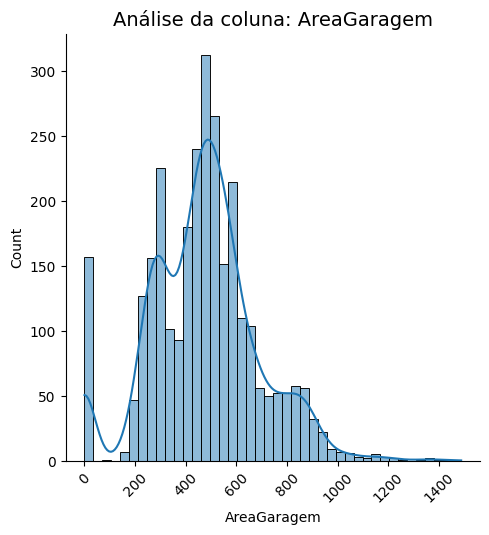

In [265]:
AnaliseColuna(bd , 'AreaGaragem' , False)

In [266]:
bd[bd.AreaGaragem.isnull()]

Id  ClasseMS ZoneamentoMS  FrenteLote  AreaLote   Rua       Beco  \
2576  2577        70           RM        50.0      9060  Pave  SemAcesso   

     FormaLote ContornoTerreno Utilidades  ... AreaPiscina QualidadePiscina  \
2576       Reg             Lvl     AllPub  ...           0              NaN   

      Cerca RecursoDiverso ValorDiverso MesVenda AnoVenda  TipoVenda  \
2576  MnPrv            NaN            0        3     2007         WD   

      CondiçãoVenda  PreçoVenda  
2576         Alloca         NaN  

[1 rows x 81 columns]

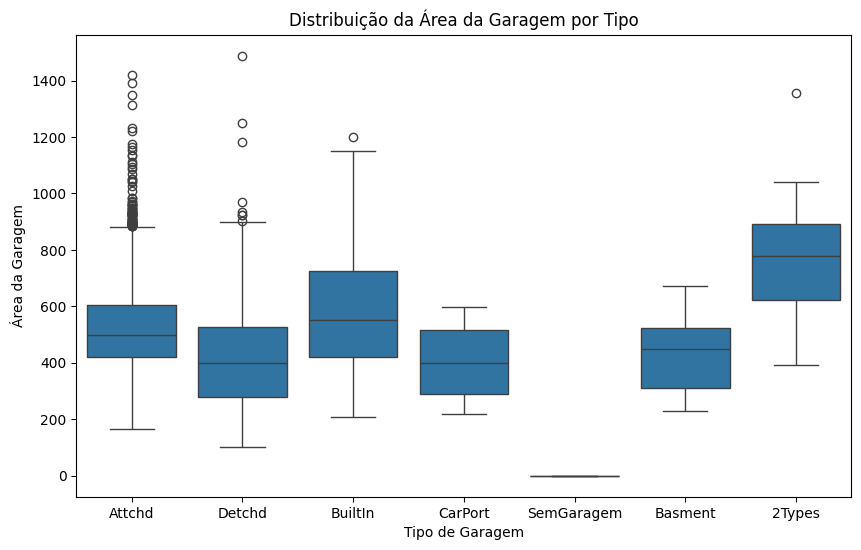

In [267]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='TipoGaragem', y='AreaGaragem', data=bd)
plt.title('Distribuição da Área da Garagem por Tipo')
plt.xlabel('Tipo de Garagem')
plt.ylabel('Área da Garagem')
plt.show()

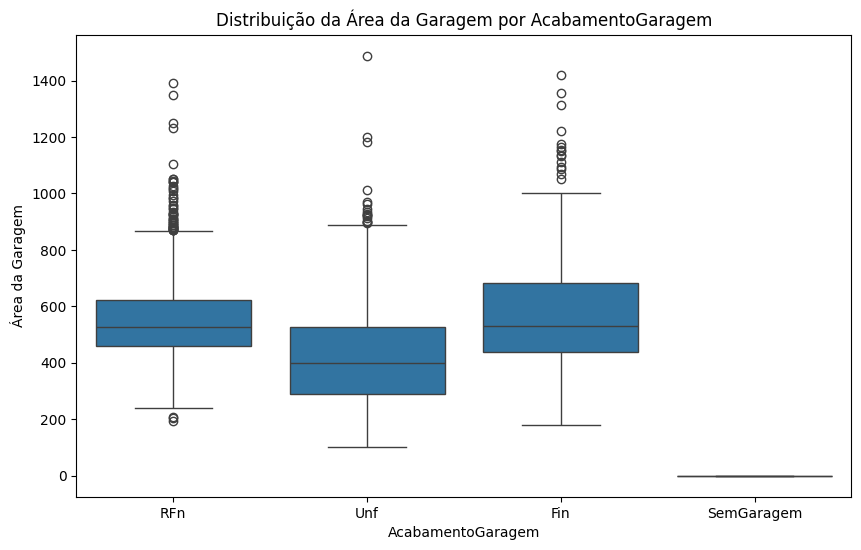

In [268]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='AcabamentoGaragem', y='AreaGaragem', data=bd)
plt.title('Distribuição da Área da Garagem por AcabamentoGaragem')
plt.xlabel('AcabamentoGaragem')
plt.ylabel('Área da Garagem')
plt.show()

Quantidade de valores únicos: 5

Quais são os valores únicos: ['TA' 'Fa' 'Gd' nan 'Ex' 'Po']

Quantidade de valores nulos: 159

Quantidade por opção: 
QualidadeGaragem
TA    2604
Fa     124
Gd      24
Po       5
Ex       3
Name: count, dtype: int64


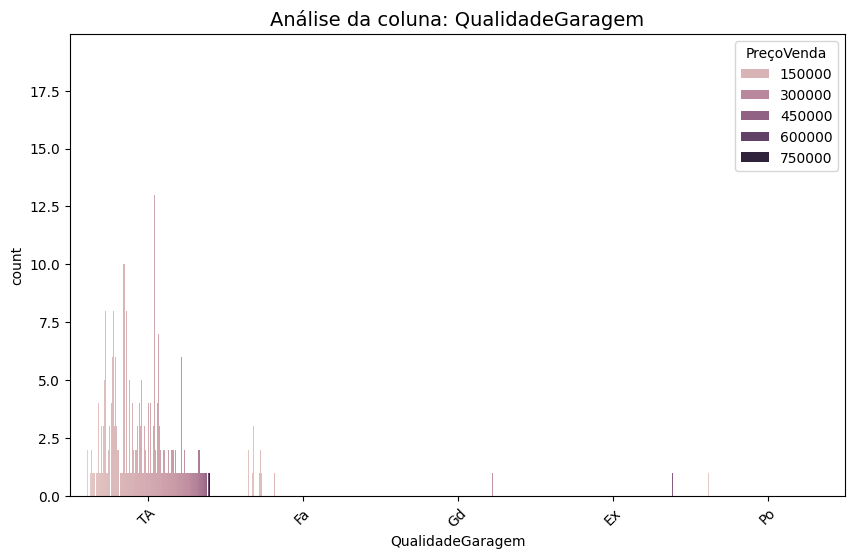

In [269]:
AnaliseColuna(bd, 'QualidadeGaragem')

In [270]:
bd.loc[(bd['QualidadeGaragem'].isnull()) & (bd['TipoGaragem'] == 'SemGaragem')] 

Id  ClasseMS ZoneamentoMS  FrenteLote  AreaLote   Rua       Beco  \
39      40        90           RL        65.0      6040  Pave  SemAcesso   
48      49       190           RM        33.0      4456  Pave  SemAcesso   
78      79        90           RL        72.0     10778  Pave  SemAcesso   
88      89        50      C (all)       105.0      8470  Pave  SemAcesso   
89      90        20           RL        60.0      8070  Pave  SemAcesso   
...    ...       ...          ...         ...       ...   ...        ...   
2893  2894        50      C (all)        60.0      8520  Grvl  SemAcesso   
2909  2910       180           RM        21.0      1470  Pave  SemAcesso   
2913  2914       160           RM        21.0      1526  Pave  SemAcesso   
2914  2915       160           RM        21.0      1936  Pave  SemAcesso   
2917  2918        85           RL        62.0     10441  Pave  SemAcesso   

     FormaLote ContornoTerreno Utilidades  ... AreaPiscina QualidadePiscina  \
39         Reg             Lvl     AllPub  ...           0              NaN   
48         Reg             Lvl     AllPub  ...           0              NaN   
78         Reg             Lvl     AllPub  ...           0              NaN   
88         IR1             Lvl     AllPub  ...           0              NaN   
89         Reg             Lvl     AllPub  ...           0              NaN   
...        ...             ...        ...  ...         ...              ...   
2893       Reg             Bnk     AllPub  ...           0              NaN   
2909       Reg             Lvl     AllPub  ...           0              NaN   
2913       Reg             Lvl     AllPub  ...           0              NaN   
2914       Reg             Lvl     AllPub  ...           0              NaN   
2917       Reg             Lvl     AllPub  ...           0              NaN   

      Cerca RecursoDiverso ValorDiverso MesVenda AnoVenda  TipoVenda  \
39      NaN            NaN            0        6     2008         WD   
48      NaN            NaN            0        6     2009        New   
78      NaN            NaN            0        4     2010         WD   
88    MnPrv            NaN            0       10     2009      ConLD   
89      NaN            NaN            0        8     2007         WD   
...     ...            ...          ...      ...      ...        ...   
2893    NaN            NaN            0        4     2006         WD   
2909    NaN            NaN            0        4     2006         WD   
2913  GdPrv            NaN            0        6     2006         WD   
2914    NaN            NaN            0        6     2006         WD   
2917  MnPrv           Shed          700        7     2006         WD   

      CondiçãoVenda  PreçoVenda  
39          AdjLand     82000.0  
48          Partial    113000.0  
78           Normal    136500.0  
88          Abnorml     85000.0  
89           Normal    123600.0  
...             ...         ...  
2893         Normal         NaN  
2909         Normal         NaN  
2913         Normal         NaN  
2914         Normal         NaN  
2917         Normal         NaN  

[157 rows x 81 columns]

In [271]:
bd.loc[(bd['QualidadeGaragem'].isnull()) & (bd['TipoGaragem'] == 'SemGaragem'), 'QualidadeGaragem']  = 'SemGaragem'

In [272]:
bd.loc[bd['QualidadeGaragem'].isnull(), 'AcabamentoGaragem']  

2126    Unf
2576    Unf
Name: AcabamentoGaragem, dtype: object

In [273]:
bd.loc[bd['QualidadeGaragem'].isnull(), 'TipoGaragem']  

2126    Detchd
2576    Detchd
Name: TipoGaragem, dtype: object

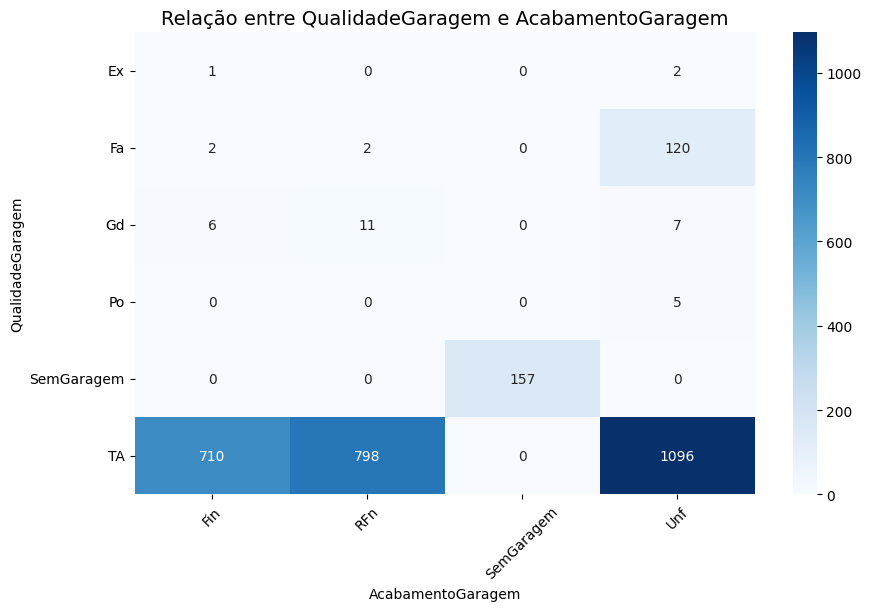

In [274]:
cross_tab = pd.crosstab(bd['QualidadeGaragem'], bd['AcabamentoGaragem'])

plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d')

plt.title('Relação entre QualidadeGaragem e AcabamentoGaragem', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

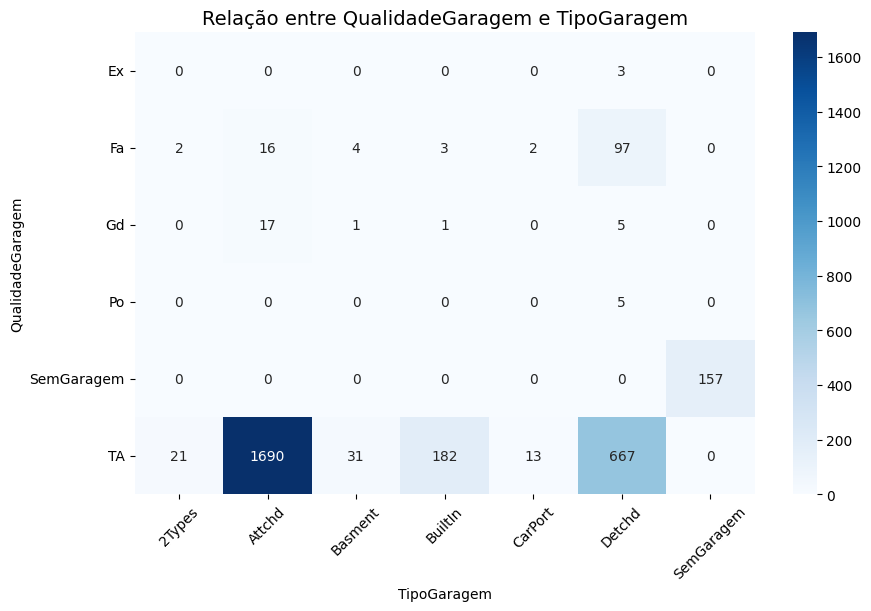

In [275]:
cross_tab = pd.crosstab(bd['QualidadeGaragem'], bd['TipoGaragem'])

plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d')

plt.title('Relação entre QualidadeGaragem e TipoGaragem', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [276]:
bd.QualidadeGaragem.fillna("TA", inplace=True)

C:\Users\Vitor\AppData\Local\Temp\ipykernel_9720\1504399815.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bd.QualidadeGaragem.fillna("TA", inplace=True)


In [277]:
df['QualidadeGaragem'] = bd['QualidadeGaragem']

Quantidade de valores únicos: 5

Quais são os valores únicos: ['TA' 'Fa' nan 'Gd' 'Po' 'Ex']

Quantidade de valores nulos: 159

Quantidade por opção: 
CondiçãoGaragem
TA    2654
Fa      74
Gd      15
Po      14
Ex       3
Name: count, dtype: int64


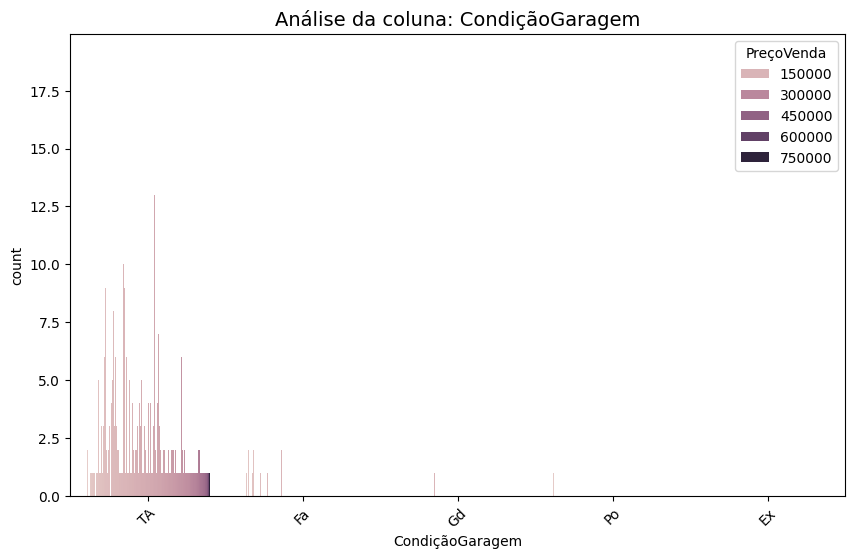

In [278]:
AnaliseColuna(bd , 'CondiçãoGaragem')

In [279]:
bd.loc[(bd['CondiçãoGaragem'].isnull()) & (bd['TipoGaragem'] == 'SemGaragem')] 

Id  ClasseMS ZoneamentoMS  FrenteLote  AreaLote   Rua       Beco  \
39      40        90           RL        65.0      6040  Pave  SemAcesso   
48      49       190           RM        33.0      4456  Pave  SemAcesso   
78      79        90           RL        72.0     10778  Pave  SemAcesso   
88      89        50      C (all)       105.0      8470  Pave  SemAcesso   
89      90        20           RL        60.0      8070  Pave  SemAcesso   
...    ...       ...          ...         ...       ...   ...        ...   
2893  2894        50      C (all)        60.0      8520  Grvl  SemAcesso   
2909  2910       180           RM        21.0      1470  Pave  SemAcesso   
2913  2914       160           RM        21.0      1526  Pave  SemAcesso   
2914  2915       160           RM        21.0      1936  Pave  SemAcesso   
2917  2918        85           RL        62.0     10441  Pave  SemAcesso   

     FormaLote ContornoTerreno Utilidades  ... AreaPiscina QualidadePiscina  \
39         Reg             Lvl     AllPub  ...           0              NaN   
48         Reg             Lvl     AllPub  ...           0              NaN   
78         Reg             Lvl     AllPub  ...           0              NaN   
88         IR1             Lvl     AllPub  ...           0              NaN   
89         Reg             Lvl     AllPub  ...           0              NaN   
...        ...             ...        ...  ...         ...              ...   
2893       Reg             Bnk     AllPub  ...           0              NaN   
2909       Reg             Lvl     AllPub  ...           0              NaN   
2913       Reg             Lvl     AllPub  ...           0              NaN   
2914       Reg             Lvl     AllPub  ...           0              NaN   
2917       Reg             Lvl     AllPub  ...           0              NaN   

      Cerca RecursoDiverso ValorDiverso MesVenda AnoVenda  TipoVenda  \
39      NaN            NaN            0        6     2008         WD   
48      NaN            NaN            0        6     2009        New   
78      NaN            NaN            0        4     2010         WD   
88    MnPrv            NaN            0       10     2009      ConLD   
89      NaN            NaN            0        8     2007         WD   
...     ...            ...          ...      ...      ...        ...   
2893    NaN            NaN            0        4     2006         WD   
2909    NaN            NaN            0        4     2006         WD   
2913  GdPrv            NaN            0        6     2006         WD   
2914    NaN            NaN            0        6     2006         WD   
2917  MnPrv           Shed          700        7     2006         WD   

      CondiçãoVenda  PreçoVenda  
39          AdjLand     82000.0  
48          Partial    113000.0  
78           Normal    136500.0  
88          Abnorml     85000.0  
89           Normal    123600.0  
...             ...         ...  
2893         Normal         NaN  
2909         Normal         NaN  
2913         Normal         NaN  
2914         Normal         NaN  
2917         Normal         NaN  

[157 rows x 81 columns]

In [280]:
bd.loc[(bd['CondiçãoGaragem'].isnull()) & (bd['TipoGaragem'] == 'SemGaragem'), 'CondiçãoGaragem']  = 'SemGaragem'

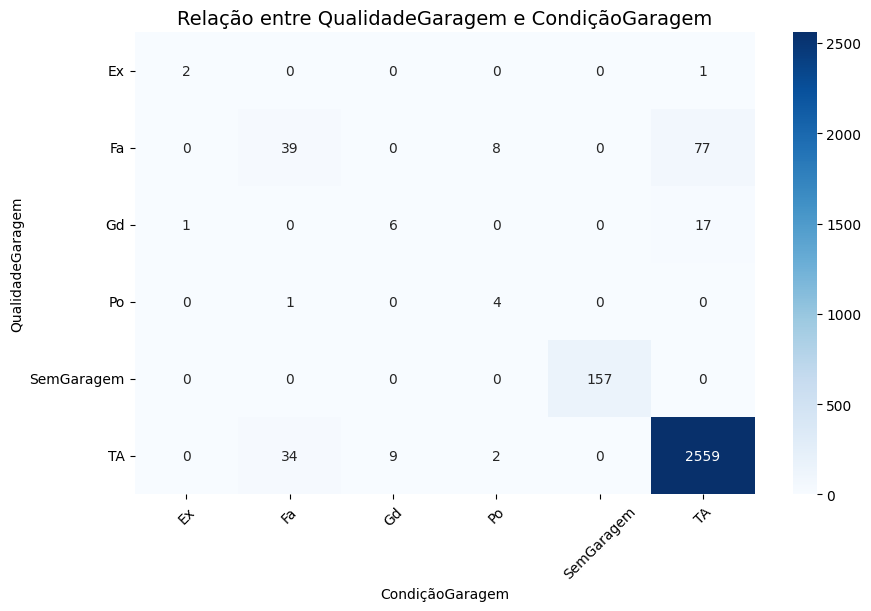

In [281]:
cross_tab = pd.crosstab(bd['QualidadeGaragem'], bd['CondiçãoGaragem'])

plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d')

plt.title('Relação entre QualidadeGaragem e CondiçãoGaragem', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [282]:
bd.CondiçãoGaragem.fillna("TA", inplace=True)

C:\Users\Vitor\AppData\Local\Temp\ipykernel_9720\124630324.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bd.CondiçãoGaragem.fillna("TA", inplace=True)


In [283]:
df['CondiçãoGaragem'] = bd['CondiçãoGaragem']

In [284]:
dadosNulos(bd)

 DADOS NULOS: 

VagasGaragem = 1
AreaGaragem = 1
QualidadePiscina = 2909
Cerca = 2348
RecursoDiverso = 2814
TipoVenda = 1
PreçoVenda = 1459


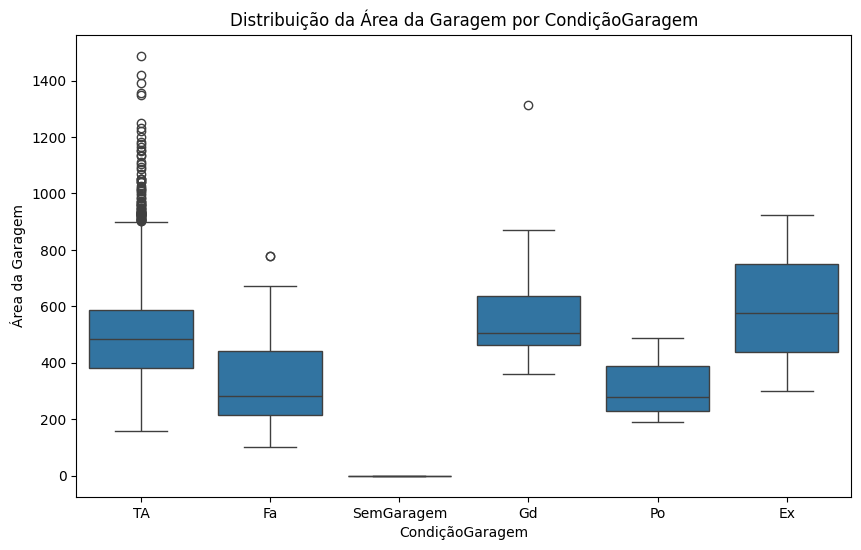

In [285]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='CondiçãoGaragem', y='AreaGaragem', data=bd)
plt.title('Distribuição da Área da Garagem por CondiçãoGaragem')
plt.xlabel('CondiçãoGaragem')
plt.ylabel('Área da Garagem')
plt.show()

In [286]:
mediana = round(bd[bd['CondiçãoGaragem'] == 'TA']['AreaGaragem'].median())
print(mediana)

bd.loc[(bd['AreaGaragem'].isnull()) & (bd['CondiçãoGaragem'] == 'TA'), 'AreaGaragem'] = mediana

484


In [287]:
bd['AreaGaragem'].isnull().sum()

0

In [288]:
df['AreaGaragem'] = bd['AreaGaragem']

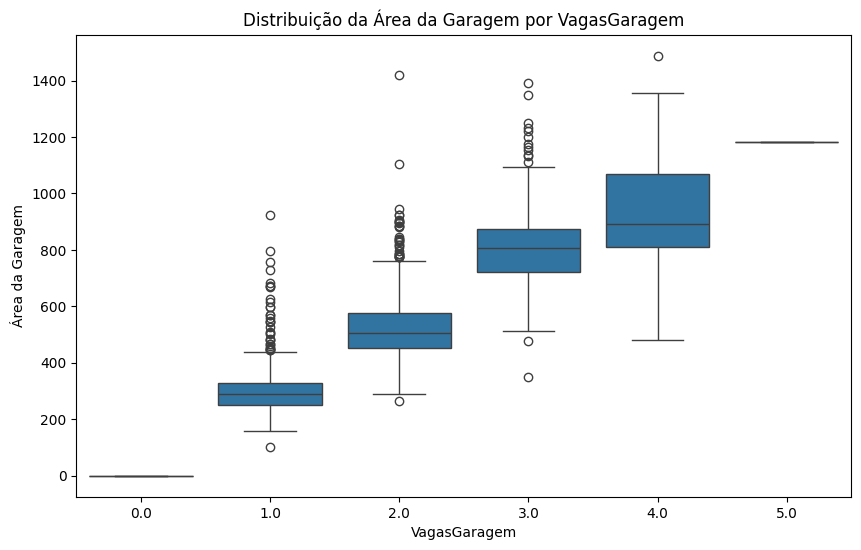

In [289]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='VagasGaragem', y='AreaGaragem', data=bd)
plt.title('Distribuição da Área da Garagem por VagasGaragem')
plt.xlabel('VagasGaragem')
plt.ylabel('Área da Garagem')
plt.show()

In [290]:
bd.VagasGaragem.fillna(2.0, inplace=True)

C:\Users\Vitor\AppData\Local\Temp\ipykernel_9720\477416716.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bd.VagasGaragem.fillna(2.0, inplace=True)


In [291]:
df['VagasGaragem'] = bd['VagasGaragem']

Quantidade de valores únicos: 3

Quais são os valores únicos: [nan 'Ex' 'Fa' 'Gd']

Quantidade de valores nulos: 2909

Quantidade por opção: 
QualidadePiscina
Ex    4
Gd    4
Fa    2
Name: count, dtype: int64


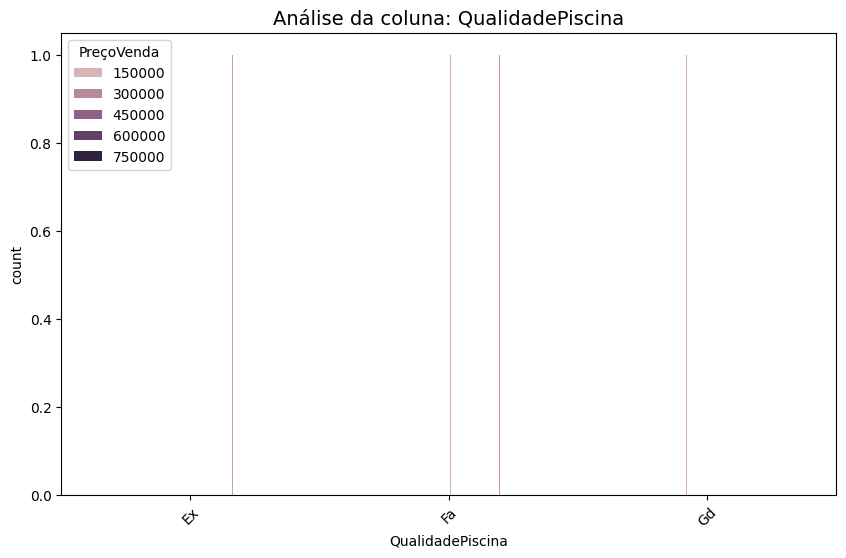

In [292]:
AnaliseColuna(bd , 'QualidadePiscina')

In [293]:
bd.QualidadePiscina.fillna("SemPiscina", inplace=True)

C:\Users\Vitor\AppData\Local\Temp\ipykernel_9720\2633726636.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bd.QualidadePiscina.fillna("SemPiscina", inplace=True)


In [294]:
df['QualidadePiscina'] = bd['QualidadePiscina']

Quantidade de valores únicos: 4

Quais são os valores únicos: [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']

Quantidade de valores nulos: 2348

Quantidade por opção: 
Cerca
MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: count, dtype: int64


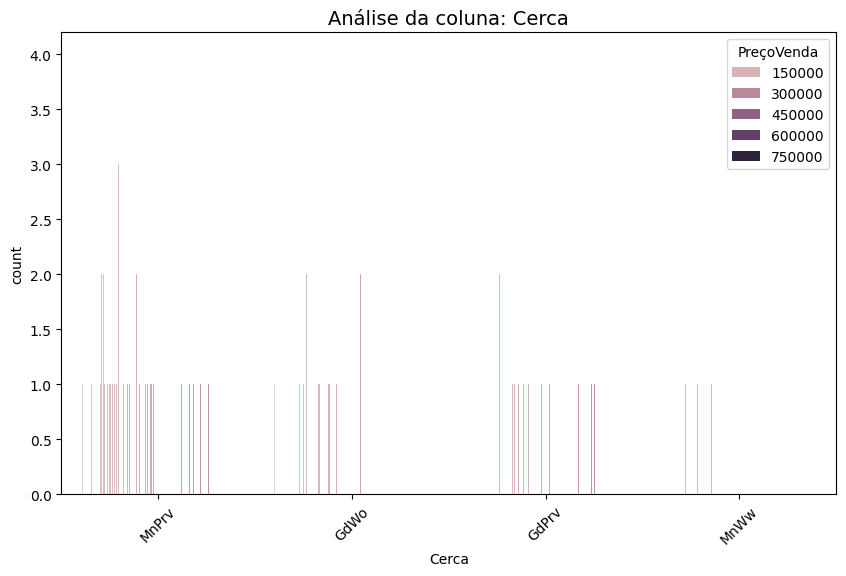

In [295]:
AnaliseColuna(bd , 'Cerca')

In [296]:
bd.Cerca.fillna("SemCerca", inplace=True)

C:\Users\Vitor\AppData\Local\Temp\ipykernel_9720\4189451039.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bd.Cerca.fillna("SemCerca", inplace=True)


In [297]:
df['Cerca'] = bd['Cerca']

Quantidade de valores únicos: 4

Quais são os valores únicos: [nan 'Shed' 'Gar2' 'Othr' 'TenC']

Quantidade de valores nulos: 2814

Quantidade por opção: 
RecursoDiverso
Shed    95
Gar2     5
Othr     4
TenC     1
Name: count, dtype: int64


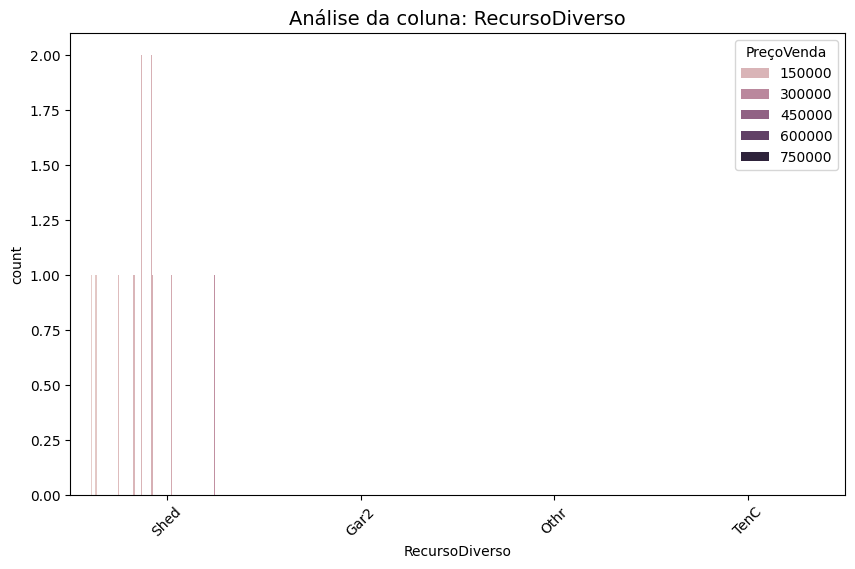

In [298]:
AnaliseColuna(bd , 'RecursoDiverso')

In [299]:
bd.RecursoDiverso.fillna("SemDiverso", inplace=True)

C:\Users\Vitor\AppData\Local\Temp\ipykernel_9720\1278601392.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bd.RecursoDiverso.fillna("SemDiverso", inplace=True)


In [300]:
df['RecursoDiverso'] = bd['RecursoDiverso']

Quantidade de valores únicos: 9

Quais são os valores únicos: ['WD' 'New' 'COD' 'ConLD' 'ConLI' 'CWD' 'ConLw' 'Con' 'Oth' nan]

Quantidade de valores nulos: 1

Quantidade por opção: 
TipoVenda
WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: count, dtype: int64


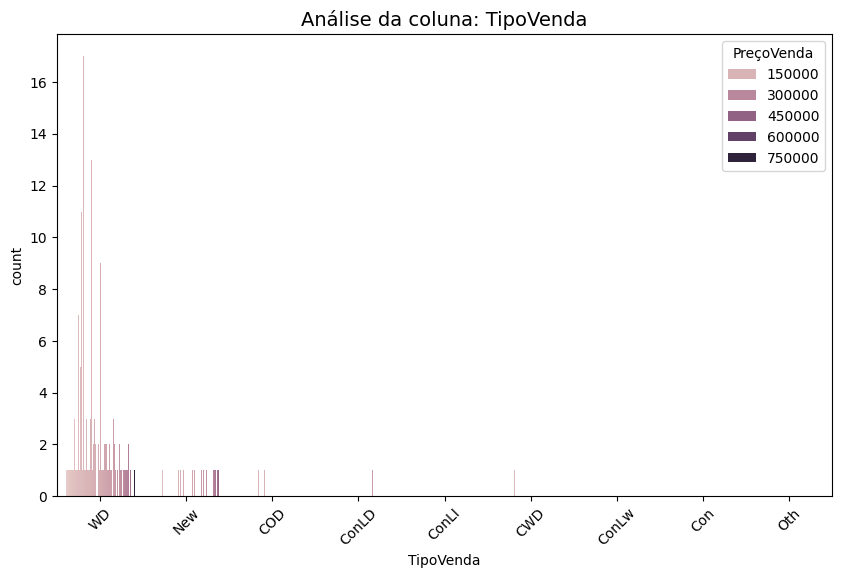

In [301]:
AnaliseColuna(bd , 'TipoVenda')

In [302]:
bd.loc[bd['TipoVenda'].isnull(), 'QualidadeGeral']  

2489    5
Name: QualidadeGeral, dtype: int64

In [303]:
bd.loc[bd['TipoVenda'].isnull()]  

Id  ClasseMS ZoneamentoMS  FrenteLote  AreaLote   Rua       Beco  \
2489  2490        20           RL        85.0     13770  Pave  SemAcesso   

     FormaLote ContornoTerreno Utilidades  ... AreaPiscina QualidadePiscina  \
2489       Reg             Lvl     AllPub  ...           0       SemPiscina   

         Cerca RecursoDiverso ValorDiverso MesVenda AnoVenda  TipoVenda  \
2489  SemCerca     SemDiverso            0       10     2007        NaN   

      CondiçãoVenda  PreçoVenda  
2489         Normal         NaN  

[1 rows x 81 columns]

In [304]:
bd.loc[bd['TipoVenda'].isnull(), 'Bairro']   

2489    Sawyer
Name: Bairro, dtype: object

In [305]:
bd.loc[bd['TipoVenda'].isnull(), 'CondiçãoVenda']

2489    Normal
Name: CondiçãoVenda, dtype: object

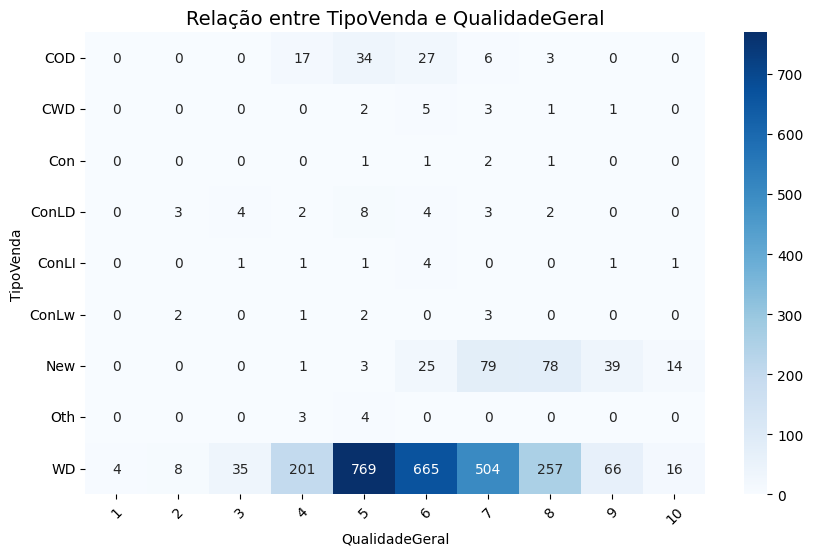

In [306]:
cross_tab = pd.crosstab(bd['TipoVenda'], bd['QualidadeGeral'])

plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d')

plt.title('Relação entre TipoVenda e QualidadeGeral', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

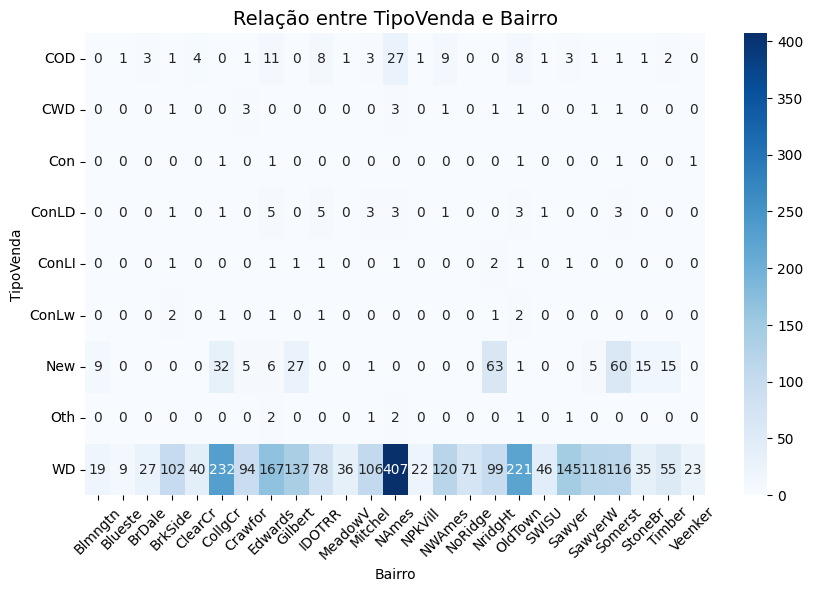

In [307]:
cross_tab = pd.crosstab(bd['TipoVenda'], bd['Bairro'])

plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d')

plt.title('Relação entre TipoVenda e Bairro', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

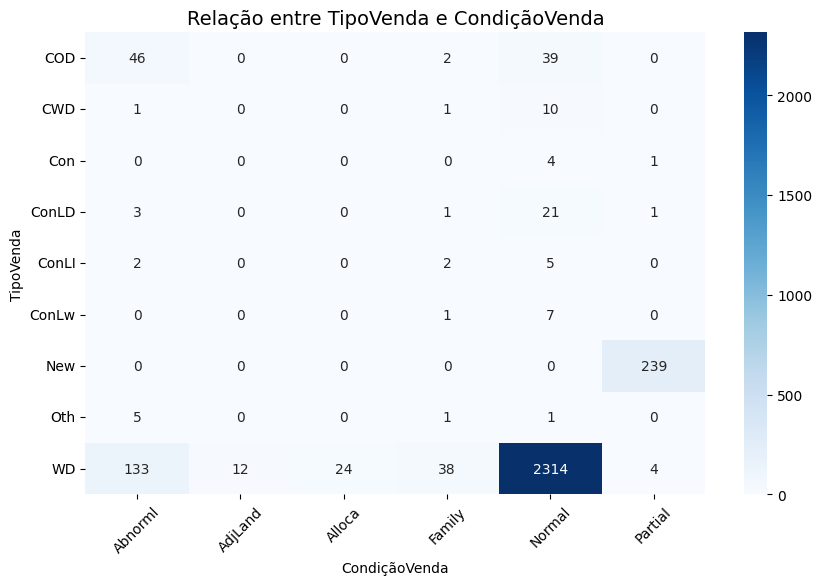

In [308]:
cross_tab = pd.crosstab(bd['TipoVenda'], bd['CondiçãoVenda'])

plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d')

plt.title('Relação entre TipoVenda e CondiçãoVenda', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [309]:
bd.TipoVenda.fillna("WD", inplace=True)

C:\Users\Vitor\AppData\Local\Temp\ipykernel_9720\3882241807.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bd.TipoVenda.fillna("WD", inplace=True)


In [310]:
bd.TipoVenda.isnull().sum()

0

In [311]:
df['TipoVenda'] = bd['TipoVenda']

In [312]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Id                            2919 non-null   int64  
 1   ClasseMS                      2919 non-null   int64  
 2   ZoneamentoMS                  2919 non-null   object 
 3   FrenteLote                    2919 non-null   float64
 4   AreaLote                      2919 non-null   int64  
 5   Rua                           2919 non-null   object 
 6   Beco                          2919 non-null   object 
 7   FormaLote                     2919 non-null   object 
 8   ContornoTerreno               2919 non-null   object 
 9   Utilidades                    2919 non-null   object 
 10  ConfigLote                    2919 non-null   object 
 11  InclinaçãoTerreno             2919 non-null   object 
 12  Bairro                        2919 non-null   object 
 13  Con

In [313]:
df = bd.drop('Id' , axis=1)

In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ClasseMS                      2919 non-null   int64  
 1   ZoneamentoMS                  2919 non-null   object 
 2   FrenteLote                    2919 non-null   float64
 3   AreaLote                      2919 non-null   int64  
 4   Rua                           2919 non-null   object 
 5   Beco                          2919 non-null   object 
 6   FormaLote                     2919 non-null   object 
 7   ContornoTerreno               2919 non-null   object 
 8   Utilidades                    2919 non-null   object 
 9   ConfigLote                    2919 non-null   object 
 10  InclinaçãoTerreno             2919 non-null   object 
 11  Bairro                        2919 non-null   object 
 12  Condição1                     2919 non-null   object 
 13  Con

In [324]:
from sklearn.preprocessing import LabelEncoder

def aplicarLblEncoder(df):
    codificador = LabelEncoder()
    
    for coluna in df.select_dtypes(include=['object']).columns:
        df[coluna] = df[coluna].astype(str)
        df[coluna] = codificador.fit_transform(df[coluna])
    
    return df


In [325]:
df = aplicarLblEncoder(df)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ClasseMS                      2919 non-null   int64  
 1   ZoneamentoMS                  2919 non-null   int32  
 2   FrenteLote                    2919 non-null   float64
 3   AreaLote                      2919 non-null   int64  
 4   Rua                           2919 non-null   int32  
 5   Beco                          2919 non-null   int32  
 6   FormaLote                     2919 non-null   int32  
 7   ContornoTerreno               2919 non-null   int32  
 8   Utilidades                    2919 non-null   int32  
 9   ConfigLote                    2919 non-null   int32  
 10  InclinaçãoTerreno             2919 non-null   int32  
 11  Bairro                        2919 non-null   int32  
 12  Condição1                     2919 non-null   int32  
 13  Con

In [326]:
Train = df[:bdIndex].copy()
Test = df[testeIndex:].copy()

In [327]:
X = Train.drop('PreçoVenda' ,axis=1)

In [328]:
y = Train['PreçoVenda'] 

In [329]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [330]:

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
def avaliar_modelos(modelos, X_train, X_test, y_train, y_test, cv_folds=5):
    resultados = {}
    for nome_modelo, modelo in modelos.items():
        modelo.fit(X_train, y_train)
        
        y_pred = modelo.predict(X_test)
        
        acuracia = accuracy_score(y_test, y_pred)
        
        acuracia_cv = np.mean(cross_val_score(modelo, X_train, y_train, cv=cv_folds, scoring='accuracy'))
        
        # Armazena os resultados
        resultados[nome_modelo] = {
            'Acurácia': acuracia,
            'Validação Cruzada (CV)': acuracia_cv
        }
        
        print(f"{nome_modelo}: Acurácia = {acuracia:.4f}, Validação Cruzada (CV) = {acuracia_cv:.4f}")
    return resultados

In [ ]:

modelos = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Linear SVC': LinearSVC(max_iter=10000)
}

resultados = avaliar_modelos(modelos, X_train, X_test, y_train, y_test)

C:\Users\Vitor\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Vitor\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Vitor\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or sc

Logistic Regression: Acurácia = 0.0103, Validação Cruzada (CV) = 0.0120


C:\Users\Vitor\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Random Forest: Acurácia = 0.0103, Validação Cruzada (CV) = 0.0205


C:\Users\Vitor\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Decision Tree: Acurácia = 0.0068, Validação Cruzada (CV) = 0.0069


C:\Users\Vitor\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Gradient Boosting: Acurácia = 0.0000, Validação Cruzada (CV) = 0.0086


C:\Users\Vitor\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
